In [ ]:
# !pip install datapungibea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import os

import datapungibea as dpb
key = '1FD5DC35-4854-4CE8-8D43-B36065C37041'
data = dpb.data(key) 
data

In [79]:
# data.Regional()

In [80]:
# # Collect county level variables
# for_county_index = data.Regional(GeoFips = "COUNTY",
#               LineCode = "1",
#               TableName = "CAGDP9", 
#               Year = "2020")
# for_county_index

In [81]:
# counties = for_county_index["GeoFips"]
# counties

In [82]:
# for_GDP_components = data.Regional(GeoFips = "01001",
#               LineCode = "ALL",
#               TableName = "CAGDP9", 
#               Year = "2010")
# for_GDP_components

In [83]:
# GDP_components = for_GDP_components[["Code", "Description"]]
# GDP_components

In [84]:
# import time
# import random

# for row in GDP_components.iterrows():
#     full_code, description = row[1]
#     table_name, code = full_code.split("-")
   
#     try:
#         GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
#               LineCode = code,
#               TableName = table_name, 
#               Year = "ALL")
#         print(full_code +": " + description + " downloaded")
#     except:
#         print(full_code +": Error downloading " + description)
#     time.sleep(10)

In [85]:
# import os
# GDP_data_dct = {}
# folder1 = "Data"
# folder2 = "CountyGDP"
# try:
#     os.mkdir(folder1)
#     os.mkdir(folder1 + "/" + folder2)
# except:
#     try: 
#         os.mkdir(folder1 + "/" + folder2)
#     except:
#         pass
# # for key, val in GDP_data_dct.items():
# #     val.to_csv(folder1 + "/" + folder2 + "/" + key.replace("/","") + ".csv")

# for row in GDP_components.iterrows():
#     full_code, description = row
#     description = description[1]
#     # somehow, space added in very last character of description
#     GDP_data_dct[description] = pd.read_csv("Data/CountyGDP/" + description[:-1].replace("/","") + ".csv")
# GDP_data_dct
# # GDP_components

In [86]:
#import data and convert datatype to int64
data = pd.read_csv('AbiData.csv')
# data.astype('int64')
# data = data.apply(pd.to_numeric, errors='coerce')
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column].str.replace(',', ''), errors='coerce').astype('Int64')
        


In [87]:
#set index as GeoFips and TimePeriod
data = data.set_index(["GeoFips", "TimePeriod"])

In [88]:
#let dataframe be equal to data imported
full_df = data

In [89]:
full_df.columns

Index(['Accommodation and food services',
       'Administrative and support and waste management and remediation services',
       'Agriculture, forestry, fishing and hunting', 'All industry total',
       'Arts, entertainment, and recreation',
       'Arts, entertainment, recreation, accommodation, and food services',
       'Construction', 'Durable goods manufacturing',
       'Educational services, health care, and social assistance',
       'Educational services', 'Finance and insurance',
       'Finance, insurance, real estate, rental, and leasing',
       'Government and government enterprises',
       'Health care and social assistance', 'Information',
       'Management of companies and enterprises',
       'Manufacturing and information', 'Manufacturing',
       'Mining, quarrying, and oil and gas extraction',
       'Natural resources and mining', 'Nondurable goods manufacturing',
       'Other services (except government and government enterprises)',
       'Private goods-p

In [90]:
#convert dataframe to float64
full_df = full_df.astype('float64')

In [91]:
# data = pd.read_csv('AbiData.csv')
# full_df = pd.DataFrame({key[:-1]: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in data.items()})
# for key, val in full_df.items():
#     try:
#         full_df[key] = val.str.replace(
#             ",","").replace("(NA)",np.NaN).replace("(D)", np.NaN).astype(float)
#     except:
#         continue
            
# full_df

In [92]:
#get working directory
os.getcwd()

# for a,b,c in os.walk("."):
#     print(a,b,c)

'/Users/abiodun.idowu/Library/CloudStorage/OneDrive-NorthDakotaUniversitySystem/Desktop/PhD/BEA project/notebook_to_start'

In [93]:
# full_df = pd.DataFrame({key[:-1]: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
# for key, val in full_df.items():
#     try:
#         full_df[key] = val.str.replace(
#             ",","").replace("(NA)",np.NaN).replace("(D)", np.NaN).astype(float)
#     except:
#         continue
            
# full_df

In [94]:
full_df["All industry total"]

GeoFips  TimePeriod
1001     2001           949800.0
         2002           984039.0
         2003          1008032.0
         2004          1170278.0
         2005          1195319.0
                         ...    
56045    2016           305446.0
         2017           300909.0
         2018           315332.0
         2019           322576.0
         2020           312665.0
Name: All industry total, Length: 62360, dtype: float64

In [95]:
# full_df[["Private industries ", "Utilities "]]
list (full_df.keys())

['Accommodation and food services',
 'Administrative and support and waste management and remediation services',
 'Agriculture, forestry, fishing and hunting',
 'All industry total',
 'Arts, entertainment, and recreation',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Construction',
 'Durable goods manufacturing',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Finance and insurance',
 'Finance, insurance, real estate, rental, and leasing',
 'Government and government enterprises',
 'Health care and social assistance',
 'Information',
 'Management of companies and enterprises',
 'Manufacturing and information',
 'Manufacturing',
 'Mining, quarrying, and oil and gas extraction',
 'Natural resources and mining',
 'Nondurable goods manufacturing',
 'Other services (except government and government enterprises)',
 'Private goods-producing industries 2',
 'Private industries',
 'Private services-providing industries 3',
 'Pro

In [96]:
inputs = ['All industry total',"Utilities", "Mining, quarrying, and oil and gas extraction", 'Agriculture, forestry, fishing and hunting']
for key in inputs:
    full_df[key + " 3YMA"] = full_df.reset_index().set_index(["TimePeriod"], drop = False).groupby("GeoFips")[key].rolling(3).mean().shift()
log_df = np.log(full_df)#.groupby("GeoFips").diff()
for key in inputs:
    log_df[key + " Volatility"] = (log_df[key].sub(log_df[key + " 3YMA"])).pow(2).pow(.5)
# for key in inputs:

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


- GDP 
-- layer1

In [97]:
import json

In [98]:
toc = """All industry total
1 Private industries
1.1 Agriculture, forestry, fishing and hunting
1.2 Mining, quarrying, and oil and gas extraction
1.3 Utilities
1.4 Construction
1.5 Manufacturing
1.5.1 Durable goods manufacturing
1.5.2 Nondurable goods manufacturing
1.6 Wholesale trade
1.7 Retail trade
1.8 Transportation and warehousing
1.9 Information
1.10 Finance, insurance, real estate, rental, and leasing
1.11 Finance and insurance
1.12 Real estate and rental and leasing
1.13 Professional and business services
1.14 Professional, scientific, and technical services
1.15 Management of companies and enterprises
1.16 Administrative and support and waste management and remediation services
1.17 Educational services, health care, and social assistance
1.18 Educational services
1.19 Health care and social assistance
1.20 Arts, entertainment, recreation, accommodation, and food services
1.21 Arts, entertainment, and recreation
1.22 Accommodation and food services
1.23 Other services (except government and government enterprises)
1.24 Government and government enterprises
1.25 Natural resources and mining
1.26 Trade
1.27 Transportation and utilities
1.28 Manufacturing and information
1.29 Private goods-producing industries 2/
1.30 Private services-providing industries 3/
2 """

myfile = 'GDP'

data = {myfile:{}}
for line in toc.splitlines():
    levels, title = line.split(' ', maxsplit=1)
    levels = levels.rstrip('.').split('.')
    if len(levels) == 1:
        heading = title
        data[myfile][heading] = {}
    elif len(levels) == 2:
        sub_heading = title
        data[myfile][heading][sub_heading] = []
#     if len(levels) == 3:
#         data[myfile][heading][sub_heading].append(title)

print(json.dumps(data, indent=4))

{
    "GDP": {
        "industry total": {},
        "Private industries": {
            "Agriculture, forestry, fishing and hunting": [],
            "Mining, quarrying, and oil and gas extraction": [],
            "Utilities": [],
            "Construction": [],
            "Manufacturing": [],
            "Wholesale trade": [],
            "Retail trade": [],
            "Transportation and warehousing": [],
            "Information": [],
            "Finance, insurance, real estate, rental, and leasing": [],
            "Finance and insurance": [],
            "Real estate and rental and leasing": [],
            "Professional and business services": [],
            "Professional, scientific, and technical services": [],
            "Management of companies and enterprises": [],
            "Administrative and support and waste management and remediation services": [],
            "Educational services, health care, and social assistance": [],
            "Educational services": []

In [99]:
dct = data["GDP"]
layer1 = list(dct.keys())
layer1.pop()
layer2 = []
for key in layer1:
    layer2 = layer2 + list(dct[key].keys())
layers = {0:layer1,
         1:layer2}
layers

{0: ['industry total', 'Private industries'],
 1: ['Agriculture, forestry, fishing and hunting',
  'Mining, quarrying, and oil and gas extraction',
  'Utilities',
  'Construction',
  'Manufacturing',
  'Wholesale trade',
  'Retail trade',
  'Transportation and warehousing',
  'Information',
  'Finance, insurance, real estate, rental, and leasing',
  'Finance and insurance',
  'Real estate and rental and leasing',
  'Professional and business services',
  'Professional, scientific, and technical services',
  'Management of companies and enterprises',
  'Administrative and support and waste management and remediation services',
  'Educational services, health care, and social assistance',
  'Educational services',
  'Health care and social assistance',
  'Arts, entertainment, recreation, accommodation, and food services',
  'Arts, entertainment, and recreation',
  'Accommodation and food services',
  'Other services (except government and government enterprises)',
  'Government and gover

In [100]:
layer2

['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transpor

In [101]:
# keys = ['Agriculture, forestry, fishing and hunting',
#  'Mining, quarrying, and oil and gas extraction',
#  'Utilities',
#  'Construction',
#  'Manufacturing',
#  'Wholesale trade',
#  'Retail trade',
#  'Transportation and warehousing',
#  'Information',
#  'Finance, insurance, real estate, rental, and leasing',
#  'Finance and insurance',
#  'Professional and business services',
#  'Educational services, health care, and social assistance',
#  'Arts, entertainment, recreation, accommodation, and food services',
#  'Other services (except government and government enterprises)',
#  'Government and government enterprises']

In [102]:
# data2 = log_df[layer2].groupby("GeoFips").diff()
# # list(log_df.keys())

In [103]:
# data2

# list(data2)
# log_df
full_df

Accommodation and food services  \
GeoFips TimePeriod                                    
1001    2001                                46510.0   
        2002                                45576.0   
        2003                                48870.0   
        2004                                49738.0   
        2005                                46414.0   
...                                             ...   
56045   2016                                 3499.0   
        2017                                    NaN   
        2018                                    NaN   
        2019                                    NaN   
        2020                                    NaN   

                    Administrative and support and waste management and remediation services  \
GeoFips TimePeriod                                                                             
1001    2001                                                      NaN                          
        2002                                                      NaN                          
        2003                                                      NaN                          
        2004                                                      NaN                          
        2005                                                      NaN                          
...                                                               ...                          
56045   2016                                                    655.0                          
        2017                                                      NaN                          
        2018                                                      NaN                          
        2019                                                    756.0                          
        2020                                                    908.0                          

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                           22455.0   
        2002                                           18063.0   
        2003                                           39941.0   
        2004                                           49903.0   
        2005                                           59099.0   
...                                                        ...   
56045   2016                                           13871.0   
        2017                                           19901.0   
        2018                                           23787.0   
        2019                                           14194.0   
        2020                                            8653.0   

                    All industry total  Arts, entertainment, and recreation  \
GeoFips TimePeriod                                                            
1001    2001                  949800.0                               2150.0   
        2002                  984039.0                               1935.0   
        2003                 1008032.0                               1846.0   
        2004                 1170278.0                               1897.0   
        2005                 1195319.0                               2277.0   
...                                ...                                  ...   
56045   2016                  305446.0                                351.0   
        2017                  300909.0                                  NaN   
        2018                  315332.0                                  NaN   
        2019                  322576.0                                  NaN   
        2020                  312665.0                                  NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                             

In [104]:
data_dct_ips = {}
data_dct_ips['Log_Data'] = np.log(full_df)
data_dct_ips['Diff1'] = data_dct_ips['Log_Data'].groupby('GeoFips').diff()
data_dct_ips

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


{'Log_Data':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                              10.747423   
         2002                              10.727137   
         2003                              10.796919   
         2004                              10.814525   
         2005                              10.745356   
 ...                                             ...   
 56045   2016                               8.160232   
         2017                                    NaN   
         2018                                    NaN   
         2019                                    NaN   
         2020                                    NaN   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                   

In [105]:
data_dct = {}
data_dct["Log Data"] = np.log(full_df).replace([np.inf, -np.inf], np.nan)
data_dct["Diff"] = data_dct["Log Data"].groupby("GeoFips").diff()#.dropna()
data_dct["2Diff"] = data_dct["Diff"].groupby("GeoFips").diff()
data_dct

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


{'Log Data':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                              10.747423   
         2002                              10.727137   
         2003                              10.796919   
         2004                              10.814525   
         2005                              10.745356   
 ...                                             ...   
 56045   2016                               8.160232   
         2017                                    NaN   
         2018                                    NaN   
         2019                                    NaN   
         2020                                    NaN   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                   

write if the variables are sub-components

In [106]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total"]
ips_df = data_dct["Diff"][ips_keys]
ips_df = ips_df[ips_df.index.get_level_values("TimePeriod")>2001]
ips_df = ips_df.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()
ips_df


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/1118412389.py:16: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ips_df = ips_df.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()


Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                         -0.217648   
        2003                                          0.793538   
        2004                                          0.222678   
        2005                                          0.169133   
        2006                                          0.176881   
...                                                        ...   
56041   2016                                          0.016426   
        2017                                         -0.156890   
        2018                                          0.231567   
        2019                                          0.839924   
        2020                                          0.274166   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                            -0.419451   0.835570   
        2003                                             0.191126   0.068072   
        2004                                             0.470578   0.505041   
        2005                                             0.238805  -0.239593   
        2006                                             0.342614   0.436516   
...                                                           ...        ...   
56041   2016                                            -0.081156   0.211513   
        2017                                            -0.158175   0.004846   
        2018                                            -0.207405  -0.179435   
        2019                                            -0.452308   0.279935   
        2020                                            -0.747581  -0.020288   

                    All industry total  
GeoFips TimePeriod                      
1001    2002                  0.035414  
        2003                  0.024090  
        2004                  0.149241  
        2005                  0.021172  
        2006                  0.066174  
...                                ...  
56041   2016                 -0.006544  
        2017                 -0.023853  
        2018                 -0.037587  
        2019                 -0.024081  
        2020                 -0.108416  

[11343 rows x 4 columns]

In [107]:

# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin():])
# reset_index(ips_df2)
# ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])
# reset_index(ips_df2)
# for i in range(3):
#     ips_df2 = ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
#     reset_index(ips_df2)
# # .values.argmin()


In [108]:
# ips_df.iloc[
# data.iloc[:data.A.isnull().values.argmax()]
# ips_df2 = ips_df.groupby("GeoFips").apply(lambda x: x.iloc[x.isnull().values.argmin()+1:])
# ips_df2.groupby("GeoFips").apply(lambda x: x.iloc[:x.isnull().values.argmax()])

In [109]:
from statsmodels.tsa.stattools import adfuller

def adfuller_table(df):
    df_results = {}
    for key, vector in df.items():
        dftest = adfuller(vector, maxlag = 4, regression = 'c')
        df_results[key] = pd.Series(dftest[0:4], index = ['t-stat', 'p-value', 
                                                         '#Lags Used', 'Number of Observations Used'])
    return pd.DataFrame(df_results).round(2)

In [110]:
# adfuller_table(data_dct['Diff'])

In [111]:
import statistics
import math
data = data_dct_ips['Diff1'].replace([np.inf, -np.inf]).fillna(0)
data
data_ips = {}
# data_ips = data.reset_index()
data_ips['Diff']= data
data_ips

{'Diff':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                               0.000000   
         2002                              -0.020286   
         2003                               0.069782   
         2004                               0.017606   
         2005                              -0.069168   
 ...                                             ...   
 56045   2016                               0.000000   
         2017                               0.000000   
         2018                               0.000000   
         2019                               0.000000   
         2020                               0.000000   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                 0.0000

In [112]:

# data_ips_var = ['GeoFips', 'TimePeriod', 'All industry total']
# data_ips_t = data_ips[data_ips_var]
# data_ips_t
# data_ips_t['All industry total'].replace(to_replace = 0, value = 1, inplace=True)

In [113]:
# data_test = pd.read_csv('ips.csv')
# data_test

# IPS Test

In [114]:
def ips_test(data, Firm, Time):
    df = data.set_index([Firm, Time])
    df2 = data.set_index([Time, Firm])
    firms = list(data[Firm].unique())
    times = list(data[Time].unique())
    data = data.set_index(Firm)
    N = len(firms)
    dict_temp = {}

    for firm in firms:
        lag_val = []
        val_diff = []
        lag_val_diff = []
        for i in data[Time].loc[firm]:
            cur_val = i
            if lag_val == []:
                pass
            else:
                val_diff = cur_val - lag_val
            if lag_val_diff == []:
                pass
            else:
                if val_diff != lag_val_diff:
                    raise ValueError("The data does not have constant time variation")
            lag_val = i
            lag_val_diff = val_diff

        for key in df:
            total_temp_stat = 0
            for firm in firms:
                temp_df = data[[key]].loc[firm]
                temp_stat = adfuller(temp_df, maxlag = 0, regression = 'ct')[0]
                total_temp_stat += temp_stat
                t_bar = (1/N)*total_temp_stat
                dict_temp[key] = t_bar

    df_temp = pd.DataFrame([dict_temp]).T
    df_temp.columns = ['Test Stat']
    return df_temp

Download interest rate data (divisia), and average it annually

In [115]:
divisia = pd.read_excel("https://centerforfinancialstability.org/amfm/Divisia.xlsx", 
                        sheet_name = "Broad", header  =1, index_col = "Date")

index = divisia.index
keys = divisia.keys()
divisia = divisia.resample("A").mean().rename(columns={keys[0]: "M4",
                                                       keys[2]:"M4 Interest Rate"})
year_lst = [i for i in range(1966, 2024)]
divisia = divisia[["M4", "M4 Interest Rate"]].reset_index()
divisia["TimePeriod"] = year_lst
divisia = divisia.set_index("TimePeriod").drop(columns = "Date")
divisia.head()

M4  M4 Interest Rate
TimePeriod                              
1966        103.843982          0.033092
1967        111.124365          0.036325
1968        116.666830          0.042463
1969        119.171882          0.042730
1970        130.436104          0.034850

##### Import inflation rates

In [116]:
cpi = pd.read_csv('Annual_CPI_urban.csv')

In [117]:
cpi['DATE'] = pd.to_datetime(cpi['DATE'])

In [118]:
cpi['TimePeriod'] = cpi['DATE'].dt.year

In [119]:
cpi.drop('DATE', axis=1, inplace=True)

In [120]:
cpi['CPIAUCSL_PCA']=pd.to_numeric(cpi['CPIAUCSL_PCA'], errors='coerce')

In [121]:
cpi['inflation'] = cpi['CPIAUCSL_PCA'].pct_change()

In [129]:
cpi = cpi.set_index('TimePeriod')

In [130]:
divisia1 = divisia.copy()
divisia1 = divisia1.join(cpi).reset_index()
divisia1 = divisia1.set_index(['TimePeriod'])
divisia1 = divisia1.sort_index()
divisia1

M4  M4 Interest Rate  CPIAUCSL_PCA  inflation
TimePeriod                                                        
1966         103.843982          0.033092           NaN        NaN
1967         111.124365          0.036325           NaN        NaN
1968         116.666830          0.042463           NaN        NaN
1969         119.171882          0.042730           NaN        NaN
1970         130.436104          0.034850           NaN        NaN
1971         144.401865          0.034712           NaN        NaN
1972         157.321435          0.050436           NaN        NaN
1973         166.896644          0.058927           NaN        NaN
1974         180.343641          0.045520           NaN        NaN
1975         198.899670          0.040336           NaN        NaN
1976         218.014139          0.042364           NaN        NaN
1977         234.421851          0.056209           NaN        NaN
1978         241.976193          0.075615           NaN        NaN
1979         247.104106          0.088508           NaN        NaN
1980         254.363897          0.112961           NaN        NaN
1981         267.941105          0.094079           NaN        NaN
1982         284.056268          0.074364           NaN        NaN
1983         300.143561          0.084334           NaN        NaN
1984         322.572117          0.067561           NaN        NaN
1985         353.593878          0.055376           NaN        NaN
1986         379.764735          0.054402           NaN        NaN
1987         397.353439          0.060903           NaN        NaN
1988         408.118752          0.071729           NaN        NaN
1989         426.896015          0.065818           NaN        NaN
1990         445.575551          0.049653           NaN        NaN
1991         468.277307          0.030239           NaN        NaN
1992         487.281823          0.024376           NaN        NaN
1993         503.616563          0.030563           NaN        NaN
1994         516.264776          0.040663           NaN        NaN
1995         544.844618          0.037547           NaN        NaN
1996         578.667036          0.038991           NaN        NaN
1997         624.629859          0.038022           NaN        NaN
1998         675.042845          0.035890           NaN        NaN
1999         716.138833          0.044508           NaN        NaN
2000         777.366744          0.027522           NaN        NaN
2001         842.493362          0.012311       2.81663        NaN
2002         890.722833          0.007415       1.59567  -0.433483
2003         935.225534          0.008946       2.29800   0.440147
2004         987.417840          0.020890       2.66757   0.160822
2005        1044.582478          0.032386       3.36583   0.261759
2006        1113.070987          0.033668       3.22209  -0.042706
2007        1203.409143          0.016335       2.87055  -0.109103
2008        1226.658697          0.003480       3.81495   0.328996
2009        1169.400546          0.001692      -0.32036  -1.083975
2010        1185.574288          0.001039       1.63657  -6.108534
2011        1223.671712          0.000960       3.13965   0.918433
2012        1274.150327          0.000731       2.07319  -0.339675
2013        1299.979150          0.000634       1.46597  -0.292892
2014        1342.896960          0.000651       1.61546   0.101973
2015        1409.131496          0.001404       0.12114  -0.925012
2016        1471.632770          0.003105       1.26736   9.461945
2017        1536.432392          0.006836       2.13144   0.681795
2018        1619.603635          0.008433       2.43900   0.144297
2019        1994.830977          0.002033       1.81326  -0.256556
2020        2199.607306          0.000516       1.24919  -0.311081
2021        2248.989576          0.007056       4.68219   2.748181
2022        2210.004279          0.022147       7.99169   0.706827
2023        2225.059999          0.025044       4.12827  -0.483430

In [131]:
divisia1.columns

Index(['M4', 'M4 Interest Rate', 'CPIAUCSL_PCA', 'inflation'], dtype='object')

In [132]:
divisia['RM4Interest Rate'] = divisia1['M4 Interest Rate']-divisia1['inflation']

In [133]:
# data["Level"]["$r_{M4}$"] = divisia["M4 Interest Rate"]

Add/join the interest rates to the original dataframe

In [134]:
data_df = full_df.copy().reset_index().set_index("TimePeriod")
data_df = data_df.join(divisia).reset_index()     
data_df = data_df.set_index(["GeoFips", "TimePeriod"])    
data_df = data_df.sort_index()
data_df 

Accommodation and food services  \
GeoFips TimePeriod                                    
1001    2001                                46510.0   
        2002                                45576.0   
        2003                                48870.0   
        2004                                49738.0   
        2005                                46414.0   
...                                             ...   
56045   2016                                 3499.0   
        2017                                    NaN   
        2018                                    NaN   
        2019                                    NaN   
        2020                                    NaN   

                    Administrative and support and waste management and remediation services  \
GeoFips TimePeriod                                                                             
1001    2001                                                      NaN                          
        2002                                                      NaN                          
        2003                                                      NaN                          
        2004                                                      NaN                          
        2005                                                      NaN                          
...                                                               ...                          
56045   2016                                                    655.0                          
        2017                                                      NaN                          
        2018                                                      NaN                          
        2019                                                    756.0                          
        2020                                                    908.0                          

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                           22455.0   
        2002                                           18063.0   
        2003                                           39941.0   
        2004                                           49903.0   
        2005                                           59099.0   
...                                                        ...   
56045   2016                                           13871.0   
        2017                                           19901.0   
        2018                                           23787.0   
        2019                                           14194.0   
        2020                                            8653.0   

                    All industry total  Arts, entertainment, and recreation  \
GeoFips TimePeriod                                                            
1001    2001                  949800.0                               2150.0   
        2002                  984039.0                               1935.0   
        2003                 1008032.0                               1846.0   
        2004                 1170278.0                               1897.0   
        2005                 1195319.0                               2277.0   
...                                ...                                  ...   
56045   2016                  305446.0                                351.0   
        2017                  300909.0                                  NaN   
        2018                  315332.0                                  NaN   
        2019                  322576.0                                  NaN   
        2020                  312665.0                                  NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                             

In [ ]:
data_df = data_df.reset_index()

In [135]:
data_df.to_csv('full_df_with_m4.csv', index=False)

In [136]:
all_data = full_df.copy()

In [137]:
all_data

Accommodation and food services  \
GeoFips TimePeriod                                    
1001    2001                                46510.0   
        2002                                45576.0   
        2003                                48870.0   
        2004                                49738.0   
        2005                                46414.0   
...                                             ...   
56045   2016                                 3499.0   
        2017                                    NaN   
        2018                                    NaN   
        2019                                    NaN   
        2020                                    NaN   

                    Administrative and support and waste management and remediation services  \
GeoFips TimePeriod                                                                             
1001    2001                                                      NaN                          
        2002                                                      NaN                          
        2003                                                      NaN                          
        2004                                                      NaN                          
        2005                                                      NaN                          
...                                                               ...                          
56045   2016                                                    655.0                          
        2017                                                      NaN                          
        2018                                                      NaN                          
        2019                                                    756.0                          
        2020                                                    908.0                          

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                           22455.0   
        2002                                           18063.0   
        2003                                           39941.0   
        2004                                           49903.0   
        2005                                           59099.0   
...                                                        ...   
56045   2016                                           13871.0   
        2017                                           19901.0   
        2018                                           23787.0   
        2019                                           14194.0   
        2020                                            8653.0   

                    All industry total  Arts, entertainment, and recreation  \
GeoFips TimePeriod                                                            
1001    2001                  949800.0                               2150.0   
        2002                  984039.0                               1935.0   
        2003                 1008032.0                               1846.0   
        2004                 1170278.0                               1897.0   
        2005                 1195319.0                               2277.0   
...                                ...                                  ...   
56045   2016                  305446.0                                351.0   
        2017                  300909.0                                  NaN   
        2018                  315332.0                                  NaN   
        2019                  322576.0                                  NaN   
        2020                  312665.0                                  NaN   

                    Arts, entertainment, recreation, accommodation, and food services  \
GeoFips TimePeriod                                                             

In [138]:
all_data=all_data.reset_index()

In [139]:
cpi.columns

Index(['CPIAUCSL_PCA', 'inflation'], dtype='object')

In [142]:
cpi = cpi.reset_index()

In [143]:
# Iterate over unique combinations of county and year
for index, row in all_data.iterrows():
    county = row['GeoFips']
    year = row['TimePeriod']
    
    # Check if the CPI dataframe is not empty and contains the year
    if not cpi.empty and year in cpi['TimePeriod'].values:
        cpi_value = cpi[cpi['TimePeriod'] == year]['CPIAUCSL_PCA'].values[0]
        
        # Convert the CPI value to a numeric type
        cpi_value = pd.to_numeric(cpi_value, errors='coerce')
        
        # Divide all variables by the CPI value
        for col in all_data.columns[2:]:  # Assuming columns from 'var1' onwards contain the variables
            all_data.loc[index, col] /= cpi_value
    else:
        # Handle the case where the CPI data is missing or the year is not found
        print(f"CPI data not available for year {year}. Skipping division for index {index}.")


In [144]:
all_data.to_csv('deflated_gdp_full_df.csv', index=True) #real gdp

In [146]:
cpi = cpi.set_index('TimePeriod')

In [147]:
all_data = all_data.copy().reset_index().set_index("TimePeriod")
all_data = all_data.join(divisia).reset_index()     
all_data = all_data.set_index(["GeoFips", "TimePeriod"])    
all_data = all_data.sort_index()
all_data 

index  Accommodation and food services  \
GeoFips TimePeriod                                           
1001    2001            0                     16512.640993   
        2002            1                     28562.296715   
        2003            2                     21266.318538   
        2004            3                     18645.433859   
        2005            4                     13789.763595   
...                   ...                              ...   
56045   2016        62355                      2760.857215   
        2017        62356                              NaN   
        2018        62357                              NaN   
        2019        62358                              NaN   
        2020        62359                              NaN   

                    Administrative and support and waste management and remediation services  \
GeoFips TimePeriod                                                                             
1001    2001                                                      NaN                          
        2002                                                      NaN                          
        2003                                                      NaN                          
        2004                                                      NaN                          
        2005                                                      NaN                          
...                                                               ...                          
56045   2016                                               516.822371                          
        2017                                                      NaN                          
        2018                                                      NaN                          
        2019                                               416.928626                          
        2020                                               726.871012                          

                    Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2001                                       7972.293130   
        2002                                      11320.009776   
        2003                                      17380.765883   
        2004                                      18707.287906   
        2005                                      17558.521969   
...                                                        ...   
56045   2016                                      10944.798637   
        2017                                       9336.880231   
        2018                                       9752.767528   
        2019                                       7827.890098   
        2020                                       6926.888624   

                    All industry total  Arts, entertainment, and recreation  \
GeoFips TimePeriod                                                            
1001    2001             337211.490327                           763.323546   
        2002             616693.301246                          1212.656752   
        2003             438656.222802                           803.307224   
        2004             438705.638465                           711.134103   
        2005             355133.503475                           676.504755   
...                                ...                                  ...   
56045   2016             241009.657871                           276.953667   
        2017             141176.387794                                  NaN   
        2018             129287.412874                                  NaN   
        2019             177898.370890                                  NaN   
        2020             250294.190636                                  NaN   

                    Arts, entertainment, recreation, accommodation, and food 

In [106]:
all_data.to_csv('deflated_gdp_with_m4.csv', index=True) # real gdp

In [113]:
# all_data.iloc[8]

Convert variables to rates and differenced data

In [40]:
data_dct1 = {}
data_dct1["Log Data"] = np.log(data_df).replace([np.inf, -np.inf], np.nan)
data_dct1["Diff"] = data_dct1["Log Data"].groupby("GeoFips").diff()#.dropna()
#data_dct1["2Diff"] = data_dct1["Diff"].groupby("GeoFips").diff()
data_dct1

{'Log Data':                     Accommodation and food services  \
 GeoFips TimePeriod                                    
 1001    2001                              10.747423   
         2002                              10.727137   
         2003                              10.796919   
         2004                              10.814525   
         2005                              10.745356   
 ...                                             ...   
 56045   2016                               8.160232   
         2017                                    NaN   
         2018                                    NaN   
         2019                                    NaN   
         2020                                    NaN   
 
                     Administrative and support and waste management and remediation services  \
 GeoFips TimePeriod                                                                             
 1001    2001                                                   

Remove years with nan

In [41]:
# remove duplicate first index column
def reset_index(df):
    name1,name2 = list(df.index.names)[1:]
    ix1, ix2 =df.index.get_level_values(1), df.index.get_level_values(2) 
    df[name1] = ix1
    df[name2] = ix2
    df.reset_index(drop=True, inplace = True)
    df.set_index(["GeoFips", "TimePeriod"], inplace = True)
    
ips_keys = ['Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 "All industry total",
           "M4",
           "M4 Interest Rate"]
ips_df1 = data_dct1["Log Data"][ips_keys]
ips_df1 = ips_df1[ips_df1.index.get_level_values("TimePeriod")>2001]
ips_df1 = ips_df1.groupby("GeoFips").apply(lambda x: x.dropna(axis = 1)).dropna()

ips_df1["M4 Interest Rate"] = data_df["M4 Interest Rate"]
ips_df1

Agriculture, forestry, fishing and hunting  \
GeoFips TimePeriod                                               
1001    2002                                          9.801621   
        2003                                         10.595159   
        2004                                         10.817836   
        2005                                         10.986969   
        2006                                         11.163850   
...                                                        ...   
56041   2016                                          9.037058   
        2017                                          8.880168   
        2018                                          9.111735   
        2019                                          9.951658   
        2020                                         10.225825   

                    Mining, quarrying, and oil and gas extraction  Utilities  \
GeoFips TimePeriod                                                             
1001    2002                                             8.023880  10.884067   
        2003                                             8.215006  10.952139   
        2004                                             8.685585  11.457180   
        2005                                             8.924390  11.217587   
        2006                                             9.267004  11.654104   
...                                                           ...        ...   
56041   2016                                            12.194111   9.942372   
        2017                                            12.035937   9.947217   
        2018                                            11.828532   9.767782   
        2019                                            11.376223  10.047718   
        2020                                            10.628642  10.027429   

                    All industry total        M4  M4 Interest Rate  
GeoFips TimePeriod                                                  
1001    2002                 13.799421  6.792149          0.007415  
        2003                 13.823510  6.840900          0.008946  
        2004                 13.972752  6.895188          0.020889  
        2005                 13.993924  6.951429          0.032386  
        2006                 14.060098  7.014952          0.033669  
...                                ...       ...               ...  
56041   2016                 13.774393  7.294424          0.003105  
        2017                 13.750540  7.337519          0.006836  
        2018                 13.712953  7.390238          0.008433  
        2019                 13.688872  7.598495          0.002033  
        2020                 13.580456  7.696257          0.000516  

[11913 rows x 6 columns]

In [42]:
# years = ips_df.groupby("TimePeriod").mean().index
# entities = ips_df.groupby("GeoFips").mean().index
# years, entities

enter data that is the same for *every* year entry

using year as example for data entry here

In [43]:
# df = ips_df.copy()
# df["New"] = np.nan
# for year in years:
#     df["New"][df.index.get_level_values("TimePeriod") == year] = year
# df

In [44]:
ips_dct = {"Log":ips_df}
ips_dct["Rates"] = ips_dct["Log"].groupby("GeoFips").diff()
ips_dct["Diff"] = ips_dct["Rates"].groupby("GeoFips").diff()

Run the IPS test

In [45]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


Log     Rates      Diff
Agriculture, forestry, fishing and hunting    -5.414102 -6.708298 -7.180468
Mining, quarrying, and oil and gas extraction -4.065713 -5.900292 -6.764893
Utilities                                     -4.718953 -6.403677 -7.053029
All industry total                            -3.889409 -5.733595 -6.582149

In [46]:
ips_dct2 = {"Log":ips_df1}
ips_dct2["Rates"] = ips_dct2["Log"].groupby("GeoFips").diff()
ips_dct2["Diff"] = ips_dct2["Rates"].groupby("GeoFips").diff()

In [47]:
# import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in ips_dct2.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


Log     Rates      Diff
Agriculture, forestry, fishing and hunting    -2.715746 -5.253833 -6.518411
Mining, quarrying, and oil and gas extraction -1.759423 -3.903908 -5.763552
Utilities                                     -1.409258 -4.560160 -6.163084
All industry total                            -1.825759 -3.837968 -5.645070
M4                                             1.488738 -2.441973 -4.984469
M4 Interest Rate                              -2.680590 -4.714054 -4.381545

C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set

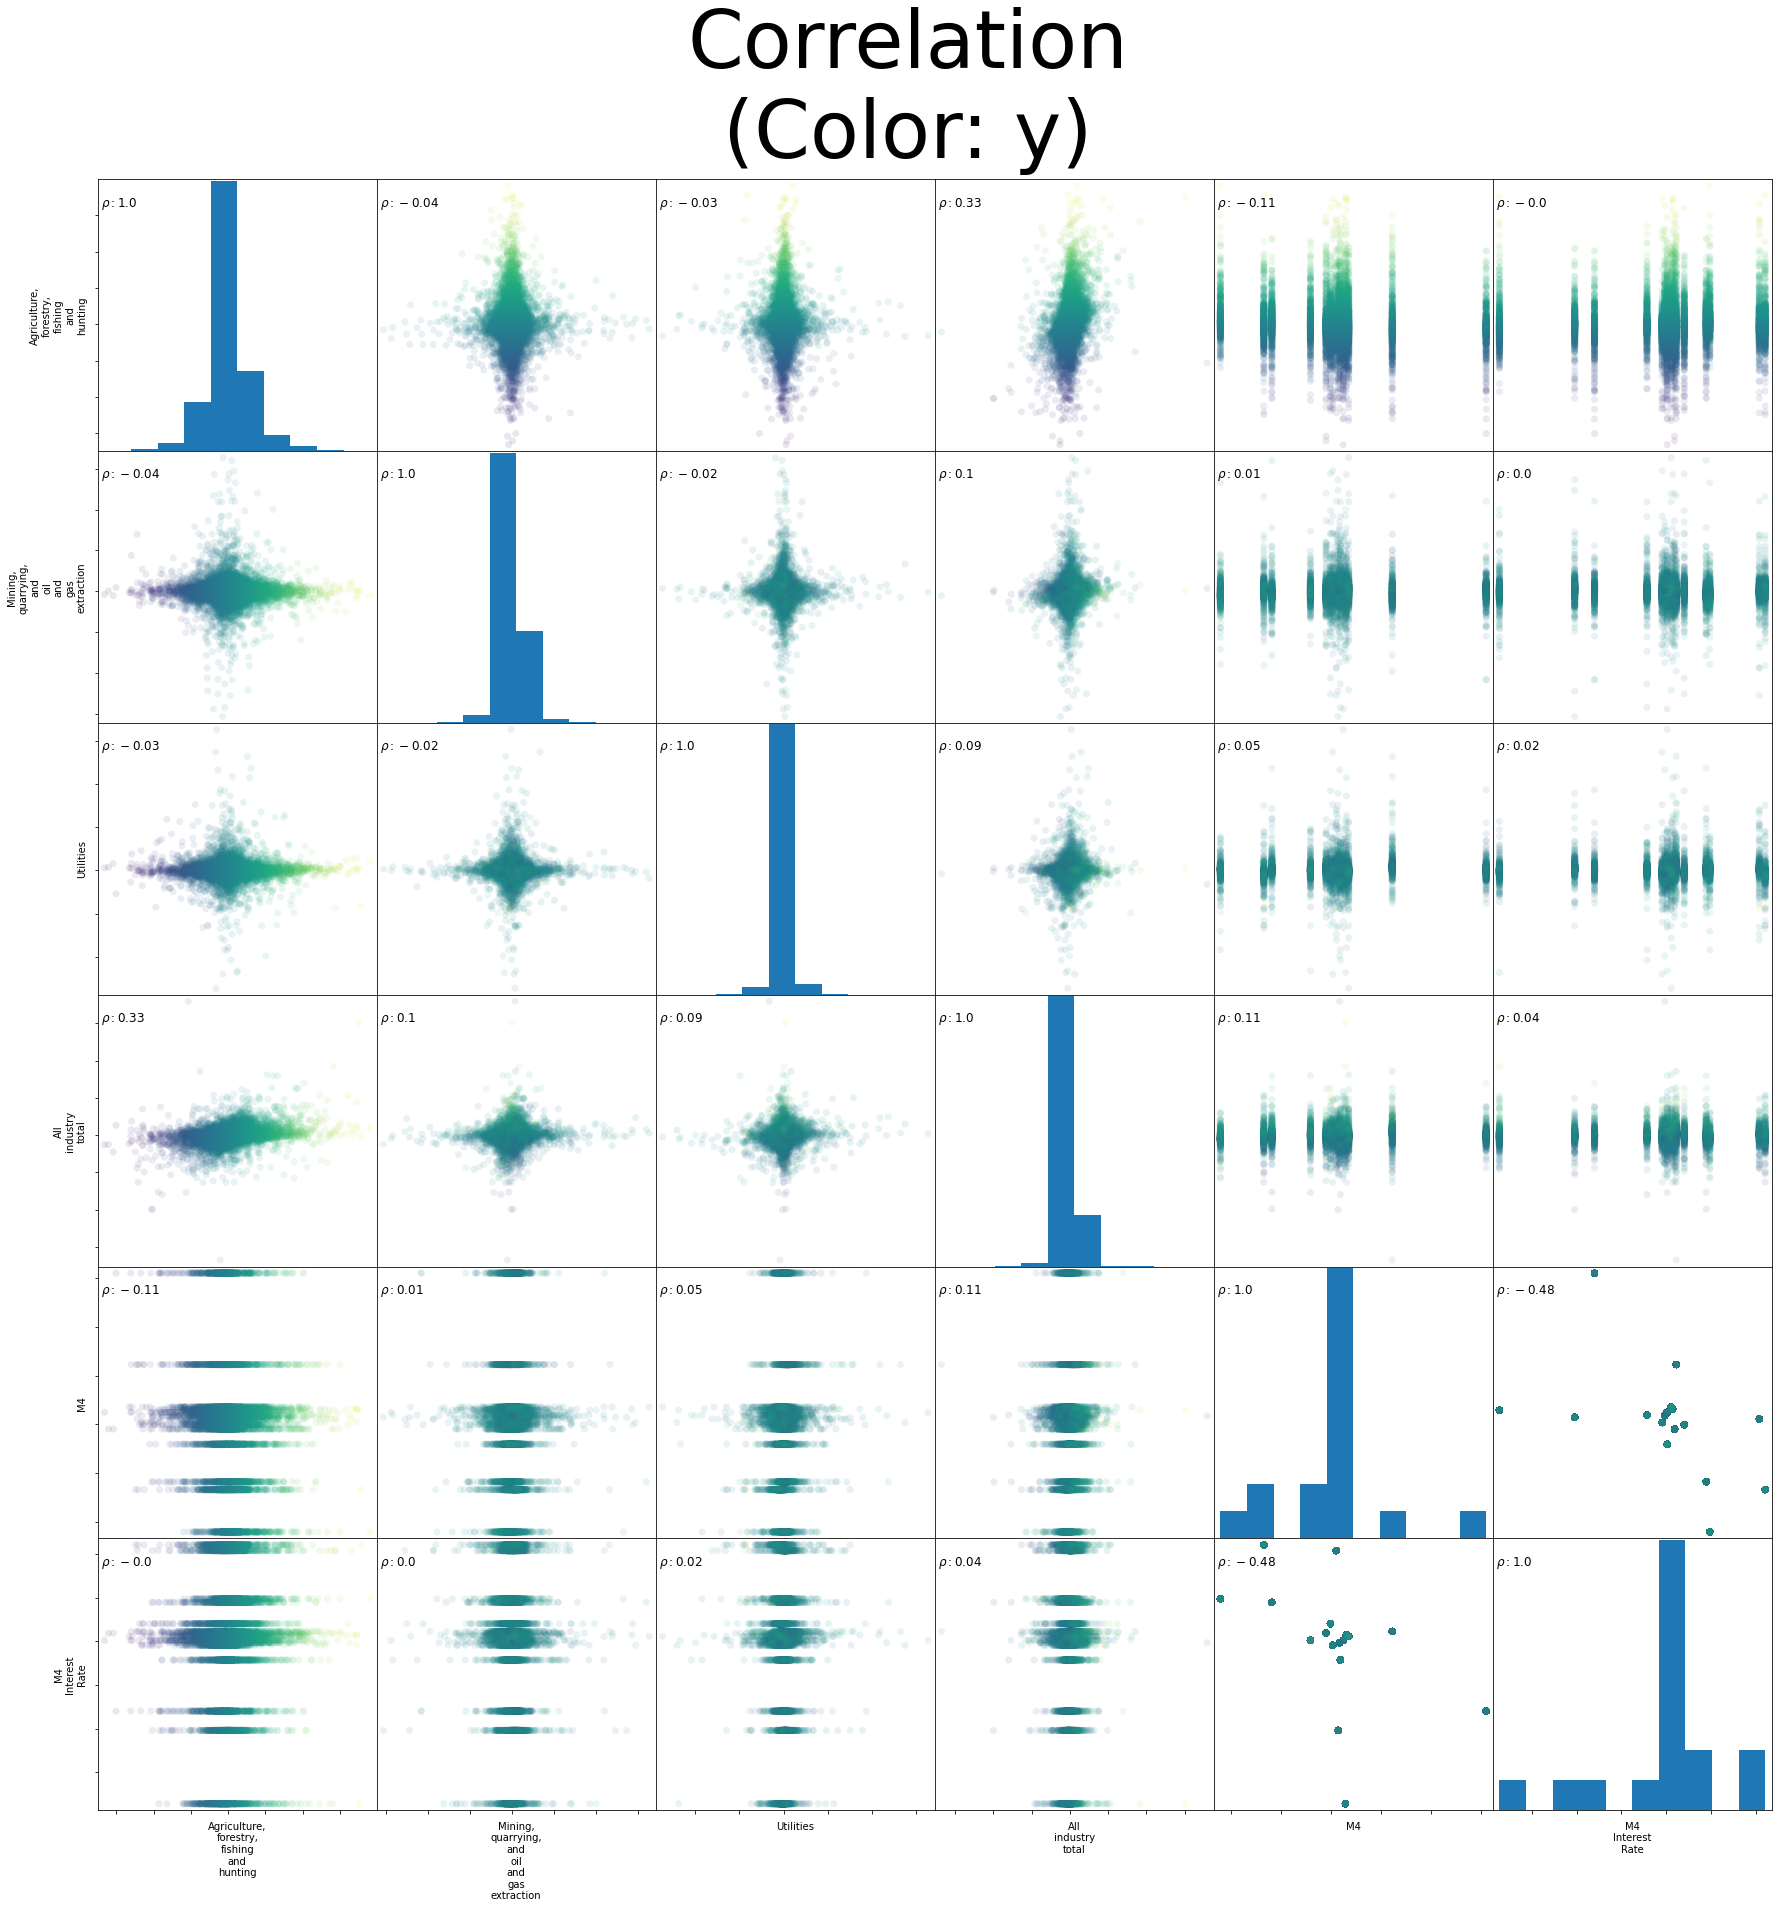

In [48]:
import pingouin
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
def full_corr_plot(data, color = "C0", pcorr = False):
    if pcorr == True:
        corr_df = data.pcorr()
    elif pcorr == False:
        corr_df = data.corr()
    keys = list(corr_df.keys())
    dim = len(keys)

    fig, ax = plt.subplots(figsize = (30, 30))
    a = pd.plotting.scatter_matrix(data, c = color, 
                                   s = 200, alpha = .1, ax=ax)  
    for i in range(len(keys)):
        x = keys[i]
        for j in range(len(keys)):
            y = keys[j]
            a[i][j].set_xticklabels([])
            a[i][j].set_yticklabels([])
            a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .88, x = 0.01, ha = "left")        
    plt.suptitle("Correlation\n(Color: y)",y = .96, fontsize = 80)
plot_df = ips_dct2['Diff'].dropna()
plot_df.rename(columns = {key:key.replace(" ", "\n") for key in plot_df.keys()}, inplace = True)
plot_keys = list(plot_df.keys())
full_corr_plot(plot_df, color = plot_df[plot_keys[0]], pcorr = True)
# y_var = ['Agriculture, forestry, fishing and hunting']
# x_vars = ['Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction', 'Manufacturing']
# corr_var = y_var + x_vars
# corr_data = log_df[corr_var]
# corr_data.corr().round(3)

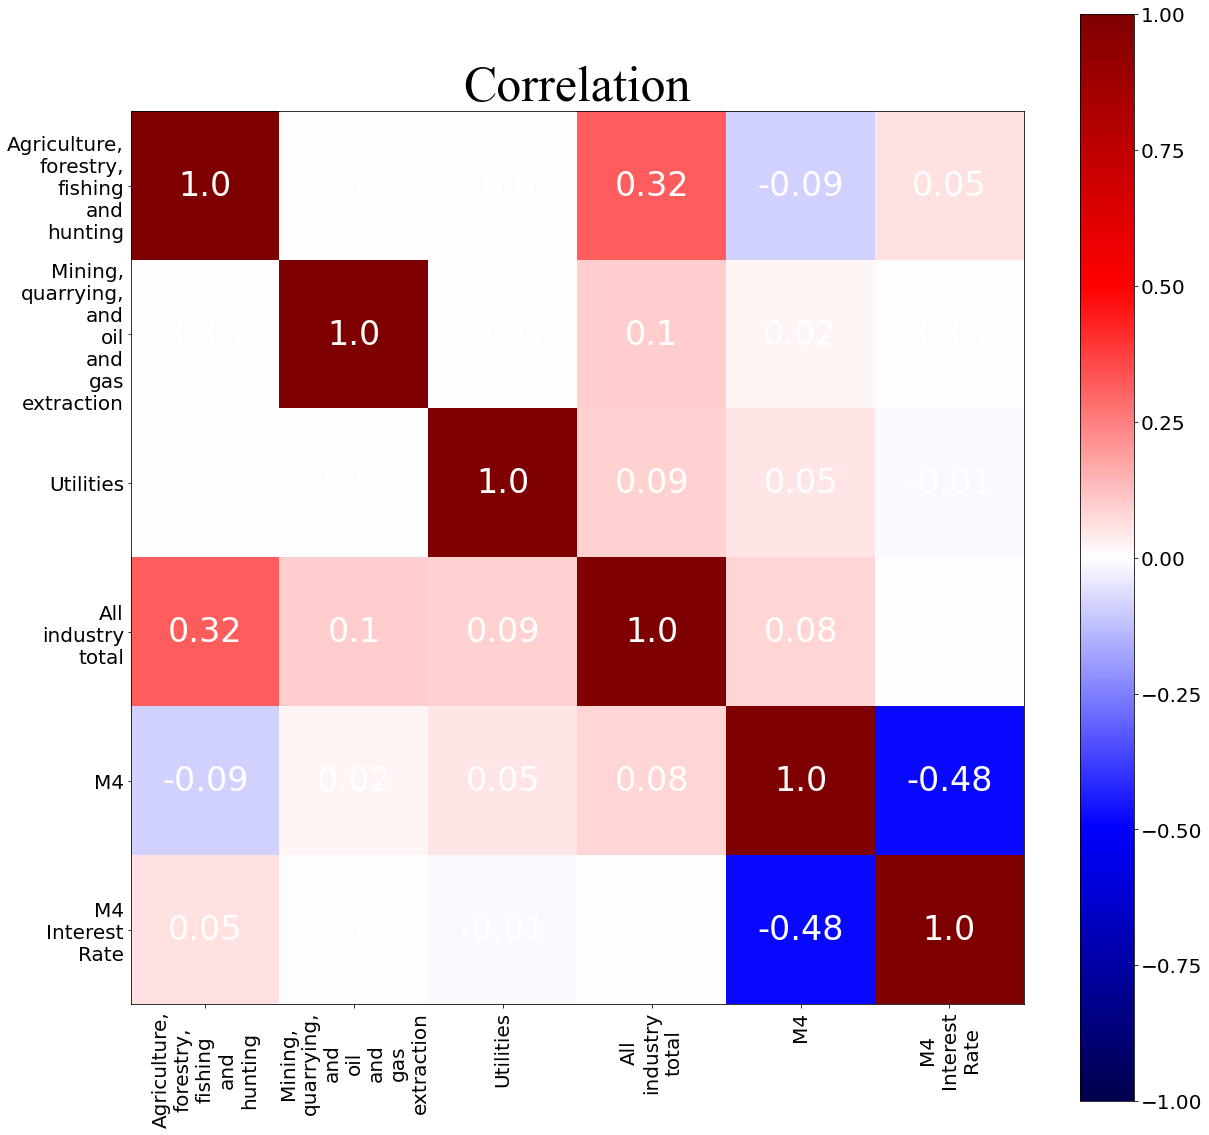

In [49]:
import numpy as np
# . . .
def corr_matrix_heatmap(data, pp = False):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if pp != False:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
corr_matrix_heatmap(plot_df.corr())


In [50]:
# list(plot_df)
# ips_df
plot_df.rename(columns = {key:key[:4].replace("\n", "") for key in plot_df.keys()}, inplace = True)
list(plot_df.keys())

['Agri', 'Mini', 'Util', 'All', 'M4', 'M4I']

C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Working for n conditional variables: 4: 100%|████████████████████████████████████████████| 4/4 [00:00<00:00,  6.86it/s]


keep control: M4I
keep control: Util
('Agri', 'M4') ['M4I', 'Util']
keep control: Mini
keep control: Util
('Agri', 'All') ['Mini', 'Util']
keep control: Agri
keep control: M4I
('Util', 'M4') ['Agri', 'M4I']
keep control: Agri
keep control: Mini
('Util', 'All') ['Agri', 'Mini']
keep control: Agri
keep control: Util
('M4I', 'M4') ['Agri', 'Util']
keep control: Agri
keep control: Util
('Mini', 'All') ['Agri', 'Util']


OutEdgeView([('Agri', 'M4'), ('Agri', 'All'), ('Util', 'M4'), ('Util', 'All'), ('M4I', 'M4'), ('Mini', 'All')])

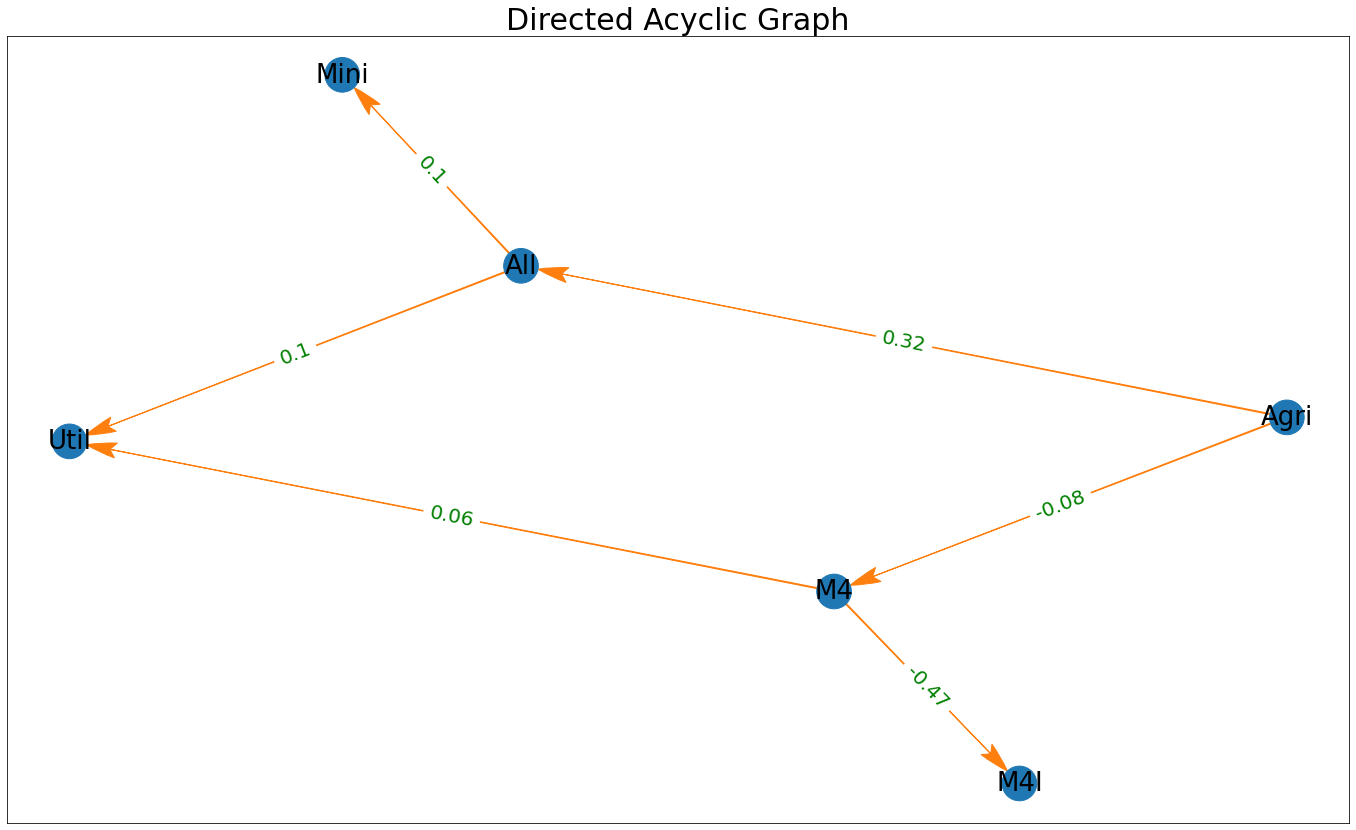

In [51]:
from matplotlib.patches import ArrowStyle
import copy
from matplotlib.backends.backend_pdf import PdfPages

undirected_graph = {key:[] for key in plot_df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in plot_df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

p_value = .01
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.estimators import PC
c = PC(plot_df)
max_cond_vars = len(plot_df.keys()) - 2

model = c.estimate(return_type = 'pdag', variant= 'parallel', significance_level = p_value,
                  max_cond_vars = max_cond_vars, ci_test = 'pearsonr')
edges = model.edges

pp = PdfPages("DAGOutputs1.pdf")

def graph_DAG(edges, df, title = ""):
    graph = nx.Graph()
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print('keep control:', control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ['C0' for g in graph]
    
    fig, ax = plt.subplots(figsize = (20, 12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200, with_labels=True,
                    arrows=True, font_color ='k', font_size=26, alpha=1, width = 1,
                    edge_color = 'C1',
                     arrowstyle=ArrowStyle('Fancy, head_length=3, head_width=1.5, tail_width=.1'), ax = ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)
    pp.savefig(fig, bbox_inches = "tight")

graph_DAG(edges, plot_df, title = 'Directed Acyclic Graph')


pp.close()                                                            
edges

In [52]:
plot_df

Agri      Mini      Util       All        M4       M4I
GeoFips TimePeriod                                                            
1001    2004       -0.570860  0.279452  0.436969  0.125152  0.005537  0.010413
        2005       -0.053545 -0.231773 -0.744634 -0.128070  0.001953 -0.000447
        2006        0.007748  0.103809  0.676109  0.045002  0.007281 -0.010213
        2007       -0.512766 -0.238435 -0.287827 -0.049211  0.014681 -0.018616
        2008       -0.375903 -0.216993 -0.332819 -0.119366 -0.058989  0.004477
...                      ...       ...       ...       ...       ...       ...
56041   2016       -0.419914 -0.141738  0.312645 -0.016646 -0.004740  0.000948
        2017       -0.173316 -0.077019 -0.206667 -0.017309 -0.000310  0.002030
        2018        0.388456 -0.049230 -0.184281 -0.013734  0.009623 -0.002134
        2019        0.608357 -0.244903  0.459370  0.013506  0.155539 -0.007997
        2020       -0.565758 -0.295273 -0.300224 -0.084335 -0.110496  0.004883

[10659 rows x 6 columns]

In [53]:
# !pip install geopandas

In [54]:
import geopandas as gpd

In [55]:
# counties = gpd.read_file("C:/Users/abiodun.idowu/OneDrive - North Dakota University System/Desktop/PhD/BEA project/notebook_to_start/tl_2022_us_county.shp")


In [56]:
# print(counties.head())

# # Rename the county name column to 'county_name'
# counties = counties.rename(columns={'NAME': 'county_name'})

# # Create a GeoDataFrame with just the county name and geometry columns
# counties_gdf = counties[['county_name', 'geometry']]


# county_gdf = counties.rename(columns={'GEOID': 'GeoFips'})

# # Check the new structure of the data

# # print(counties_gdf.head())

# # Merge the geometry column from the GeoDataFrame with the 'plot_df' DataFrame
# # merged_df = plot_df.merge(county_gdf[['GeoFips', 'geometry']], on='GeoFips')

# # 'merged_df' now contains both the attribute data from 'plot_df' and th

In [57]:
# county_gdf['GeoFips'] = county_gdf['GeoFips'].astype(str)

In [58]:
# merge_df = pd.concat([plot_df, county_gdf]).groupby('GeoFips')

In [59]:
# merge_df

In [60]:
# county_gdf

In [61]:
# print(plot_df.dtypes)
# print(county_gdf.dtypes)

In [62]:
# county_gdf['GeoFips'] = county_gdf['GeoFips'].astype(int)

In [63]:
# merge_df = pd.merge(plot_df.reset_index(), county_gdf, left_on='GeoFips', right_on='GeoFips')

In [64]:
# merge_df = merge_df.set_index('GeoFips')

In [65]:
# gdf = merge_df

In [66]:
# gdf = gdf.dropna(subset=['geometry'])

In [67]:
# gdf

In [68]:
# import geopandas as gpd
# import pandas as pd

In [69]:
# gdf = gpd.GeoDataFrame(gdf, geometry='geometry')

# # Check if a geometry intersects another geometry in the GeoDataFrame
# intersects = gdf.iloc[0].geometry.intersects(gdf.iloc[1].geometry)
# print(intersects)

In [70]:
# for index, GeoFips in gdf.iterrows():
#     neighbors = gdf[~gdf.geometry.disjoint(GeoFips.geometry)].county_name.tolist()
#     neighbor = [name for name in neighbors if GeoFips.county_name != name]
#     gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)

In [149]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the 
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
fips_code                                                               
21007           21      007  00516850  0500000US21007    Ballard   06   
21017           21      017  00516855  0500000US21017    Bourbon   06   
21031           21      031  00516862  0500000US21031     Butler   06   
21065           21      065  00516879  0500000US21065     Estill   06   
21069           21      069  00516881  0500000US21069    Fleming   06   
...            ...      ...       ...             ...        ...  ...   
31073           31      073  00835858  0500000US31073     Gosper   06   
39075           39      075  01074050  0500000US39075     Holmes   06   
48171           48      171  01383871  0500000US48171  Gillespie   06   
55079           55      079  01581100  0500000US55079  Milwaukee   06   
26139           26      139  01623012  0500000US26139     Ottawa   06   

                ALAND      AWATER  Population      state  \
fips_code                                                  
21007       639387454    69473325      7888.0   Kentucky   
21017       750439351     4829777     19788.0   Kentucky   
21031      1103571974    13943044     12879.0   Kentucky   
21065       655509930     6516335     14106.0   Kentucky   
21069       902727151     7182793     14581.0   Kentucky   
...               ...         ...         ...        ...   
31073      1186616237    11831826      1990.0   Nebraska   
39075      1094405866     3695230     43960.0       Ohio   
48171      2740719114     9012764     26988.0      Texas   
55079       625440563  2455383635    945726.0  Wisconsin   
26139      1459502408  2765830983    291830.0   Michigan   

                                                    geometry  
fips_code                                                     
21007      POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
21017      POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
21031      POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
21065      POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
21069      POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                      ...  
31073      POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
39075      POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
48171      POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
55079      POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
26139      POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3142 rows x 11 columns]

In [150]:
map_data.dtypes

STATEFP          int64
COUNTYFP        object
COUNTYNS        object
AFFGEOID        object
NAME            object
LSAD            object
ALAND            int64
AWATER           int64
Population     float64
state           object
geometry      geometry
dtype: object

In [81]:
# for index, fips_code in map_data.iterrows():
#     neighbors = map_data[~map_data.geometry.disjoint(fips_code.geometry)].index.tolist()
#     neighbors = [name for name in neighbors if name not in fips_code.index]
#     print(neighbors)
# map_data.at[index, "NEIGHBORS"] = neighbors

In [82]:
# for index, fips_code in map_data.iterrows():
#     neighbors = map_data[~map_data.geometry.disjoint(fips_code.geometry)].index.tolist()
#     neighbors = [name for name in neighbors if name != index]
#     print(index, neighbors)
# map_data.at[index, "NEIGHBORS"] = neighbors

In [83]:
# for index, fips_code in map_data.iterrows():
#     neighbors = map_data[~map_data.geometry.disjoint(fips_code.geometry)].index.tolist()
#     neighbors = [int(name) for name in neighbors if name != index]
#     print(index, neighbors)
# map_data.at[index, "NEIGHBORS"] = neighbors

In [84]:
# find_neighbors(year_data)

In [85]:
# for year in range (2004, 2020):
#     year_data = full_df.loc[year]
#     year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
#     find_neighbors(year_data)    
# #     year_data = year_data.join(map_data["NEIGHBORS"])
# #     year_data["NeighborGDP"]
# #     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
# #     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
# #                           axis = 1)
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)


In [151]:
def find_neighbors(df):
    for index, fips_code in df.iterrows():

        neighbors = df[~df.geometry.disjoint(fips_code.geometry)].index.tolist()
#         neighbors = [int(name) for name in neighbors if name != index]
        print(index, neighbors)
        df.at[index, "NEIGHBORS"] = neighbors
map_data["NEIGHBORS"] = ""
find_neighbors(map_data)


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

37175 [37099, 37175, 45077, 37089, 45073, 37021, 45045, 37087]
37199 [37111, 37199, 37115, 37021, 37121, 47171]
38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241,

28151 [28055, 28151, 28011, 28053, 5017, 28133, 28125]
29041 [29033, 29041, 29195, 29117, 29121, 29175, 29115, 29089]
29069 [29143, 29207, 5093, 29023, 29069, 5021, 5055, 5031, 29155]
29087 [29087, 20043, 29005, 31127, 29147, 31147, 29003]
29113 [29113, 29183, 29139, 17013, 29219, 29163]
29159 [29159, 29195, 29107, 29053, 29083, 29141, 29015, 29101]
29183 [29189, 29113, 29183, 17083, 17013, 29219, 17119, 29071]
29195 [29033, 29041, 29159, 29195, 29107, 29053, 29089]
29197 [29199, 29197, 29171, 19007, 29001, 19051]
29201 [29143, 29207, 29031, 29201, 17003, 29133]
30001 [16043, 30023, 30057, 16059, 30001, 30081, 30093, 16033]
30013 [30015, 30013, 30045, 30049, 30059, 30099]
30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [3001

37177 [37095, 37177, 37187]
38005 [38005, 38071, 38103, 38095, 38027, 38069, 38063]
38033 [38033, 38053, 38007, 38087, 30109, 30025]
38053 [30085, 30083, 38033, 38053, 38007, 38061, 38105, 30109, 38025]
38059 [38037, 38085, 38059, 38065, 38089, 38015, 38029, 38057]
38067 [38099, 27089, 38067, 27069, 38019]
38071 [38099, 38005, 38071, 38095, 38019, 38063]
22067 [5003, 22067, 22123, 22111, 5017, 22073, 22083, 5139]
22069 [22031, 22081, 22069, 22079, 22115, 22043, 22127, 22013, 22085]
22079 [22009, 22069, 22079, 22115, 22043, 22003, 22059, 22039]
22097 [22001, 22009, 22099, 22055, 22097, 22077, 22039]
22107 [22029, 28149, 28001, 22107, 22025, 22065, 28021, 22041, 28063]
22113 [22001, 22045, 22053, 22055, 22113, 22023]
22117 [22117, 22105, 28109, 22103, 28091, 28113, 28147]
22123 [22035, 22067, 22123, 5017, 22083]
23007 [23007, 23025, 23011, 23001, 23017]
8065 [8037, 8065, 8093, 8097, 8117, 8015]
8071 [35007, 8023, 8055, 8071, 8101, 8009, 8011, 8089, 35059]
8093 [8019, 8065, 8093, 8043, 81

45009 [45005, 45029, 45009, 45011, 45049, 45075]
45057 [45025, 45091, 45055, 45057, 45039, 45023, 37179, 37119]
45087 [45091, 45071, 45059, 45083, 45087, 45021, 45039, 45023]
47025 [47173, 47057, 47013, 47025, 51105, 21235, 21013, 47067]
47053 [47053, 47045, 47183, 47131, 47113, 47017, 47033]
47135 [47005, 47081, 47135, 47085, 47101, 47039, 47181]
47163 [47019, 47073, 47091, 47163, 51191, 51169, 51520, 47179]
48089 [48089, 48015, 48239, 48285, 48481, 48149]
48135 [48103, 48475, 48135, 48461, 48495, 48329, 48003]
48203 [22017, 48315, 48203, 48401, 48459, 48365, 48183]
48323 [48479, 48323, 48507, 48127, 48271, 48463]
48351 [22011, 48241, 48361, 22115, 48351, 48403, 22019, 22085]
48379 [48499, 48467, 48379, 48231, 48223]
48409 [48025, 48007, 48409, 48391, 48355, 48249, 48297]
48465 [48465, 48435, 48271, 48105, 48137, 48443]
49007 [49049, 49047, 49007, 49019, 49015, 49039, 49013]
49019 [8077, 49047, 49007, 49019, 49037, 49055, 8085, 8045, 49015]
51005 [54063, 51017, 51023, 51005, 54025, 51

37139 [37029, 37139, 37143, 37073]
45061 [45055, 45041, 45061, 45085, 45031]
46055 [46093, 46117, 46041, 46071, 46075, 46055, 46103, 46137]
47045 [47097, 5093, 47053, 47045, 47131, 47095, 29155, 47033]
47127 [47003, 47031, 47127, 47103, 47051]
51081 [51053, 51175, 37131, 51081, 51025, 51183, 51595]
51105 [47025, 51105, 51195, 21013, 51169, 21095, 47067]
51195 [21195, 51051, 51105, 51195, 21133, 51720, 51169, 51167, 21095]
54007 [54021, 54067, 54013, 54007, 54041, 54015, 54101]
54099 [54043, 21159, 54059, 54099, 54011, 21127, 21019, 39087]
42031 [42005, 42031, 42121, 42019, 42065, 42053]
1009 [1055, 1095, 1115, 1043, 1009, 1073, 1127]
1047 [1001, 1091, 1131, 1047, 1021, 1085, 1105]
5073 [22119, 5099, 5057, 22015, 5073, 5027, 5091]
6027 [6019, 6051, 32003, 6107, 6027, 32009, 32023, 6029, 6071]
6053 [6019, 6069, 6079, 6053, 6031, 6087]
6099 [6001, 6047, 6085, 6009, 6043, 6099, 6077, 6109]
8111 [8083, 8091, 8113, 8111, 8033, 8053, 8067]
12045 [12077, 12037, 12013, 12045, 12005]
12105 [1205

12007 [12107, 12007, 12019, 12001, 12003, 12125]
13031 [13103, 13251, 13029, 13107, 13031, 13043, 13165, 13109]
39123 [39095, 39123, 39143, 39173]
40101 [40145, 40135, 40101, 40021, 40061, 40111, 40091]
27069 [27089, 38067, 27069, 27135]
27107 [38017, 27087, 27119, 38097, 27107, 27005, 27027]
27145 [27097, 27171, 27067, 27145, 27153, 27141, 27093, 27121, 27041, 27009]
28049 [28163, 28149, 28029, 28121, 28089, 28021, 28049, 28127]
29171 [29197, 29171, 19007, 19185, 29001, 29211, 29129]
30075 [30087, 56033, 30003, 30075, 56005, 56011, 30017, 30011]
32011 [32015, 32033, 32011, 32023, 32007]
34033 [34015, 10003, 34033, 34011]
36113 [36091, 36115, 36031, 36113, 36041]
37031 [37049, 37103, 37133, 37031]
37113 [37039, 37099, 37043, 37075, 37173, 37113, 13241]
38035 [38099, 27089, 27119, 38097, 38035, 38063, 38091]
39055 [39035, 39055, 39153, 39007, 39133, 39155, 39085]
46023 [46067, 46085, 46009, 46003, 46023, 46015, 46043, 31107, 46053, 31015]
47093 [47001, 47173, 47057, 47155, 47089, 47009,

26023 [26023, 26149, 26077, 26025, 26059, 18087, 18151]
37001 [37037, 37001, 37033, 37081, 37157, 37151, 37135]
55077 [55001, 55077, 55021, 55137, 55047]
29203 [29203, 29149, 29035, 29091, 29215, 29065, 29179]
29133 [21007, 29143, 29201, 17003, 29133, 21075, 21039, 21105]
29149 [5121, 5049, 5135, 29203, 29149, 29035, 29091, 29181]
31031 [31091, 46123, 31103, 31009, 46121, 31171, 31031, 31161, 46007, 31017, 46102, 31075]
31035 [31035, 31081, 31181, 31185, 31129, 31001, 31059]
31037 [31167, 31037, 31023, 31053, 31039, 31141]
38027 [38005, 38103, 38027, 38039, 38031, 38063]
13205 [13007, 13205, 13095, 13321, 13087, 13071, 13275, 13131]
13315 [13271, 13093, 13287, 13315, 13235, 13081, 13091, 13017]
16033 [16023, 16043, 16059, 30001, 16051, 16033]
17043 [17197, 17031, 17043, 17089, 17093]
47101 [47081, 47135, 47119, 47101, 47181, 47099]
48385 [48385, 48137, 48019, 48463, 48265]
48399 [48083, 48441, 48451, 48399, 48353, 48081, 48095]
55085 [55069, 55085, 55067, 55125, 55041, 55099]
40131 [40

6103 [6045, 6063, 6089, 6021, 6103, 6105, 6007]
40009 [40057, 40075, 40055, 40039, 40009, 48483, 48087, 40129, 40149]
40019 [40067, 40095, 40019, 40069, 40099, 40085, 40137, 40049]
31041 [31009, 31041, 31047, 31071, 31113, 31175, 31111, 31115, 31163, 31019]
38089 [38037, 38059, 38007, 38089, 38087, 38057, 38041, 38025]
26131 [26053, 26071, 26061, 26131]
38061 [38053, 38055, 38101, 38061, 38105, 38013, 38025]
29001 [29199, 29197, 29171, 29001, 29121, 29211, 29115, 29103]
51790 [51015, 51790]
40069 [40013, 40095, 40005, 40019, 40069, 40099, 40123, 40029]
46097 [46079, 46111, 46077, 46087, 46097, 46061]
21171 [21003, 21171, 21169, 47027, 21009, 47111, 21057]
26075 [26065, 26075, 26045, 26093, 26091, 26025, 26161, 26059]
26079 [26137, 26055, 26165, 26079, 26143, 26039, 26009, 26113]
26095 [26033, 26097, 26003, 26095, 26153]
26133 [26165, 26133, 26035, 26073, 26123, 26113, 26107, 26085]
26143 [26135, 26051, 26079, 26143, 26039, 26035, 26113, 26129]
39007 [42049, 39055, 39007, 39155, 39085, 

19005 [55023, 55123, 19191, 19043, 19005, 27055, 19065]
19013 [19075, 19017, 19171, 19023, 19013, 19019, 19011, 19065]
19019 [19113, 19017, 19055, 19043, 19013, 19019, 19011, 19065]
20139 [20111, 20045, 20177, 20059, 20031, 20139, 20197]
42069 [42127, 42089, 42131, 42115, 42079, 42069]
40115 [40041, 40035, 29119, 20021, 40115, 29145]
27045 [27109, 19191, 19089, 27099, 27045, 27169, 27055]
27123 [27053, 27163, 27123, 27037, 27003]
13099 [13007, 13201, 13037, 1067, 13253, 13099, 13061, 1069]
16053 [16063, 16083, 16031, 16053, 16067, 16047]
54061 [42059, 42051, 54049, 54061, 54077, 54103, 54091]
42007 [42003, 42073, 42019, 42007, 39029, 54029, 42125]
48353 [48151, 48441, 48399, 48353, 48081, 48253, 48415, 48335]
48357 [48357, 40007, 40139, 48393, 48195, 48295]
48367 [48251, 48497, 48367, 48221, 48439, 48363, 48237]
54069 [39013, 54069, 54051, 39081, 54009, 42125]
28037 [28157, 28001, 28085, 28037, 28005, 28063]
28041 [1129, 1097, 28153, 28041, 28039, 28111]
48221 [48251, 48143, 48367, 482

29107 [29033, 29159, 29195, 29095, 29177, 29107, 29101]
13061 [1005, 13037, 13243, 13239, 1067, 13099, 13061]
28039 [1097, 28041, 28059, 28039, 28111, 28131]
37081 [37057, 37001, 37169, 37081, 37157, 37151, 37067]
37119 [45091, 45057, 37097, 37179, 37025, 37109, 37119, 37071]
37171 [51141, 37193, 37169, 37197, 37171, 37005, 37067, 51035, 51077]
28005 [28157, 22037, 22091, 22105, 28085, 28037, 28005, 28113]
28113 [22117, 22105, 28085, 28005, 28113, 28147]
17025 [17159, 17121, 17051, 17191, 17025, 17049, 17079]
55049 [55043, 55111, 55025, 55049, 55045, 55103, 55065]
48253 [48151, 48441, 48417, 48353, 48253, 48433, 48059, 48207]
51550 [37053, 37029, 51740, 51810, 51550, 51800, 51710]
46129 [46041, 46089, 46107, 46129, 46045, 46031, 46021]
51065 [51029, 51003, 51075, 51049, 51065, 51109]
51520 [47163, 51191, 51520]
28063 [28001, 28029, 22107, 28021, 28085, 28037, 28063]
28127 [28029, 28121, 28049, 28129, 28065, 28127, 28031, 28077]
17049 [17173, 17051, 17025, 17049, 17035, 17079]
1007 [106

48217 [48035, 48349, 48309, 48251, 48139, 48217, 48293]
48299 [48053, 48411, 48299, 48319, 48031, 48171]
18011 [18097, 18107, 18057, 18011, 18023, 18063]
20121 [29013, 20091, 20045, 20059, 20003, 20121, 29037, 20107]
31143 [31023, 31081, 31141, 31159, 31121, 31143, 31185]
32005 [6003, 6051, 6061, 32510, 32005, 32019, 6017]
31087 [20153, 31145, 31063, 31087, 31085, 31057]
31117 [31091, 31171, 31113, 31111, 31117, 31005, 31101]
42109 [42067, 42097, 42119, 42109, 42087]
23005 [23023, 23031, 23005, 23001, 23017]
17035 [17029, 17173, 17023, 17049, 17035, 17079]
17039 [17107, 17115, 17147, 17113, 17039]
20041 [20143, 20113, 20027, 20169, 20061, 20127, 20041, 20115]
20137 [20065, 31065, 20147, 31083, 20137, 20179, 20039]
42025 [42089, 42095, 42079, 42107, 42025, 42077]
20179 [20065, 20063, 20193, 20137, 20179, 20039]
26151 [26063, 26147, 26087, 26151, 26157]
17079 [17159, 17023, 17025, 17049, 17033, 17035, 17079]
51021 [51185, 51155, 51173, 54055, 51197, 51021, 51071]
40109 [40073, 40027, 401

39045 [39127, 39073, 39129, 39089, 39045, 39049]
5033 [40135, 40001, 5047, 5087, 5033, 5143, 5131]
29163 [29113, 17149, 29173, 29139, 17013, 29007, 29163]
36083 [36091, 36115, 25003, 50003, 36021, 36039, 36001, 36083]
54105 [54087, 54107, 54013, 54085, 54035, 54105]
48019 [48029, 48385, 48019, 48259, 48463, 48325, 48265]
51770 [51161, 51770, 51775]
51775 [51161, 51770, 51775]
13275 [12065, 12073, 13027, 13205, 13071, 13275, 13131]
31079 [31081, 31093, 31121, 31079, 31001, 31019]
8045 [8077, 8037, 49047, 8097, 49019, 8103, 8107, 8045]
2198 [2130, 2195, 2220, 2198]
13227 [13123, 13057, 13085, 13015, 13129, 13227]
48181 [40013, 40095, 48097, 48085, 48121, 40085, 48181, 48147]
48195 [48341, 48421, 48357, 48233, 40139, 48393, 48195]
48211 [40045, 48179, 48483, 40129, 48393, 48211, 48295]
48295 [40045, 48357, 40007, 48393, 48211, 48295]
51620 [51175, 51093, 51620]
55103 [55043, 55023, 55111, 55123, 55049, 55103]
55065 [55043, 17177, 17085, 55049, 55045, 55065]
13281 [13291, 13137, 37043, 133

19129 [31153, 19137, 19071, 19145, 31025, 19129, 19155]
21023 [21097, 21201, 39025, 21191, 39015, 21023, 21161]
37135 [37037, 37145, 37001, 37033, 37063, 37135]
38091 [38017, 38003, 38097, 38035, 38039, 38063, 38091]
8095 [8125, 31029, 8115, 8075, 31135, 8095]
48207 [48275, 48417, 48253, 48269, 48447, 48433, 48023, 48207]
54075 [51017, 51091, 54071, 54025, 54083, 54101, 54075]
25015 [25013, 25003, 25011, 25015, 25027]
21115 [21071, 21153, 21159, 21175, 21127, 21115]
39161 [39125, 39137, 18003, 39107, 18001, 39161, 39003, 39011]
29043 [29109, 29077, 29067, 29225, 29209, 29043, 29213]
13097 [13121, 13223, 13067, 13045, 13097]
13155 [13019, 13069, 13287, 13277, 13017, 13155]
38075 [38101, 38009, 38013, 38049, 38075]
38093 [38003, 38103, 38045, 38039, 38043, 38031, 38047, 38093]
39003 [39137, 39065, 39063, 39161, 39003, 39011]
39021 [39159, 39097, 39091, 39023, 39149, 39109, 39021]
1081 [1113, 1087, 13215, 1017, 13145, 1123, 1081]
26127 [26121, 26123, 26105, 26127, 26085]
26145 [26017, 261

In [79]:
full_df = full_df.reset_index()
full_df["FIPS"] = full_df["GeoFips"]
full_df = full_df.set_index(["TimePeriod","GeoFips"])
full_df.dropna(subset = ["All industry total"], inplace = True)

In [152]:
all_data = all_data.reset_index()
all_data["FIPS"] = all_data["GeoFips"]
all_data = all_data.set_index(["TimePeriod","GeoFips"])
all_data.dropna(subset = ["All industry total"], inplace = True)

In [80]:
# full_df["NeighborGDP"] = np.NaN
# year_df_dict =[] 
# for year in full_df.index.get_level_values("TimePeriod").unique():# range (2001, 2020):
#     year_data = full_df.loc[year]
#     year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
#     find_neighbors(year_data)    
# #     year_data = year_data.join(map_data["NEIGHBORS"])
# #     year_data["NeighborGDP"]
# #     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
# #     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
# #                           axis = 1)
#     full_df["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)


In [81]:
# # full_df.dropna(subset = ["NeighborGDP"])#.index.get_level_values("TimePeriod").unique()
# full_df.loc[year, "NeighborGDP"].loc[year_data.index] = year_data.apply(
#     lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)
# full_df.loc[year, "NeighborGDP"].loc[year_data.index]
# # full_df.loc[year]
# # full_df.loc[year].loc[year_data.index]


In [153]:
import datetime
# full_df["NeighborGDP"][full_df.index.get_level_values("GeoFips").isin(year_data["FIPS"])].loc[year]



In [83]:

try_df = full_df.reset_index()
try_df.set_index(["GeoFips"])


TimePeriod  Accommodation and food services  \
GeoFips                                                
1001           2001                          46510.0   
1001           2002                          45576.0   
1001           2003                          48870.0   
1001           2004                          49738.0   
1001           2005                          46414.0   
...             ...                              ...   
56045          2016                           3499.0   
56045          2017                              NaN   
56045          2018                              NaN   
56045          2019                              NaN   
56045          2020                              NaN   

         Administrative and support and waste management and remediation services  \
GeoFips                                                                             
1001                                                   NaN                          
1001                                                   NaN                          
1001                                                   NaN                          
1001                                                   NaN                          
1001                                                   NaN                          
...                                                    ...                          
56045                                                655.0                          
56045                                                  NaN                          
56045                                                  NaN                          
56045                                                756.0                          
56045                                                908.0                          

         Agriculture, forestry, fishing and hunting  All industry total  \
GeoFips                                                                   
1001                                        22455.0            949800.0   
1001                                        18063.0            984039.0   
1001                                        39941.0           1008032.0   
1001                                        49903.0           1170278.0   
1001                                        59099.0           1195319.0   
...                                             ...                 ...   
56045                                       13871.0            305446.0   
56045                                       19901.0            300909.0   
56045                                       23787.0            315332.0   
56045                                       14194.0            322576.0   
56045                                        8653.0            312665.0   

         Arts, entertainment, and recreation  \
GeoFips                                        
1001                                  2150.0   
1001                                  1935.0   
1001                                  1846.0   
1001                                  1897.0   
1001                                  2277.0   
...                                      ...   
56045                                  351.0   
56045                                    NaN   
56045                                    NaN   
56045                                    NaN   
56045                                    NaN   

         Arts, entertainment, recreation, accommodation, and food services  \
GeoFips                                                                      
1001                                               48577.0                   
1001                                               47411.0                   
1001                                               50585.0                   
1001                                               51503.0                   
1001                                               48623.0                   
...                        

In [154]:
try_df = all_data.reset_index()
try_df.set_index(["GeoFips"])

TimePeriod  index  Accommodation and food services  \
GeoFips                                                       
1001           2001      0                     16512.640993   
1001           2002      1                     28562.296715   
1001           2003      2                     21266.318538   
1001           2004      3                     18645.433859   
1001           2005      4                     13789.763595   
...             ...    ...                              ...   
56045          2016  62355                      2760.857215   
56045          2017  62356                              NaN   
56045          2018  62357                              NaN   
56045          2019  62358                              NaN   
56045          2020  62359                              NaN   

         Administrative and support and waste management and remediation services  \
GeoFips                                                                             
1001                                                   NaN                          
1001                                                   NaN                          
1001                                                   NaN                          
1001                                                   NaN                          
1001                                                   NaN                          
...                                                    ...                          
56045                                           516.822371                          
56045                                                  NaN                          
56045                                                  NaN                          
56045                                           416.928626                          
56045                                           726.871012                          

         Agriculture, forestry, fishing and hunting  All industry total  \
GeoFips                                                                   
1001                                    7972.293130       337211.490327   
1001                                   11320.009776       616693.301246   
1001                                   17380.765883       438656.222802   
1001                                   18707.287906       438705.638465   
1001                                   17558.521969       355133.503475   
...                                             ...                 ...   
56045                                  10944.798637       241009.657871   
56045                                   9336.880231       141176.387794   
56045                                   9752.767528       129287.412874   
56045                                   7827.890098       177898.370890   
56045                                   6926.888624       250294.190636   

         Arts, entertainment, and recreation  \
GeoFips                                        
1001                              763.323546   
1001                             1212.656752   
1001                              803.307224   
1001                              711.134103   
1001                              676.504755   
...                                      ...   
56045                             276.953667   
56045                                    NaN   
56045                                    NaN   
56045                                    NaN   
56045                                    NaN   

         Arts, entertainment, recreation, accommodation, and food services  \
GeoFips                                                                      
1001                                          17246.496700                   
1001                                          29712.283868                   
1001                                          22012.619669                   
1001                                          19307.084725                   
1001          

Create neighbors and sum of their GDP

In [155]:
years_list = try_df["TimePeriod"].unique()
full_df["NeighborGDP"] = np.NaN
year_df_dict ={}
for year in years_list:    
    year_data = full_df.loc[year]
    year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
    find_neighbors(year_data)    
#     year_data = year_data.join(map_data["NEIGHBORS"])
#     year_data["NeighborGDP"]
#     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)
    full_df["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
                          axis = 1)    
    
    
##############################################################################3    
    
    
    year_data["NeighborGDP"] = year_data.apply(
        lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
                              axis = 1)
    year_data["Year"] = datetime.datetime(year,1,1)
    trial = year_data    
    try_df = full_df.reset_index().set_index(["GeoFips"])
    year_df_dict[year] = pd.merge(try_df.loc[try_df["TimePeriod"]==year], trial.loc[trial["Year"].dt.year==year],
                       left_index=True, right_index=True)

KeyError: 2001

In [157]:
years_list = try_df["TimePeriod"].unique()
all_data["NeighborGDP"] = np.NaN
year_df_dict ={}
for year in years_list:    
    year_data = all_data.loc[year]
    year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
    find_neighbors(year_data)    
#     year_data = year_data.join(map_data["NEIGHBORS"])
#     year_data["NeighborGDP"]
#     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)
    all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
                          axis = 1)    
    
    
##############################################################################3    
    
    
    year_data["NeighborGDP"] = year_data.apply(
        lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
                              axis = 1)
    year_data["Year"] = datetime.datetime(year,1,1)
    trial = year_data    
    try_df = all_data.reset_index().set_index(["GeoFips"])
    year_df_dict[year] = pd.merge(try_df.loc[try_df["TimePeriod"]==year], trial.loc[trial["Year"].dt.year==year],
                       left_index=True, right_index=True)

21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

37049 [37049, 37013, 37103, 37137, 37107, 37147, 37031]
37055 [37055, 37053, 37095]
37059 [37059, 37057, 37159, 37097, 37197, 37067]
37069 [37069, 37083, 37127, 37101, 37183, 37185, 37181, 37077]
37083 [37069, 37083, 37117, 37127, 37065, 37015, 37131, 37185]
37091 [37091, 37015, 37131, 37041, 37073]
37093 [37093, 37165, 37153, 37125, 37051, 37155]
37099 [37099, 37175, 45073, 37173, 37113, 37087, 13241]
37111 [37111, 37199, 37023, 37161, 37021, 37121, 37011]
37117 [37083, 37117, 37013, 37065, 37015, 37147, 37187]
37127 [37069, 37083, 37127, 37065, 37101, 37183, 37185, 37195]
37165 [37093, 37165, 37153, 45069, 37125, 37155]
37175 [37099, 37175, 45077, 37089, 45073, 37021, 45045, 37087]
37199 [37111, 37199, 37115, 37021, 37121, 47171]
38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133,

13077 [13121, 13149, 13077, 13113, 13285, 13255, 13045, 13199]
13123 [13123, 13213, 13111, 13085, 13129, 13227]
13133 [13141, 13133, 13237, 13219, 13265, 13211, 13221]
13137 [13137, 13139, 45073, 13311, 13257, 13011, 13281, 13241]
13139 [13137, 13139, 13157, 13135, 13311, 13117, 13011, 13085, 13187, 13013]
13143 [13143, 1029, 13233, 13223, 13045]
13157 [13139, 13157, 13195, 13219, 13135, 13059, 13011, 13013]
13171 [13171, 13207, 13255, 13035, 13293, 13231]
13181 [13189, 13317, 13181, 45065, 13073, 13105]
13185 [13027, 13185, 12047, 12079, 13075, 13019, 13101, 13173]
13195 [13157, 13195, 13059, 13011, 13119, 13147, 13105, 13221]
13213 [13313, 13123, 13213, 13111, 47139, 13129, 47011]
13217 [13217, 13151, 13159, 13035, 13211, 13247, 13297]
13237 [13009, 13141, 13133, 13237, 13159, 13169, 13211]
13245 [13189, 13245, 45003, 13073, 45037, 13033, 13163]
13251 [13103, 45005, 13251, 13031, 13165, 13033, 45049]
13269 [13269, 13079, 13197, 13249, 13225, 13193, 13293, 13263]
13279 [13209, 13267, 

51127 [51085, 51036, 51127, 51087, 51101, 51097]
51133 [51133, 51159, 51193, 51103]
51159 [51057, 51133, 51159, 51193, 51103]
51179 [51099, 51033, 51179, 51047, 51061]
51187 [51187, 51157, 51171, 51043, 51139, 51061]
53047 [53007, 53025, 53043, 53047, 53073, 53057, 53019, 53017]
53049 [53049, 53027, 53041, 53069]
53053 [53053, 53077, 53045, 53033, 53067, 53035, 53041]
53061 [53007, 53061, 53033, 53057, 53029]
53071 [53005, 53071, 53021, 41059, 53013]
53073 [53047, 53073, 53057]
54013 [54021, 54087, 54013, 54007, 54085, 54015, 54105]
54017 [54021, 54017, 54033, 54095, 54085, 54041, 54103]
54019 [54039, 54067, 54019, 54081, 54025, 54089]
54023 [54023, 54027, 54071, 54093, 54083, 24023, 54031, 54057, 54077]
54027 [24001, 54023, 54027, 54065, 54031, 54057]
54033 [54001, 54017, 54033, 54041, 54049, 54097, 54103, 54091]
54037 [24043, 51107, 54037, 54003, 51043]
54043 [54005, 54039, 54045, 54043, 54059, 54099, 54011, 54079]
54065 [24043, 24001, 54027, 54065, 54003]
54071 [51091, 54023, 54071,

48273 [48261, 48273, 48355, 48249, 48047]
48287 [48477, 48051, 48287, 48149, 48021, 48331, 48491]
48301 [48475, 35015, 48301, 48389, 35025, 48495]
48311 [48479, 48311, 48283, 48131, 48013, 48297]
48315 [22017, 48067, 48315, 48343, 48203, 48459]
48339 [48471, 48473, 48339, 48407, 48185, 48291, 48201]
48343 [48449, 48037, 48067, 48315, 48343, 48459, 48387, 48063]
48349 [48161, 48213, 48349, 48139, 48217, 48293]
48373 [48199, 48457, 48455, 48005, 48373, 48407, 48291]
48377 [48229, 48043, 48377, 48243]
48383 [48173, 48383, 48451, 48431, 48235, 48105, 48461, 48329]
48405 [48241, 48347, 48005, 48405, 48419, 48403]
48407 [48471, 48455, 48339, 48373, 48407, 48291]
46041 [46117, 46041, 46055, 46107, 46129, 46031, 46119, 46137]
46071 [46095, 46071, 46075, 46055, 46121, 46007, 46103, 46102]
46075 [46095, 46085, 46117, 46071, 46075, 46055]
46079 [46079, 46011, 46077, 46087, 46097, 46099, 46101]
46127 [46127, 31051, 19167, 46027, 19149, 31043, 19193, 46083]
47013 [47001, 47173, 47151, 47013, 47025,

53057 [53007, 53047, 53061, 53073, 53057]
6091 [6057, 6115, 6063, 6091, 32031, 6035]
18125 [18027, 18083, 18051, 18125, 18037, 18173]
26003 [26041, 26103, 26003, 26095, 26153]
27103 [27129, 27013, 27015, 27103, 27079, 27143]
1039 [1035, 12131, 1041, 1039, 1061, 1013, 1053, 1031, 12091]
1061 [12131, 1039, 1061, 12059, 1045, 12063, 1031, 1069]
1075 [1107, 28087, 1075, 1093, 1057, 28095]
4011 [4009, 4001, 35017, 4011, 4003, 35003, 35023]
1013 [1035, 1131, 1041, 1039, 1013, 1085, 1099]
1015 [1055, 1115, 1015, 1029, 1019, 1121]
21235 [21125, 47013, 47025, 21147, 21235, 21013, 21121]
22057 [22109, 22057, 22095, 22051, 22089, 22093, 22007]
24023 [42111, 24001, 54023, 42051, 24023, 54057, 54077]
26013 [26103, 26013, 26071, 26061]
26071 [26053, 26103, 55037, 26013, 26071, 26061, 26131, 26043, 55125, 55041]
47145 [47001, 47121, 47107, 47143, 47035, 47129, 47145, 47105, 47093]
47183 [47053, 47183, 21083, 47131, 21105, 47017, 47079]
48041 [48289, 48395, 48477, 48051, 48313, 48041, 48185]
48079 [48

54041 [54021, 54017, 54033, 54007, 54041, 54101, 54097]
42017 [34041, 42091, 34005, 34019, 34021, 42095, 42101, 42017, 42077]
5043 [5011, 5025, 5003, 5041, 5017, 5043, 5079]
5049 [5049, 5135, 5005, 29149, 5065, 29091, 29153]
2020 [2170, 2261, 2020, 2122]
4021 [4009, 4013, 4007, 4021, 4019]
13113 [13121, 13077, 13113, 13063, 13255]
13151 [13217, 13151, 13063, 13089, 13255, 13035, 13247]
13191 [13179, 13183, 13305, 13191, 13127]
23027 [23013, 23015, 23025, 23027, 23011, 23019, 23009]
24027 [24003, 24033, 24005, 24021, 24031, 24027, 24013]
5135 [5063, 5121, 5049, 5135, 29149, 5065, 5075]
9005 [9009, 25013, 9001, 9005, 25003, 9003, 36027]
9013 [25013, 9011, 9013, 9015, 9003, 25027]
12115 [12115, 12027, 12081, 12015]
5101 [5015, 5101, 5115, 5009, 5129, 5071, 5087]
5105 [5045, 5029, 5119, 5105, 5149, 5051, 5125]
5115 [5029, 5101, 5115, 5129, 5149, 5071, 5083, 5141]
5005 [5049, 5005, 5129, 5089, 5065, 5137, 29153]
5009 [5015, 5101, 5009, 5129, 5089, 29213]
8021 [8023, 35039, 35055, 8105, 8021

24019 [24011, 24045, 10005, 24019, 24041]
38103 [38005, 38103, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [30073, 30035, 30101, 30051]
31003 [31003, 31119, 31089, 31139, 31183, 31107, 31011]
48275 [48275, 48155, 48269, 48447, 48433, 48023, 48207]
31029 [8125, 31029, 31085, 31135, 31057, 8095]
24025 [24005, 42133, 42071, 24015, 24025]
24035 [24011, 24029, 10001, 24035, 24041]
25009 [25025, 25017, 33015, 25009, 33011]
26015 [26015, 26045, 26077, 26067, 26005, 26025, 26081]
38045 [38003, 38045, 38051, 38021, 38047, 38073, 38093]
38051 [38045, 38051, 46089, 38029, 38021, 38047, 46021]
38095 [38005, 38071, 38095, 38019, 38069, 38079]
38101 [38055, 38101, 38061, 38013, 38049, 38075]
25003 [25013, 9005, 25003, 25011, 50003, 36027, 36021, 36083, 25015]
25011 [25003, 25011, 50025, 50003, 33005, 25015, 25027]
25021 [25025, 25017, 25005, 44007, 25021, 25023, 25027]
26159 [26159, 26027, 26149, 26077, 26005, 26021]
26165 [26055, 26165, 26079, 26133, 26019, 26101, 26113, 26085]
40151 [20033, 40

20173 [20095, 20015, 20173, 20191, 20079, 20035, 20155]
20177 [20149, 20085, 20087, 20045, 20177, 20139, 20197]
20185 [20009, 20185, 20159, 20151, 20145, 20047, 20155]
29017 [29157, 29207, 29031, 29017, 29223, 29123]
29047 [29095, 29177, 29047, 20209, 29165, 29049]
20059 [20091, 20045, 20059, 20031, 20139, 20003, 20121, 20107]
39163 [39105, 39053, 39163, 39009, 39073, 39079, 39141]
29105 [29029, 29105, 29225, 29215, 29229, 29059, 29169]
29109 [29057, 29009, 29109, 29077, 29097, 29145, 29209, 29043]
31137 [31137, 31047, 31065, 31083, 31099, 31019, 31061, 31073]
33003 [23031, 33007, 33017, 33003, 33001, 33009, 23017]
39009 [54107, 39115, 39167, 39105, 39127, 39163, 39009, 39073]
19181 [19117, 19049, 19181, 19125, 19153, 19121, 19039]
19185 [29171, 19007, 19117, 19135, 19185, 19053, 19039, 29129]
19187 [19025, 19073, 19079, 19197, 19187, 19015, 19151, 19091]
21207 [21231, 21045, 21207, 21001, 21199, 21053, 21057]
38065 [38059, 38055, 38065, 38015, 38057]
6111 [6037, 6083, 6111, 6029]
8009

48481 [48089, 48157, 48015, 48239, 48481, 48039, 48321]
41001 [41061, 16087, 41023, 41001, 41045, 41063, 16003]
41045 [16027, 16073, 16087, 41023, 16075, 41025, 32013, 41001, 41045]
42063 [42005, 42033, 42063, 42065, 42021, 42129]
45053 [13103, 13051, 45053, 45049, 45013]
18029 [39061, 18115, 39017, 18029, 18137, 18047, 21015]
18131 [18099, 18181, 18017, 18073, 18131, 18149, 18049]
18139 [18031, 18041, 18065, 18059, 18139, 18047, 18145]
8047 [8013, 8049, 8019, 8059, 8047]
8089 [8071, 8101, 8011, 8089, 8061, 8025]
19047 [19009, 19027, 19165, 19161, 19047, 19133, 19093, 19193, 19085]
40061 [40079, 40135, 40101, 40121, 40061, 40091, 40077]
29137 [29173, 29137, 29121, 29205, 29007, 29175, 29127]
31169 [31151, 31095, 31169, 20201, 20157, 31129, 31059]
47161 [47005, 47125, 47161, 21221, 21047, 47083, 21035, 47079]
17023 [17029, 17023, 17033, 17035, 17079, 18153, 18167, 17045]
19043 [55043, 55023, 19055, 19191, 19043, 19061, 19005, 19019, 19065]
19053 [19175, 19117, 19159, 29081, 19185, 19053

46007 [46095, 46071, 46121, 31031, 46007, 46102]
18089 [17091, 17197, 17031, 18111, 18073, 18089, 18127]
18107 [18121, 18133, 18157, 18107, 18045, 18011, 18023, 18063]
18161 [18041, 18177, 39135, 39017, 18161, 18047]
19021 [19147, 19035, 19025, 19041, 19141, 19161, 19021, 19093, 19151]
36117 [36099, 36069, 36117, 36011, 36055]
48177 [48055, 48187, 48285, 48493, 48149, 48177, 48123, 48255]
48191 [48129, 48045, 48191, 48087, 48101, 48075, 48345]
48219 [48079, 48279, 48017, 48303, 48445, 48189, 48219, 48305, 48501]
12005 [12131, 12133, 12013, 12045, 12005, 12063]
48257 [48213, 48467, 48231, 48139, 48113, 48397, 48257]
31021 [31053, 31177, 19133, 31039, 31021, 31173, 19085]
36011 [36075, 36067, 36099, 36117, 36011, 36109, 36023]
31141 [31167, 31037, 31023, 31119, 31141, 31121, 31125, 31143, 31011]
31145 [31065, 20153, 31145, 31063, 31087, 20039]
31149 [31103, 31089, 31149, 31115, 31017, 31015]
48247 [48427, 48479, 48131, 48247, 48047, 48505]
48021 [48055, 48453, 48287, 48149, 48021, 48491]

39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 48307, 48095, 48327, 48319]
28101 [28075, 28023, 28129, 28069, 28099, 28101, 28079, 28061, 28123]
29117 [29033, 29041, 29061, 29079, 29025, 29117, 29115]
29121 [29041, 29001, 29137, 29121, 29205, 29175, 29115, 29103]
46027 [46127, 31051, 46125, 46027, 46135, 31027, 46083]
17055 [17145, 17165, 17081, 17055, 17077, 17199, 17065]
16081 [16043, 56039, 16065, 16019, 16081]
5079 [5025, 5001, 5041, 5069, 5043, 5079]
20201 [20029, 31095, 20027, 31169, 31067, 20201, 20157, 20117, 20161]
20205 [20049, 20073, 20001, 20125, 20205, 20133, 20207]
48447 [48429, 48503, 48275, 48009, 

4015 [49025, 32003, 4005, 32017, 49053, 4015, 6071, 4025, 4012]
5091 [22017, 48037, 48067, 5057, 22015, 5073, 5091, 5081]
55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009,

48321 [48057, 48239, 48481, 48039, 48321]
48387 [48449, 40089, 48037, 48119, 48343, 40023, 48277, 48159, 48387]
46137 [46093, 46117, 46041, 46055, 46031, 46137, 46105]
47059 [47029, 47063, 47073, 37115, 47179, 47171, 47059]
1099 [1035, 1131, 1013, 1053, 1003, 1099, 1025]
42129 [42005, 42111, 42003, 42051, 42063, 42021, 42129, 42125]
48003 [48317, 48135, 48165, 35025, 48495, 48329, 48003]
48265 [48385, 48267, 48137, 48019, 48259, 48265, 48171]
48293 [48161, 48289, 48395, 48349, 48309, 48145, 48217, 48293]
48437 [48011, 48045, 48069, 48381, 48189, 48437, 48153]
6067 [6005, 6013, 6101, 6113, 6095, 6077, 6061, 6017, 6067]
17143 [17175, 17179, 17057, 17203, 17123, 17095, 17143]
1079 [1043, 1033, 1103, 1133, 1059, 1077, 1083, 1079]
19069 [19083, 19075, 19079, 19197, 19081, 19023, 19067, 19033, 19069]
16067 [16063, 16013, 16031, 16053, 16067]
42057 [24043, 24001, 42061, 42055, 42009, 42057]
27037 [27053, 27139, 27163, 27131, 27123, 55093, 27049, 27037]
5139 [5011, 5103, 5003, 5013, 22067, 221

40087 [40027, 40125, 40017, 40123, 40049, 40051, 40087]
27027 [38017, 27167, 27107, 27005, 27111, 38077, 27027]
27113 [27089, 27119, 27125, 27029, 27007, 27113]
29099 [29189, 17133, 29221, 29187, 29186, 29071, 29099]
48117 [48069, 35037, 48369, 48381, 35009, 48375, 48359, 48117]
48147 [40013, 48119, 48277, 48231, 48085, 48181, 48147]
17065 [17059, 17165, 17081, 17191, 17193, 17055, 17065]
45033 [45069, 45067, 45041, 45051, 37155, 45033]
31073 [31137, 31047, 31065, 31063, 31073]
39075 [39151, 39083, 39157, 39169, 39031, 39005, 39075]
48171 [48267, 48299, 48319, 48259, 48265, 48031, 48171]
55079 [55089, 55101, 55133, 55131, 55079]
26139 [26121, 26005, 26081, 26139]


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165, 48227, 48115, 48033, 48329, 48003]
48333 [48333,

30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34

8113 [8091, 8113, 8111, 8033, 49037, 8085]
9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21

5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [220

48015 [48477, 48473, 48089, 48157, 48015, 48481, 48149]
48277 [40013, 48119, 40023, 48277, 48387, 48147]
48391 [48025, 48007, 48057, 48409, 48175, 48391, 48469]
48469 [48057, 48175, 48391, 48469, 48239, 48285, 48123]
49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 50

18041 [18041, 18065, 18177, 18139, 18161, 18047]
18055 [18027, 18083, 18021, 18101, 18055, 18119, 18105, 18093, 18153]
18065 [18035, 18041, 18065, 18095, 18177, 18059, 18139, 18135]
18075 [18009, 18035, 18179, 18075, 39107, 18001, 39037, 18135]
18085 [18099, 18085, 18169, 18049, 18039, 18183, 18113]
18091 [18091, 18073, 18141, 18149, 18127, 26021]
18109 [18109, 18097, 18119, 18133, 18105, 18063, 18081, 18013]
16019 [56039, 16029, 16051, 16065, 16019, 56023, 16081, 16011]
16021 [30053, 16021, 53051, 16017]
16045 [16015, 16027, 16085, 16087, 16045, 16075, 16001, 16003]
17029 [17029, 17173, 17041, 17023, 17139, 17035, 17045]
18181 [18007, 18181, 18017, 18157, 18073, 18131, 18015]
19007 [29197, 29171, 19007, 19117, 19135, 19185, 19051, 19179]
19017 [19017, 19023, 19067, 19013, 19019, 19037, 19065]
19025 [19027, 19025, 19073, 19187, 19161, 19021, 19151]
18095 [18035, 18159, 18053, 18065, 18095, 18059, 18057]
18097 [18109, 18097, 18059, 18057, 18011, 18063, 18145, 18081]
17173 [17115, 17135,

31153 [31153, 31055, 31025, 19129, 31155, 19155]
2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187

48487 [40065, 40141, 48485, 48009, 48487, 48155, 48197, 48023]
48493 [48029, 48187, 48493, 48177, 48013, 48255]
42075 [42071, 42043, 42011, 42075, 42107]
24510 [24003, 24005, 24510]
25019 [25019]
36095 [36077, 36025, 36057, 36095, 36039, 36093, 36001]
19095 [19113, 19103, 19171, 19095, 19157, 19011, 19107, 19183]
19099 [19127, 19169, 19171, 19099, 19125, 19153, 19157, 19123]
13015 [13233, 13223, 13057, 13015, 13115, 13067, 13129, 13227]
47075 [47097, 47167, 47075, 47113, 47069, 47047, 47033]
17051 [17027, 17121, 17135, 17173, 17005, 17051, 17025, 17049]
5055 [5121, 29069, 5021, 5055, 5031, 5075]
8014 [8013, 8001, 8059, 8014, 8123]
5065 [5063, 5049, 5135, 5005, 5065, 5137]
5071 [5101, 5115, 5071, 5083, 5047, 5087]
19101 [19087, 19101, 19051, 19179, 19107, 19183, 19177]
19105 [19045, 19113, 19097, 19055, 19105, 19061, 19031]
19109 [27091, 19147, 19189, 19197, 27043, 19081, 19109, 19151, 19063, 19091]
12019 [12107, 12007, 12109, 12031, 12019, 12003]
12049 [12055, 12057, 12105, 12049, 1202

26005 [26015, 26159, 26077, 26005, 26081, 26139]
18093 [18175, 18071, 18101, 18055, 18105, 18117, 18093]
5047 [5071, 5083, 5047, 5087, 5033, 5131]
13055 [1049, 13295, 13115, 13055, 1019]
5137 [5063, 5005, 5129, 5023, 5065, 5141, 5137]
8061 [8073, 8011, 8017, 8099, 8089, 20071, 8061, 8025]
8075 [31033, 8121, 8125, 8115, 8075, 8123, 8087, 31105, 8095]
48189 [48069, 48107, 48279, 48303, 48189, 48219, 48437, 48153]
40007 [20025, 40045, 20175, 48357, 40007, 20119, 40059, 40139, 48295]
13321 [13287, 13205, 13277, 13095, 13177, 13081, 13321, 13071]
17109 [17187, 17067, 17057, 17071, 17109, 17169]
17113 [17053, 17107, 17019, 17179, 17203, 17147, 17113, 17105, 17039]
26025 [26015, 26023, 26075, 26149, 26045, 26077, 26025, 26059]
13101 [12023, 13185, 12047, 13065, 13101, 13173]
17099 [17063, 17011, 17203, 17099, 17103, 17105, 17123, 17155, 17037, 17093]
17103 [17011, 17141, 17195, 17099, 17103, 17037]
17105 [17091, 17053, 17063, 17203, 17113, 17099, 17105]
51197 [51155, 51173, 51197, 51021, 5107

2122 [2050, 2170, 2150, 2261, 2020, 2122, 2164]
25023 [25001, 25005, 25021, 25023]
46061 [46067, 46111, 46035, 46087, 46097, 46061]
47095 [29143, 47045, 21075, 47131, 47095, 29155]
47099 [47055, 47119, 47101, 47181, 1077, 47099]
56007 [56013, 56001, 8081, 56037, 56007, 56009, 8107, 56025, 8057]
55093 [27163, 55091, 55093, 27049, 55033, 55109, 27037]
55097 [55001, 55073, 55135, 55097, 55141, 55137, 55115]
38039 [38003, 38027, 38039, 38031, 38063, 38091, 38093]
46115 [46049, 46005, 46059, 46115, 46037, 46025, 46013]
18049 [18103, 18099, 18085, 18017, 18131, 18149, 18169, 18049]
18057 [18159, 18095, 18097, 18059, 18057, 18011, 18023]
18077 [18143, 21041, 18137, 18079, 18155, 18077, 18019, 21223]
18127 [18091, 18073, 18149, 18089, 18127]
38029 [38085, 38059, 38051, 38015, 38029, 38043, 46031, 38047, 46021]
38057 [38059, 38055, 38065, 38089, 38057, 38025]
12101 [12053, 12057, 12105, 12119, 12101, 12103]
47179 [47019, 47073, 47163, 47179, 47171, 47059]
20163 [20065, 20195, 20051, 20183, 2014

21061 [21031, 21099, 21085, 21227, 21009, 21061]
38079 [38095, 38009, 38069, 38079]
48193 [48035, 48333, 48093, 48143, 48281, 48193, 48099]
48433 [48151, 48263, 48275, 48125, 48253, 48269, 48433, 48207]
48505 [48427, 48479, 48247, 48505]
13297 [13217, 13219, 13135, 13211, 13247, 13297, 13013]
19033 [19195, 19131, 19189, 19197, 19081, 19023, 19067, 19033, 19069]
17201 [17007, 17177, 55105, 17141, 55045, 17201, 17037]
19059 [19147, 19041, 19141, 19143, 27063, 19059, 19063]
19183 [19087, 19103, 19095, 19101, 19115, 19107, 19183]
20075 [20203, 20067, 8099, 20071, 20093, 20187, 20075]
1011 [1005, 1113, 1087, 1101, 1011, 1109]
39113 [39135, 39165, 39017, 39037, 39057, 39023, 39113, 39109]
18167 [18021, 18121, 17023, 18165, 18153, 18167, 17045]
37067 [37059, 37057, 37169, 37197, 37081, 37171, 37157, 37067]
19063 [27091, 19147, 19041, 19109, 27063, 19059, 19063]
27115 [27001, 55031, 27059, 27017, 27065, 27115, 27025, 55013]
13231 [13171, 13255, 13293, 13199, 13231]
26021 [18091, 26159, 26027, 

48491 [48053, 48453, 48287, 48021, 48331, 48027, 48491]
51009 [51125, 51019, 51011, 51009]
51047 [51137, 51179, 51113, 51157, 51047, 51061]
39145 [21135, 21089, 39131, 39001, 39079, 39087, 39145]
40003 [20077, 40151, 40093, 40053, 40047, 20007, 40003]
46119 [46117, 46041, 46107, 46065, 46069, 46119]
19031 [19045, 19113, 19163, 19103, 19105, 19139, 19031]
20019 [40113, 20049, 20125, 40147, 20019, 20035]
20079 [20113, 20015, 20173, 20079, 20155, 20115]
20107 [29013, 20001, 20059, 20003, 20121, 20011, 29217, 20107]
46101 [46079, 46011, 46099, 27081, 27117, 27133, 46101]
55117 [55039, 55015, 55089, 55071, 55131, 55117]
55139 [55039, 55015, 55135, 55087, 55137, 55047, 55139]
5081 [5061, 5133, 40089, 48037, 5057, 5091, 5081]
12083 [12107, 12127, 12069, 12075, 12119, 12001, 12017, 12083]
13127 [13305, 13025, 13191, 13127, 13039]
29115 [29041, 29001, 29079, 29117, 29121, 29211, 29115]
51119 [51073, 51057, 51115, 51119, 51097]
51139 [51187, 51113, 51157, 51171, 51079, 51139]
37129 [37019, 37141

55081 [55057, 55123, 55053, 55063, 55081]
21149 [21183, 21101, 21233, 21059, 21177, 21107, 21149]
29071 [29189, 29183, 29055, 29221, 29219, 29073, 29071, 29099]
29213 [5015, 5009, 29067, 5089, 29209, 29153, 29043, 29213]
30091 [30085, 30019, 38105, 38023, 30091]
19155 [19165, 31153, 31177, 31055, 19137, 19029, 19085, 19129, 19155]
18087 [26023, 26149, 18033, 18039, 18087, 18113, 18151]
18113 [18003, 18085, 18033, 18039, 18183, 18087, 18113, 18151]
29101 [29159, 29095, 29107, 29083, 29037, 29101]
18151 [26023, 39171, 18033, 26059, 18087, 18113, 18151]
26157 [26063, 26017, 26087, 26151, 26145, 26049, 26157]
29129 [29171, 29081, 19185, 19053, 29079, 29211, 29129]
36087 [34003, 36119, 34031, 36071, 36079, 36087]
47067 [47073, 47057, 47025, 51105, 51169, 47067]
47033 [47097, 47053, 47045, 47075, 47113, 47033]
47159 [47189, 47041, 47087, 47169, 47141, 47111, 47159]
48073 [48213, 48347, 48423, 48001, 48005, 48225, 48401, 48073]
30047 [30029, 30089, 30063, 30047]
31059 [31151, 31035, 31095, 31

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165, 48227, 48115, 48033, 48329, 48003]
48333 [48333,

30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34

12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21

23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [22033, 28157, 22037, 22091, 22125, 22121, 28005]
22091 [22033, 22037, 22091, 22105, 22063, 28005]
22109 [22109, 22057, 22101, 22007]
24029 [10003, 24029, 10001, 24015, 24035]
24047 [24045, 10005, 24047, 24039, 51001]
26055 [26055, 2

54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 16013, 16031, 16053, 16071, 32007, 16067, 16077]
17125 [17129, 17017, 17125, 17107, 17179, 17057, 17169]
24015 [42029, 42071, 10003, 24029, 24015, 24025]
24039 [24045, 24047, 24039, 51001]


20015 [20049, 20073, 20015, 20173, 20017, 20191, 20079, 20035, 20115]
20025 [20033, 20057, 20097, 20025, 40007, 20119, 40059]
20029 [20143, 20029, 20089, 20027, 20123, 20201, 20157]
20043 [29087, 20043, 29021, 20013, 20005, 31147, 29003]
40045 [40045, 40043, 40007, 40153, 40129, 40059, 48211, 48295]
48309 [48035, 48309, 48145, 48217, 48027, 48099, 48293]
48337 [40067, 48337, 48497, 48097, 48077, 40085, 48237]
48355 [48007, 48273, 48409, 48355, 48249]
51740 [51740, 51550, 51800, 51710]
18143 [18175, 18071, 18143, 18079, 18077, 18019]
18171 [18007, 17183, 18157, 18171, 18165, 18045]
18177 [18041, 18065, 18177, 39135, 18161, 39037, 18135]
19097 [19045, 17015, 19097, 19105, 19061, 17085]
19141 [19035, 19041, 19141, 19167, 19143, 19021, 19149, 19119, 19059]
19055 [19113, 19055, 19105, 19043, 19061, 19019, 19065]
19073 [19027, 19025, 19049, 19073, 19187, 19077, 19015]
19079 [19083, 19169, 19079, 19197, 19187, 19015, 19069]
40041 [5007, 40041, 40001, 40035, 40021, 29119, 40115, 40097]
46111 [

36079 [36119, 9001, 36071, 36079, 36027, 36087]
36097 [36123, 36097, 36099, 36015, 36109, 36101]
29011 [29057, 29011, 20037, 29039, 29097, 29217]
39127 [39115, 39119, 39127, 39009, 39073, 39089, 39045]
20045 [20091, 20087, 20045, 20177, 20059, 20139, 20121, 20103]
20051 [20135, 20195, 20051, 20141, 20163, 20167, 20165]
20055 [20135, 20069, 20083, 20067, 20101, 20055, 20171, 20081, 20093]
29177 [29033, 29095, 29177, 29047, 29025, 29107, 29049]
28153 [1023, 1129, 28023, 28153, 28067, 28041, 28111, 28061]
28159 [28007, 28103, 28159, 28105, 28069, 28019, 28099, 28079]
28161 [28043, 28013, 28161, 28071, 28107, 28135]
20173 [20095, 20015, 20173, 20191, 20079, 20035, 20155]
20177 [20149, 20085, 20087, 20045, 20177, 20139, 20197]
20185 [20009, 20185, 20159, 20151, 20145, 20047, 20155]
29017 [29157, 29207, 29031, 29017, 29223, 29123]
29047 [29095, 29177, 29047, 20209, 29165, 29049]
20059 [20091, 20045, 20059, 20031, 20139, 20003, 20121, 20107]
39163 [39105, 39053, 39163, 39009, 39073, 39079, 39

48139 [48213, 48349, 48251, 48139, 48113, 48257, 48439, 48217]
48403 [48241, 48405, 48351, 48419, 48403, 22085]
48481 [48089, 48157, 48015, 48239, 48481, 48039, 48321]
41001 [41061, 16087, 41023, 41001, 41045, 41063, 16003]
41045 [16027, 16073, 16087, 41023, 16075, 41025, 32013, 41001, 41045]
42063 [42005, 42033, 42063, 42065, 42021, 42129]
45053 [13103, 13051, 45053, 45049, 45013]
18029 [39061, 18115, 39017, 18029, 18137, 18047, 21015]
18131 [18099, 18181, 18017, 18073, 18131, 18149, 18049]
18139 [18031, 18041, 18065, 18059, 18139, 18047, 18145]
8047 [8013, 8049, 8019, 8059, 8047]
8089 [8071, 8101, 8011, 8089, 8061, 8025]
19047 [19009, 19027, 19165, 19161, 19047, 19133, 19093, 19193, 19085]
40061 [40079, 40135, 40101, 40121, 40061, 40091, 40077]
29137 [29173, 29137, 29121, 29205, 29007, 29175, 29127]
31169 [31151, 31095, 31169, 20201, 20157, 31129, 31059]
47161 [47005, 47125, 47161, 21221, 21047, 47083, 21035, 47079]
17023 [17029, 17023, 17033, 17035, 17079, 18153, 18167, 17045]
19043

48191 [48129, 48045, 48191, 48087, 48101, 48075, 48345]
48219 [48079, 48279, 48017, 48303, 48445, 48189, 48219, 48305, 48501]
12005 [12131, 12133, 12013, 12045, 12005, 12063]
48257 [48213, 48467, 48231, 48139, 48113, 48397, 48257]
31021 [31053, 31177, 19133, 31039, 31021, 31173, 19085]
36011 [36075, 36067, 36099, 36117, 36011, 36109, 36023]
31141 [31167, 31037, 31023, 31119, 31141, 31121, 31125, 31143, 31011]
31145 [31065, 20153, 31145, 31063, 31087, 20039]
31149 [31103, 31089, 31149, 31115, 31017, 31015]
48247 [48427, 48479, 48131, 48247, 48047, 48505]
48021 [48055, 48453, 48287, 48149, 48021, 48491]
29111 [17067, 29111, 29205, 29045, 17001, 29103, 29127]
53001 [53025, 53043, 53075, 53021, 53001]
53063 [53065, 53043, 53075, 16009, 53051, 53063, 16055, 16017]
40153 [40045, 40151, 40093, 40043, 40153, 40059]
17139 [17115, 17029, 17173, 17041, 17147, 17139]
55091 [55011, 27157, 55091, 55093, 27049, 55033, 55035]
37033 [51083, 37145, 37001, 37033, 37157, 37135]
37185 [37069, 37083, 37127,

47103 [1089, 47003, 47117, 47127, 47055, 1083, 47103, 47051]
31121 [31081, 31141, 31093, 31121, 31125, 31143, 31079]
31125 [31141, 31077, 31093, 31121, 31125, 31011]
46135 [46067, 46009, 46125, 46027, 46135, 31027, 31107]
5127 [40079, 5149, 5113, 5083, 5127, 5097, 5131]
13199 [13077, 13145, 13285, 13255, 13293, 13199, 13231, 13263]
21211 [21005, 21103, 21111, 21215, 21073, 21211, 21185]
40091 [40101, 40107, 40121, 40061, 40111, 40091, 40063]
19037 [19017, 19131, 19191, 19089, 19023, 19067, 19037, 19065]
55141 [55001, 55057, 55073, 55097, 55141, 55019, 55053]
30079 [30055, 30033, 30109, 30017, 30021, 30079, 30025]
38019 [38099, 38067, 38071, 38095, 38019]
38021 [38045, 38051, 46089, 38021, 46013, 38073, 38081]
47027 [47087, 21171, 47133, 47027, 21053, 47137, 47111, 21057]
47047 [47157, 47167, 47075, 47069, 47047, 28009, 28093]
55027 [55025, 55039, 55021, 55027, 55133, 55047, 55055, 55131]
21015 [39061, 18115, 21077, 18029, 18155, 21081, 21015, 21117]
21087 [21099, 21217, 21123, 21001, 2

2164 [2050, 2070, 2150, 2060, 2013, 2122, 2164]
29059 [29029, 29167, 29085, 29105, 29077, 29225, 29059]
29063 [29021, 29061, 29075, 29025, 29063, 29049, 29003]
36007 [36025, 42127, 36017, 42115, 36107, 36023, 36007]
28131 [28109, 28047, 28059, 28039, 28035, 28111, 28045, 28131]
29049 [29021, 29177, 29047, 29165, 29025, 29063, 29049]
48099 [48035, 48309, 48281, 48027, 48193, 48099]
22027 [22119, 22111, 5027, 22027, 5139, 22061, 22013]
24037 [24017, 24009, 24037]
26047 [26031, 26029, 26047]
29217 [29013, 29011, 20037, 29039, 29185, 20011, 29217, 20107]
4019 [4009, 4013, 4023, 4021, 4003, 4019, 4027]
56043 [56029, 56003, 56013, 56019, 56017, 56043, 56025]
20005 [20085, 20043, 20087, 29021, 20013, 29165, 20005, 20103]
46013 [46049, 46089, 46045, 46091, 46115, 46037, 38021, 46013, 38081]
46017 [46073, 46085, 46015, 46059, 46017, 46069]
31049 [31033, 8115, 31049, 31135, 31101, 31069]
55109 [27163, 55005, 55093, 55033, 55109, 55095]
55137 [55001, 55077, 55135, 55097, 55137, 55047, 55139]
5602

22039 [22001, 22009, 22053, 22079, 22097, 22003, 22039]
51097 [51073, 51033, 51057, 51127, 51101, 51119, 51097]
6007 [6115, 6101, 6063, 6011, 6021, 6103, 6007]
13241 [37099, 13137, 37043, 45073, 37113, 13281, 13241]
1025 [1023, 1091, 1131, 1129, 1003, 1099, 1025]
8067 [8083, 35045, 8111, 8033, 8053, 8007, 8067]
13263 [13269, 13215, 13197, 13145, 13053, 13293, 13199, 13263]
21037 [39061, 39025, 21191, 21117, 21037]
16047 [16025, 16039, 16063, 16083, 16053, 16047]
48255 [48025, 48175, 48493, 48177, 48123, 48013, 48297, 48255]
47111 [21003, 47165, 47087, 47169, 21171, 47027, 47111, 47159]
48153 [48045, 48107, 48303, 48189, 48125, 48437, 48153, 48345]
48169 [48263, 48107, 48303, 48125, 48305, 48415, 48033, 48169]
17199 [17151, 17165, 17181, 17055, 17077, 17087, 17199]
46021 [38051, 46089, 46129, 38029, 46031, 46021]
28093 [28033, 47157, 28137, 28071, 28145, 47047, 28009, 28093]
29089 [29041, 29195, 29019, 29053, 29175, 29089]
36101 [36123, 42117, 42105, 36097, 36051, 36069, 36015, 36003, 3

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165, 48227, 48115, 48033, 48329, 48003]
48333 [48333, 48411, 48093, 48049, 48281, 48193]
48347 [48347, 48005,

30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34

12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21043, 21063, 21135, 21205, 21089, 21127, 21019]
21049 [21017, 21065, 

19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [22033, 28157, 22037, 22091, 22125, 22121, 28005]
22091 [22033, 22037, 22091, 22105, 22063, 28005]
22109 [22109, 22057, 22101, 22007]
24029 [10003, 24029, 10001, 24015, 24035]
24047 [24045, 10005, 24047, 24039, 51001]
26055 [26055, 26089, 26165, 26079, 26019, 26009, 26101, 26113]
27015 [27129, 27013, 27127, 27015, 27103, 27033, 27165]
27167 [27167, 27155, 27111, 38077, 27051, 27027]
28051 [28007, 28163, 28083, 28051, 28089, 28053, 28015]
29013 [29013, 29185, 29083, 20121, 2

55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 16013, 16031, 16053, 16071, 32007, 16067, 16077]
17125 [17129, 17017, 17125, 17107, 17179, 17057, 17169]
24015 [42029, 42071, 10003, 24029, 24015, 24025]
24039 [24045, 24047, 24039, 51001]
17007 [17007, 55105, 55127, 17141, 17111, 17201, 17037]
18053 [18103, 18009, 18035, 18067, 18159, 18179, 18053, 18095, 18069, 18169]
20065 [20065, 20195, 20063, 20147, 20163, 20137, 20179]
21011 [21017, 21069, 21181, 

23011 [23015, 23023, 23007, 23025, 23027, 23011, 23001]
24019 [24011, 24045, 10005, 24019, 24041]
38103 [38005, 38103, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [30073, 30035, 30101, 30051]
31003 [31003, 31119, 31089, 31139, 31183, 31107, 31011]
48275 [48275, 48155, 48269, 48447, 48433, 48023, 48207]
31029 [8125, 31029, 31085, 31135, 31057, 8095]
24025 [24005, 42133, 42071, 24015, 24025]
24035 [24011, 24029, 10001, 24035, 24041]
25009 [25025, 25017, 33015, 25009, 33011]
26015 [26015, 26045, 26077, 26067, 26005, 26025, 26081]
38045 [38003, 38045, 38051, 38021, 38047, 38073, 38093]
38051 [38045, 38051, 46089, 38029, 38021, 38047, 46021]
38095 [38005, 38071, 38095, 38019, 38069, 38079]
38101 [38055, 38101, 38061, 38013, 38049, 38075]
25003 [25013, 9005, 25003, 25011, 50003, 36027, 36021, 36083, 25015]
25011 [25003, 25011, 50025, 50003, 33005, 25015, 25027]
25021 [25025, 25017, 25005, 44007, 25021, 25023, 25027]
26159 [26159, 26027, 26149, 26077, 26005, 26021]
26165 [26055, 26165, 26

2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187, 21041, 21077, 21103, 18155, 18077, 21223]
39135

36099 [36123, 36097, 36099, 36069, 36117, 36011, 36109]
33001 [33017, 33003, 33013, 33001, 33009]
8099 [8009, 8011, 8099, 20071, 8061, 20187, 20075]
45037 [13245, 45047, 45003, 45065, 45081, 13073, 45037]
29055 [29055, 29221, 29093, 29073, 29065, 29161, 29071]
26001 [26135, 26007, 26001, 26069, 26129]
13167 [13319, 13283, 13303, 13107, 13167, 13175, 13163]
27093 [27129, 27171, 27067, 27145, 27093, 27085]
27099 [19195, 19131, 27109, 27147, 19089, 27099, 27045, 27039, 27047]
21145 [21007, 21139, 17153, 21083, 21145, 21039, 21157, 17127]
26039 [26135, 26137, 26079, 26143, 26119, 26039, 26009, 26113, 26129]
26045 [26015, 26037, 26065, 26075, 26045, 26067, 26025]
8041 [8043, 8035, 8039, 8073, 8101, 8041, 8119, 8025]
19137 [19003, 19173, 19137, 19071, 19029, 19145, 19129, 19155]
13043 [13267, 13279, 13107, 13031, 13043, 13109]
18069 [18179, 18053, 18003, 18069, 18169, 18183]
18073 [18007, 18091, 18181, 18111, 18073, 18131, 18149, 18089, 18127]
37087 [37099, 37175, 47029, 37089, 37115, 47155,

29221 [29055, 29221, 29093, 29187, 29071, 29099]
39069 [39039, 39137, 39095, 39171, 39069, 39051, 39063, 39173]
29075 [29227, 29081, 29061, 29075, 29147, 29063, 29003]
29079 [29081, 29061, 29079, 29117, 29211, 29115, 29129]
29165 [29021, 29047, 20209, 29165, 29049, 20005, 20103]
17111 [17031, 17007, 17097, 55127, 55059, 17089, 17111, 17037]
30107 [30027, 30045, 30059, 30037, 30107, 30097]
46047 [46047, 31165, 56027, 46033, 31045, 46102]
37191 [37163, 37107, 37101, 37079, 37191, 37061, 37195]
38001 [38037, 38085, 46063, 38087, 38001, 46031, 38011, 38041, 46105]
29225 [29105, 29077, 29067, 29225, 29229, 29059, 29043]
36085 [36085, 34039, 34017]
28059 [1097, 28047, 28059, 28039, 28131]
29093 [29223, 29055, 29221, 29093, 29123, 29187, 29065, 29179]
56037 [49043, 56013, 56035, 49009, 56041, 8081, 56037, 56023, 56007]
54079 [54039, 54043, 54011, 54035, 54079, 54053]
39089 [39119, 39127, 39083, 39089, 39031, 39041, 39045, 39049]
45085 [45027, 45055, 45017, 45041, 45061, 45085, 45079]
46007 [4

47061 [47031, 47115, 47153, 47177, 47061, 47051]
47069 [47075, 47109, 47113, 47069, 47047, 47023, 28139, 28009, 28003]
47071 [28141, 47039, 47181, 1077, 47109, 47071, 47023, 28003, 47077]
29097 [29057, 29011, 29109, 20037, 20021, 29097, 29145]
32029 [32031, 32510, 32029, 32019]
39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 48307, 48095, 48327, 48319]
28101 [28075, 28023, 28129, 28069, 28099, 28101, 28079, 28061, 28123]
29117 [29033, 29041, 29061, 29079, 29025, 29117, 29115]
29121 [29041, 29001, 29137, 29121, 29205, 29175, 29115, 29103]
46027 [46127, 31051, 46125, 46027, 46135, 31027, 46083]
17055 [17145, 17165, 1

4015 [49025, 32003, 4005, 32017, 49053, 4015, 6071, 4025, 4012]
5091 [22017, 48037, 48067, 5057, 22015, 5073, 5091, 5081]
55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009,

48039 [48167, 48157, 48481, 48039, 48321, 48201]
48223 [48499, 48119, 48379, 48231, 48159, 48223]
48321 [48057, 48239, 48481, 48039, 48321]
48387 [48449, 40089, 48037, 48119, 48343, 40023, 48277, 48159, 48387]
46137 [46093, 46117, 46041, 46055, 46031, 46137, 46105]
47059 [47029, 47063, 47073, 37115, 47179, 47171, 47059]
1099 [1035, 1131, 1013, 1053, 1003, 1099, 1025]
42129 [42005, 42111, 42003, 42051, 42063, 42021, 42129, 42125]
48003 [48317, 48135, 48165, 35025, 48495, 48329, 48003]
48265 [48385, 48267, 48137, 48019, 48259, 48265, 48171]
48293 [48161, 48289, 48395, 48349, 48309, 48145, 48217, 48293]
48437 [48011, 48045, 48069, 48381, 48189, 48437, 48153]
6067 [6005, 6013, 6101, 6113, 6095, 6077, 6061, 6017, 6067]
17143 [17175, 17179, 17057, 17203, 17123, 17095, 17143]
1079 [1043, 1033, 1103, 1133, 1059, 1077, 1083, 1079]
19069 [19083, 19075, 19079, 19197, 19081, 19023, 19067, 19033, 19069]
16067 [16063, 16013, 16031, 16053, 16067]
42057 [24043, 24001, 42061, 42055, 42009, 42057]
27037

27027 [38017, 27167, 27107, 27005, 27111, 38077, 27027]
27113 [27089, 27119, 27125, 27029, 27007, 27113]
29099 [29189, 17133, 29221, 29187, 29186, 29071, 29099]
48117 [48069, 35037, 48369, 48381, 35009, 48375, 48359, 48117]
48147 [40013, 48119, 48277, 48231, 48085, 48181, 48147]
17065 [17059, 17165, 17081, 17191, 17193, 17055, 17065]
45033 [45069, 45067, 45041, 45051, 37155, 45033]
31073 [31137, 31047, 31065, 31063, 31073]
39075 [39151, 39083, 39157, 39169, 39031, 39005, 39075]
48171 [48267, 48299, 48319, 48259, 48265, 48031, 48171]
55079 [55089, 55101, 55133, 55131, 55079]
26139 [26121, 26005, 26081, 26139]


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165, 48227, 48115, 48033, 48329, 48003]
48333 [48333, 48411, 48093, 48049, 48281, 48193]
48347 [48347, 48005, 48405, 48419, 48401, 48073]
48361 [48199, 48241, 48245, 48361, 48351, 22023, 22019]
48371 [48103, 48371, 48475, 48043, 48389, 48243, 48105, 48443]
48395 [48289, 48395, 48051, 48313, 48041,

30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34019 [34041, 34019, 34021, 34035, 34027, 42017]
34021 [34023, 34005, 34019, 34021, 34025, 34035, 42017]
34025 [34023, 34

12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21043, 21063, 21135, 21205, 21089, 21127, 21019]
21049 [21017, 21065, 21151, 21049, 21197, 21067, 21173]
21063 [21043, 21063, 21205, 21175, 21127]
21071 [21195, 21071, 21119, 21153, 21159, 21115]
21085 [21031, 21093, 

20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [22033, 28157, 22037, 22091, 22125, 22121, 28005]
22091 [22033, 22037, 22091, 22105, 22063, 28005]
22109 [22109, 22057, 22101, 22007]
24029 [10003, 24029, 10001, 24015, 24035]
24047 [24045, 10005, 24047, 24039, 51001]
26055 [26055, 26089, 26165, 26079, 26019, 26009, 26101, 26113]
27015 [27129, 27013, 27127, 27015, 27103, 27033, 27165]
27167 [27167, 27155, 27111, 38077, 27051, 27027]
28051 [28007, 28163, 28083, 28051, 28089, 28053, 28015]
29013 [29013, 29185, 29083, 20121, 29217, 29037, 20107]
29095 [29095, 20091, 29177, 29047, 20209, 29107, 29037, 29101]
30053 [30029, 30053, 30089, 16021, 1

44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 16013, 16031, 16053, 16071, 32007, 16067, 16077]
17125 [17129, 17017, 17125, 17107, 17179, 17057, 17169]
24015 [42029, 42071, 10003, 24029, 24015, 24025]
24039 [24045, 24047, 24039, 51001]
17007 [17007, 55105, 55127, 17141, 17111, 17201, 17037]
18053 [18103, 18009, 18035, 18067, 18159, 18179, 18053, 18095, 18069, 18169]
20065 [20065, 20195, 20063, 20147, 20163, 20137, 20179]
21011 [21017, 21069, 21181, 21205, 21165, 21011, 21173]
21067 [21017, 21151, 21239, 21049, 21209, 21067, 21113]
21101 [18129, 21101, 18173, 18163, 21233, 21059, 21149, 21225]
21133 [21195, 21119, 21193, 21133, 21095]
22077 [22009, 22029, 

23011 [23015, 23023, 23007, 23025, 23027, 23011, 23001]
24019 [24011, 24045, 10005, 24019, 24041]
38103 [38005, 38103, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [30073, 30035, 30101, 30051]
31003 [31003, 31119, 31089, 31139, 31183, 31107, 31011]
48275 [48275, 48155, 48269, 48447, 48433, 48023, 48207]
31029 [8125, 31029, 31085, 31135, 31057, 8095]
24025 [24005, 42133, 42071, 24015, 24025]
24035 [24011, 24029, 10001, 24035, 24041]
25009 [25025, 25017, 33015, 25009, 33011]
26015 [26015, 26045, 26077, 26067, 26005, 26025, 26081]
38045 [38003, 38045, 38051, 38021, 38047, 38073, 38093]
38051 [38045, 38051, 46089, 38029, 38021, 38047, 46021]
38095 [38005, 38071, 38095, 38019, 38069, 38079]
38101 [38055, 38101, 38061, 38013, 38049, 38075]
25003 [25013, 9005, 25003, 25011, 50003, 36027, 36021, 36083, 25015]
25011 [25003, 25011, 50025, 50003, 33005, 25015, 25027]
25021 [25025, 25017, 25005, 44007, 25021, 25023, 25027]
26159 [26159, 26027, 26149, 26077, 26005, 26021]
26165 [26055, 26165, 26

29125 [29125, 29131, 29151, 29073, 29169, 29161]
31133 [31133, 20131, 31067, 31097, 31127, 20117, 31147]
20175 [20175, 20189, 40007, 20081, 20119, 40139]
22023 [48245, 48361, 22053, 22113, 22023, 22019]
22041 [22107, 22025, 22065, 22041, 22021, 22083]
22051 [22071, 22057, 22103, 22095, 22051, 22075, 22089]
22075 [22071, 22051, 22075, 22087]
39171 [39039, 39171, 39069, 39051, 18033, 26059, 18151]
20017 [20111, 20073, 20015, 20017, 20127, 20115]
20183 [20089, 20183, 20141, 20147, 20163, 31181, 31061]
20189 [20067, 20175, 20189, 20081, 20129, 20187, 40139]
20037 [29011, 20037, 20021, 29097, 20133, 20011, 29217, 20099]
20027 [20143, 20029, 20027, 20061, 20201, 20041, 20161]
20031 [20111, 20073, 20001, 20059, 20031, 20139, 20003, 20207]
29223 [29207, 29023, 29035, 29017, 29223, 29093, 29123, 29179]
29510 [29189, 29510, 17119, 17163]
21021 [21155, 21229, 21167, 21079, 21045, 21021, 21137]
36107 [42115, 36107, 36015, 36109, 42015, 36023, 36007]
20159 [20053, 20113, 20009, 20185, 20159, 20155]

26019 [26055, 26089, 26165, 26019, 26101]
26035 [26051, 26133, 26143, 26035, 26073, 26111, 26113, 26107]
20071 [20199, 20203, 8017, 8099, 20071, 8061, 20075]
20123 [20143, 20105, 20029, 20089, 20141, 20123]
42065 [42005, 42033, 42031, 42047, 42063, 42065, 42053]
44003 [9011, 44009, 44007, 44003, 9015]
17061 [17149, 17137, 17061, 17083, 17013, 17117, 17171]
18105 [18071, 18055, 18109, 18119, 18105, 18093, 18013]
18117 [18175, 18101, 18037, 18117, 18093, 18025]
18137 [18031, 18115, 18029, 18137, 18079, 18155, 18047, 18077]
5083 [5115, 5149, 5071, 5083, 5047, 5127, 5131]
40081 [40125, 40107, 40037, 40081, 40119, 40109, 40083]
19071 [29005, 19137, 19071, 31131, 19145, 31025, 19129]
19023 [19083, 19075, 19017, 19023, 19067, 19013, 19037, 19033, 19069]
19029 [19001, 19009, 19003, 19165, 19077, 19137, 19029, 19155]
8103 [49047, 8103, 8081, 8107, 8045]
8109 [8055, 8105, 8043, 8027, 8051, 8003, 8015, 8053, 8109, 8079]
5031 [5067, 5093, 29069, 5055, 5031, 5111, 5075]
26009 [26137, 26055, 26079, 

18047 [39061, 18031, 18041, 39017, 18029, 18139, 18137, 18161, 18047]
2185 [2290, 2188, 2185]
5111 [5067, 5093, 5037, 5031, 5111, 5035]
38015 [38059, 38055, 38065, 38015, 38029, 38043, 38083]
29025 [29033, 29177, 29061, 29025, 29117, 29063, 29049]
29091 [5049, 29203, 29149, 29067, 29091, 29215, 29153]
20191 [20095, 20077, 20015, 40053, 20173, 40071, 20191, 20035]
21039 [21007, 29133, 21083, 21145, 21039, 21105]
48197 [40065, 40057, 48487, 48155, 48197, 48101, 48075]
31067 [31151, 31109, 31095, 31133, 31067, 31097, 31131, 20201, 20117]
31077 [31077, 31093, 31175, 31183, 31125, 31163, 31011]
46065 [46085, 46117, 46065, 46069, 46119]
54051 [42059, 39013, 54069, 54051, 54103, 42125, 39111]
31097 [31109, 31133, 31067, 31097, 31127, 31131]
20145 [20135, 20083, 20009, 20185, 20145, 20047, 20165]
26123 [26133, 26117, 26121, 26123, 26105, 26127, 26107, 26081, 26085]
31127 [29087, 29005, 31133, 31097, 31127, 31131, 31147]
37109 [37023, 37097, 37035, 37109, 37119, 37071, 37045]
37197 [37059, 3719

13091 [13271, 13309, 13023, 13315, 13235, 13091, 13175]
46033 [56045, 46047, 46103, 56027, 46033, 46102]
36109 [36097, 36107, 36099, 36011, 36015, 36109, 36023]
40085 [40067, 40095, 48337, 40019, 48097, 40085, 48181]
37071 [45091, 37109, 37119, 37071, 37045]
21019 [21043, 54099, 21089, 21127, 21019, 39087]
12011 [12086, 12099, 12021, 12051, 12011]
13119 [13195, 45073, 13257, 13011, 13119, 13147]
19149 [46127, 19035, 19141, 19167, 19149, 19193]
47023 [47109, 47113, 47069, 47071, 47023, 47077]
8007 [35039, 35045, 8105, 8021, 8053, 8007, 8067, 8079]
38083 [38055, 38103, 38015, 38043, 38083, 38069, 38049]
20127 [20111, 20017, 20061, 20127, 20041, 20197, 20115]
20129 [8009, 20189, 20129, 20187, 40139, 40025]
20133 [20001, 20037, 20125, 20205, 20133, 20207, 20011, 20099]
17013 [29113, 29183, 17149, 17061, 17083, 17013, 29163]
12015 [12055, 12071, 12115, 12027, 12051, 12015, 12043]
27017 [27137, 27001, 55031, 27017, 27115]
31163 [31041, 31077, 31093, 31175, 31163, 31019]
29141 [29029, 29159, 

24037 [24017, 24009, 24037]
26047 [26031, 26029, 26047]
29217 [29013, 29011, 20037, 29039, 29185, 20011, 29217, 20107]
4019 [4009, 4013, 4023, 4021, 4003, 4019, 4027]
56043 [56029, 56003, 56013, 56019, 56017, 56043, 56025]
20005 [20085, 20043, 20087, 29021, 20013, 29165, 20005, 20103]
46013 [46049, 46089, 46045, 46091, 46115, 46037, 38021, 46013, 38081]
46017 [46073, 46085, 46015, 46059, 46017, 46069]
31049 [31033, 8115, 31049, 31135, 31101, 31069]
55109 [27163, 55005, 55093, 55033, 55109, 55095]
55137 [55001, 55077, 55135, 55097, 55137, 55047, 55139]
56025 [56013, 56019, 56007, 56009, 56043, 56025]
40049 [40019, 40099, 40123, 40137, 40049, 40051, 40087]
51800 [37029, 51093, 51740, 51550, 37073, 51800]
17045 [17183, 17029, 17019, 17041, 17023, 18165, 18167, 17045]
50001 [36115, 36031, 50017, 50027, 50007, 50023, 50001, 50021]
47007 [47143, 47035, 47065, 47153, 47007, 47175]
26113 [26055, 26165, 26079, 26133, 26143, 26039, 26035, 26113]
26129 [26135, 26051, 26143, 26001, 26039, 26011, 2

6007 [6115, 6101, 6063, 6011, 6021, 6103, 6007]
13241 [37099, 13137, 37043, 45073, 37113, 13281, 13241]
1025 [1023, 1091, 1131, 1129, 1003, 1099, 1025]
8067 [8083, 35045, 8111, 8033, 8053, 8007, 8067]
13263 [13269, 13215, 13197, 13145, 13053, 13293, 13199, 13263]
21037 [39061, 39025, 21191, 21117, 21037]
16047 [16025, 16039, 16063, 16083, 16053, 16047]
48255 [48025, 48175, 48493, 48177, 48123, 48013, 48297, 48255]
47111 [21003, 47165, 47087, 47169, 21171, 47027, 47111, 47159]
48153 [48045, 48107, 48303, 48189, 48125, 48437, 48153, 48345]
48169 [48263, 48107, 48303, 48125, 48305, 48415, 48033, 48169]
17199 [17151, 17165, 17181, 17055, 17077, 17087, 17199]
46021 [38051, 46089, 46129, 38029, 46031, 46021]
28093 [28033, 47157, 28137, 28071, 28145, 47047, 28009, 28093]
29089 [29041, 29195, 29019, 29053, 29175, 29089]
36101 [36123, 42117, 42105, 36097, 36051, 36069, 36015, 36003, 36101]
37063 [37037, 37145, 37183, 37063, 37135, 37077]
35029 [35051, 35017, 35013, 35023, 35029]
29003 [29087, 2

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165, 48227, 48115, 48033, 48329, 48003]
48333 [48333, 48411, 48093, 48049, 48281, 48193]
48347 [48347, 48005, 48405, 48419, 48401, 48073]
48361 [48199, 48241, 48245, 48361, 48351, 22023, 22019]
48371 [48103, 48371, 48475,

30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34

12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21043, 21063, 21135, 21205, 21089, 21127, 21019]
21049 [21017, 21065, 21151, 21049, 21197, 21067, 21173]
21063 [21043, 21063, 

20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [22033, 28157, 22037, 22091, 22125, 22121, 28005]
22091 [22033, 22037, 22091, 22105, 22063, 28005]
22109 [22109, 22057, 22101, 22007]
24029 [10003, 24029, 10001, 24015, 24035]
24047 [24045, 10005, 24047, 24039, 51001]
26055 [26055, 26089, 26165, 26079, 26019, 26009, 26101, 26113]
27015 [27129, 27013, 27127, 27015, 27103, 27033, 27165]
27167 [27167, 27155, 27111, 38077, 27051, 27027]
28051 [28007, 28163, 28083, 28051, 28089, 28053, 28015]
29013 [29013, 29185, 29083, 20121, 29217, 29037, 20107]
29095 [29095, 20091, 29177, 29047, 20209, 29107, 2

55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 16013, 16031, 16053, 16071, 32007, 16067, 16077]
17125 [17129, 17017, 17125, 17107, 17179, 17057, 17169]
24015 [42029, 42071, 10003, 24029, 24015, 24025]
24039 [24045, 24047, 24039, 51001]
17007 [17007, 55105, 55127, 17141, 17111, 17201, 17037]
18053 [18103, 18009, 18035, 18067, 18159, 18179, 18053, 18095, 18069, 18169]
20065 [20065, 20195, 20063, 20147, 20163, 20137, 20179]
21011 [21017, 21069, 21181, 

23011 [23015, 23023, 23007, 23025, 23027, 23011, 23001]
24019 [24011, 24045, 10005, 24019, 24041]
38103 [38005, 38103, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [30073, 30035, 30101, 30051]
31003 [31003, 31119, 31089, 31139, 31183, 31107, 31011]
48275 [48275, 48155, 48269, 48447, 48433, 48023, 48207]
31029 [8125, 31029, 31085, 31135, 31057, 8095]
24025 [24005, 42133, 42071, 24015, 24025]
24035 [24011, 24029, 10001, 24035, 24041]
25009 [25025, 25017, 33015, 25009, 33011]
26015 [26015, 26045, 26077, 26067, 26005, 26025, 26081]
38045 [38003, 38045, 38051, 38021, 38047, 38073, 38093]
38051 [38045, 38051, 46089, 38029, 38021, 38047, 46021]
38095 [38005, 38071, 38095, 38019, 38069, 38079]
38101 [38055, 38101, 38061, 38013, 38049, 38075]
25003 [25013, 9005, 25003, 25011, 50003, 36027, 36021, 36083, 25015]
25011 [25003, 25011, 50025, 50003, 33005, 25015, 25027]
25021 [25025, 25017, 25005, 44007, 25021, 25023, 25027]
26159 [26159, 26027, 26149, 26077, 26005, 26021]
26165 [26055, 26165, 26

20175 [20175, 20189, 40007, 20081, 20119, 40139]
22023 [48245, 48361, 22053, 22113, 22023, 22019]
22041 [22107, 22025, 22065, 22041, 22021, 22083]
22051 [22071, 22057, 22103, 22095, 22051, 22075, 22089]
22075 [22071, 22051, 22075, 22087]
39171 [39039, 39171, 39069, 39051, 18033, 26059, 18151]
20017 [20111, 20073, 20015, 20017, 20127, 20115]
20183 [20089, 20183, 20141, 20147, 20163, 31181, 31061]
20189 [20067, 20175, 20189, 20081, 20129, 20187, 40139]
20037 [29011, 20037, 20021, 29097, 20133, 20011, 29217, 20099]
20027 [20143, 20029, 20027, 20061, 20201, 20041, 20161]
20031 [20111, 20073, 20001, 20059, 20031, 20139, 20003, 20207]
29223 [29207, 29023, 29035, 29017, 29223, 29093, 29123, 29179]
29510 [29189, 29510, 17119, 17163]
21021 [21155, 21229, 21167, 21079, 21045, 21021, 21137]
36107 [42115, 36107, 36015, 36109, 42015, 36023, 36007]
20159 [20053, 20113, 20009, 20185, 20159, 20155]
20169 [20053, 20143, 20105, 20113, 20169, 20041, 20115]
21137 [21079, 21203, 21045, 21021, 21137, 21199]

44003 [9011, 44009, 44007, 44003, 9015]
17061 [17149, 17137, 17061, 17083, 17013, 17117, 17171]
18105 [18071, 18055, 18109, 18119, 18105, 18093, 18013]
18117 [18175, 18101, 18037, 18117, 18093, 18025]
18137 [18031, 18115, 18029, 18137, 18079, 18155, 18047, 18077]
5083 [5115, 5149, 5071, 5083, 5047, 5127, 5131]
40081 [40125, 40107, 40037, 40081, 40119, 40109, 40083]
19071 [29005, 19137, 19071, 31131, 19145, 31025, 19129]
19023 [19083, 19075, 19017, 19023, 19067, 19013, 19037, 19033, 19069]
19029 [19001, 19009, 19003, 19165, 19077, 19137, 19029, 19155]
8103 [49047, 8103, 8081, 8107, 8045]
8109 [8055, 8105, 8043, 8027, 8051, 8003, 8015, 8053, 8109, 8079]
5031 [5067, 5093, 29069, 5055, 5031, 5111, 5075]
26009 [26137, 26055, 26079, 26039, 26009, 26029]
27117 [46011, 27101, 27081, 27083, 27117, 27133, 46101]
27121 [27067, 27145, 27151, 27121, 27041, 27149, 27051]
27041 [27145, 27153, 27121, 27041, 27111, 27149, 27051]
19115 [17161, 19087, 17131, 19103, 19057, 19115, 19139, 19183]
19125 [1911

2185 [2290, 2188, 2185]
5111 [5067, 5093, 5037, 5031, 5111, 5035]
38015 [38059, 38055, 38065, 38015, 38029, 38043, 38083]
29025 [29033, 29177, 29061, 29025, 29117, 29063, 29049]
29091 [5049, 29203, 29149, 29067, 29091, 29215, 29153]
20191 [20095, 20077, 20015, 40053, 20173, 40071, 20191, 20035]
21039 [21007, 29133, 21083, 21145, 21039, 21105]
48197 [40065, 40057, 48487, 48155, 48197, 48101, 48075]
31067 [31151, 31109, 31095, 31133, 31067, 31097, 31131, 20201, 20117]
31077 [31077, 31093, 31175, 31183, 31125, 31163, 31011]
46065 [46085, 46117, 46065, 46069, 46119]
54051 [42059, 39013, 54069, 54051, 54103, 42125, 39111]
31097 [31109, 31133, 31067, 31097, 31127, 31131]
20145 [20135, 20083, 20009, 20185, 20145, 20047, 20165]
26123 [26133, 26117, 26121, 26123, 26105, 26127, 26107, 26081, 26085]
31127 [29087, 29005, 31133, 31097, 31127, 31131, 31147]
37109 [37023, 37097, 37035, 37109, 37119, 37071, 37045]
37197 [37059, 37193, 37097, 37197, 37171, 37067]
31083 [31137, 31065, 20147, 31083, 2013

38083 [38055, 38103, 38015, 38043, 38083, 38069, 38049]
20127 [20111, 20017, 20061, 20127, 20041, 20197, 20115]
20129 [8009, 20189, 20129, 20187, 40139, 40025]
20133 [20001, 20037, 20125, 20205, 20133, 20207, 20011, 20099]
17013 [29113, 29183, 17149, 17061, 17083, 17013, 29163]
12015 [12055, 12071, 12115, 12027, 12051, 12015, 12043]
27017 [27137, 27001, 55031, 27017, 27115]
31163 [31041, 31077, 31093, 31175, 31163, 31019]
29141 [29029, 29159, 29135, 29053, 29131, 29141, 29015]
29145 [29009, 29109, 29119, 20021, 40115, 29097, 29145]
46031 [38085, 46041, 38001, 46129, 38029, 46031, 46137, 46021, 46105]
36039 [36025, 36095, 36021, 36039, 36001, 36083, 36111]
47083 [47005, 47085, 47125, 47161, 47043, 47083]
55133 [55127, 55089, 55101, 55027, 55133, 55055, 55131, 55079]
21009 [21099, 21003, 21171, 21227, 21169, 21009, 21061]
29205 [29137, 29111, 29121, 29205, 29103, 29127]
29211 [29171, 29001, 29079, 29211, 29115, 29129]
48331 [48395, 48051, 48287, 48145, 48331, 48027, 48491]
48363 [48429, 

56025 [56013, 56019, 56007, 56009, 56043, 56025]
40049 [40019, 40099, 40123, 40137, 40049, 40051, 40087]
51800 [37029, 51093, 51740, 51550, 37073, 51800]
17045 [17183, 17029, 17019, 17041, 17023, 18165, 18167, 17045]
50001 [36115, 36031, 50017, 50027, 50007, 50023, 50001, 50021]
47007 [47143, 47035, 47065, 47153, 47007, 47175]
26113 [26055, 26165, 26079, 26133, 26143, 26039, 26035, 26113]
26129 [26135, 26051, 26143, 26001, 26039, 26011, 26069, 26129]
36037 [36029, 36073, 36121, 36051, 36037, 36055, 36063]
50013 [36019, 50007, 50011, 50013]
38073 [38017, 38003, 38045, 38021, 38073, 38081, 38077]
46069 [46085, 46049, 46059, 46107, 46065, 46017, 46069, 46119]
56021 [56031, 8069, 56001, 56015, 31007, 8123, 56021, 31105]
31185 [31151, 31035, 31023, 31081, 31159, 31143, 31185, 31059]
33019 [50027, 50025, 33013, 33005, 33011, 33019, 33009]
19193 [46127, 19035, 19047, 19133, 31173, 19149, 31043, 19093, 19193]
55115 [55067, 55073, 55083, 55135, 55097, 55087, 55115, 55078, 55009]
1031 [1041, 103

16047 [16025, 16039, 16063, 16083, 16053, 16047]
48255 [48025, 48175, 48493, 48177, 48123, 48013, 48297, 48255]
47111 [21003, 47165, 47087, 47169, 21171, 47027, 47111, 47159]
48153 [48045, 48107, 48303, 48189, 48125, 48437, 48153, 48345]
48169 [48263, 48107, 48303, 48125, 48305, 48415, 48033, 48169]
17199 [17151, 17165, 17181, 17055, 17077, 17087, 17199]
46021 [38051, 46089, 46129, 38029, 46031, 46021]
28093 [28033, 47157, 28137, 28071, 28145, 47047, 28009, 28093]
29089 [29041, 29195, 29019, 29053, 29175, 29089]
36101 [36123, 42117, 42105, 36097, 36051, 36069, 36015, 36003, 36101]
37063 [37037, 37145, 37183, 37063, 37135, 37077]
35029 [35051, 35017, 35013, 35023, 35029]
29003 [29087, 20043, 29021, 29075, 29147, 29063, 29003]
29015 [29029, 29159, 29085, 29185, 29083, 29141, 29015]
19129 [31153, 19137, 19071, 19145, 31025, 19129, 19155]
21023 [21097, 21201, 39025, 21191, 39015, 21023, 21161]
37135 [37037, 37145, 37001, 37033, 37063, 37135]
38091 [38017, 38003, 38097, 38035, 38039, 38063,

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165, 48227, 48115, 48033, 48329, 48003]
48333 [48333, 48411, 48093, 48049, 48281, 48193]
48347 [48347, 48005, 48405, 48419, 48401, 48073]
48361 [48199, 48241, 48245, 48361, 48351, 22023, 22019]
48371 [48103, 48371, 48475, 48043, 48389, 48243, 48105, 48443]
48395 [48289, 48395, 48051, 48313, 48041,

30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34019 [34041, 34019, 34021, 34035, 34027, 42017]
34021 [34023, 34005, 34019, 34021, 34025, 34035, 42017]
34025 [34023, 34

12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21043, 21063, 21135, 21205, 21089, 21127, 21019]
21049 [21017, 21065, 21151, 21049, 21197, 21067, 21173]
21063 [21043, 21063, 21205, 21175, 21127]
21071 [21195, 21071, 21119, 21153, 

20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [22033, 28157, 22037, 22091, 22125, 22121, 28005]
22091 [22033, 22037, 22091, 22105, 22063, 28005]
22109 [22109, 22057, 22101, 22007]
24029 [10003, 24029, 10001, 24015, 24035]
24047 [24045, 10005, 24047, 24039, 51001]
26055 [26055, 26089, 26165, 26079, 26019, 26009, 26101, 26113]
27015 [27129, 27013, 27127, 27015, 27103, 27033, 27165]
27167 [27167, 27155, 27111, 38077, 27051, 27027]
28051 [28007, 28163, 28083, 28051, 28089, 28053, 28015]
29013 [29013, 29185, 29083, 20121, 29217, 29037, 20107]
29095 [29095, 20091, 29177, 29047, 20209, 29107, 29037, 29101]
30053 [30029, 30053, 30089, 16021, 1

55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 16013, 16031, 16053, 16071, 32007, 16067, 16077]
17125 [17129, 17017, 17125, 17107, 17179, 17057, 17169]
24015 [42029, 42071, 10003, 24029, 24015, 24025]
24039 [24045, 24047, 24039, 51001]
17007 [17007, 55105, 55127, 17141, 17111, 17201, 17037]
18053 [18103, 18009, 18035, 18067, 18159, 18179, 18053, 18095, 18069, 18169]
20065 [20065, 20195, 20063, 20147, 20163, 20137, 20179]
21011 [21017, 21069, 21181, 

23011 [23015, 23023, 23007, 23025, 23027, 23011, 23001]
24019 [24011, 24045, 10005, 24019, 24041]
38103 [38005, 38103, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [30073, 30035, 30101, 30051]
31003 [31003, 31119, 31089, 31139, 31183, 31107, 31011]
48275 [48275, 48155, 48269, 48447, 48433, 48023, 48207]
31029 [8125, 31029, 31085, 31135, 31057, 8095]
24025 [24005, 42133, 42071, 24015, 24025]
24035 [24011, 24029, 10001, 24035, 24041]
25009 [25025, 25017, 33015, 25009, 33011]
26015 [26015, 26045, 26077, 26067, 26005, 26025, 26081]
38045 [38003, 38045, 38051, 38021, 38047, 38073, 38093]
38051 [38045, 38051, 46089, 38029, 38021, 38047, 46021]
38095 [38005, 38071, 38095, 38019, 38069, 38079]
38101 [38055, 38101, 38061, 38013, 38049, 38075]
25003 [25013, 9005, 25003, 25011, 50003, 36027, 36021, 36083, 25015]
25011 [25003, 25011, 50025, 50003, 33005, 25015, 25027]
25021 [25025, 25017, 25005, 44007, 25021, 25023, 25027]
26159 [26159, 26027, 26149, 26077, 26005, 26021]
26165 [26055, 26165, 26

20175 [20175, 20189, 40007, 20081, 20119, 40139]
22023 [48245, 48361, 22053, 22113, 22023, 22019]
22041 [22107, 22025, 22065, 22041, 22021, 22083]
22051 [22071, 22057, 22103, 22095, 22051, 22075, 22089]
22075 [22071, 22051, 22075, 22087]
39171 [39039, 39171, 39069, 39051, 18033, 26059, 18151]
20017 [20111, 20073, 20015, 20017, 20127, 20115]
20183 [20089, 20183, 20141, 20147, 20163, 31181, 31061]
20189 [20067, 20175, 20189, 20081, 20129, 20187, 40139]
20037 [29011, 20037, 20021, 29097, 20133, 20011, 29217, 20099]
20027 [20143, 20029, 20027, 20061, 20201, 20041, 20161]
20031 [20111, 20073, 20001, 20059, 20031, 20139, 20003, 20207]
29223 [29207, 29023, 29035, 29017, 29223, 29093, 29123, 29179]
29510 [29189, 29510, 17119, 17163]
21021 [21155, 21229, 21167, 21079, 21045, 21021, 21137]
36107 [42115, 36107, 36015, 36109, 42015, 36023, 36007]
20159 [20053, 20113, 20009, 20185, 20159, 20155]
20169 [20053, 20143, 20105, 20113, 20169, 20041, 20115]
21137 [21079, 21203, 21045, 21021, 21137, 21199]

20071 [20199, 20203, 8017, 8099, 20071, 8061, 20075]
20123 [20143, 20105, 20029, 20089, 20141, 20123]
42065 [42005, 42033, 42031, 42047, 42063, 42065, 42053]
44003 [9011, 44009, 44007, 44003, 9015]
17061 [17149, 17137, 17061, 17083, 17013, 17117, 17171]
18105 [18071, 18055, 18109, 18119, 18105, 18093, 18013]
18117 [18175, 18101, 18037, 18117, 18093, 18025]
18137 [18031, 18115, 18029, 18137, 18079, 18155, 18047, 18077]
5083 [5115, 5149, 5071, 5083, 5047, 5127, 5131]
40081 [40125, 40107, 40037, 40081, 40119, 40109, 40083]
19071 [29005, 19137, 19071, 31131, 19145, 31025, 19129]
19023 [19083, 19075, 19017, 19023, 19067, 19013, 19037, 19033, 19069]
19029 [19001, 19009, 19003, 19165, 19077, 19137, 19029, 19155]
8103 [49047, 8103, 8081, 8107, 8045]
8109 [8055, 8105, 8043, 8027, 8051, 8003, 8015, 8053, 8109, 8079]
5031 [5067, 5093, 29069, 5055, 5031, 5111, 5075]
26009 [26137, 26055, 26079, 26039, 26009, 26029]
27117 [46011, 27101, 27081, 27083, 27117, 27133, 46101]
27121 [27067, 27145, 27151, 

2185 [2290, 2188, 2185]
5111 [5067, 5093, 5037, 5031, 5111, 5035]
38015 [38059, 38055, 38065, 38015, 38029, 38043, 38083]
29025 [29033, 29177, 29061, 29025, 29117, 29063, 29049]
29091 [5049, 29203, 29149, 29067, 29091, 29215, 29153]
20191 [20095, 20077, 20015, 40053, 20173, 40071, 20191, 20035]
21039 [21007, 29133, 21083, 21145, 21039, 21105]
48197 [40065, 40057, 48487, 48155, 48197, 48101, 48075]
31067 [31151, 31109, 31095, 31133, 31067, 31097, 31131, 20201, 20117]
31077 [31077, 31093, 31175, 31183, 31125, 31163, 31011]
46065 [46085, 46117, 46065, 46069, 46119]
54051 [42059, 39013, 54069, 54051, 54103, 42125, 39111]
31097 [31109, 31133, 31067, 31097, 31127, 31131]
20145 [20135, 20083, 20009, 20185, 20145, 20047, 20165]
26123 [26133, 26117, 26121, 26123, 26105, 26127, 26107, 26081, 26085]
31127 [29087, 29005, 31133, 31097, 31127, 31131, 31147]
37109 [37023, 37097, 37035, 37109, 37119, 37071, 37045]
37197 [37059, 37193, 37097, 37197, 37171, 37067]
31083 [31137, 31065, 20147, 31083, 2013

8007 [35039, 35045, 8105, 8021, 8053, 8007, 8067, 8079]
38083 [38055, 38103, 38015, 38043, 38083, 38069, 38049]
20127 [20111, 20017, 20061, 20127, 20041, 20197, 20115]
20129 [8009, 20189, 20129, 20187, 40139, 40025]
20133 [20001, 20037, 20125, 20205, 20133, 20207, 20011, 20099]
17013 [29113, 29183, 17149, 17061, 17083, 17013, 29163]
12015 [12055, 12071, 12115, 12027, 12051, 12015, 12043]
27017 [27137, 27001, 55031, 27017, 27115]
31163 [31041, 31077, 31093, 31175, 31163, 31019]
29141 [29029, 29159, 29135, 29053, 29131, 29141, 29015]
29145 [29009, 29109, 29119, 20021, 40115, 29097, 29145]
46031 [38085, 46041, 38001, 46129, 38029, 46031, 46137, 46021, 46105]
36039 [36025, 36095, 36021, 36039, 36001, 36083, 36111]
47083 [47005, 47085, 47125, 47161, 47043, 47083]
55133 [55127, 55089, 55101, 55027, 55133, 55055, 55131, 55079]
21009 [21099, 21003, 21171, 21227, 21169, 21009, 21061]
29205 [29137, 29111, 29121, 29205, 29103, 29127]
29211 [29171, 29001, 29079, 29211, 29115, 29129]
48331 [48395, 

55137 [55001, 55077, 55135, 55097, 55137, 55047, 55139]
56025 [56013, 56019, 56007, 56009, 56043, 56025]
40049 [40019, 40099, 40123, 40137, 40049, 40051, 40087]
51800 [37029, 51093, 51740, 51550, 37073, 51800]
17045 [17183, 17029, 17019, 17041, 17023, 18165, 18167, 17045]
50001 [36115, 36031, 50017, 50027, 50007, 50023, 50001, 50021]
47007 [47143, 47035, 47065, 47153, 47007, 47175]
26113 [26055, 26165, 26079, 26133, 26143, 26039, 26035, 26113]
26129 [26135, 26051, 26143, 26001, 26039, 26011, 26069, 26129]
36037 [36029, 36073, 36121, 36051, 36037, 36055, 36063]
50013 [36019, 50007, 50011, 50013]
38073 [38017, 38003, 38045, 38021, 38073, 38081, 38077]
46069 [46085, 46049, 46059, 46107, 46065, 46017, 46069, 46119]
56021 [56031, 8069, 56001, 56015, 31007, 8123, 56021, 31105]
31185 [31151, 31035, 31023, 31081, 31159, 31143, 31185, 31059]
33019 [50027, 50025, 33013, 33005, 33011, 33019, 33009]
19193 [46127, 19035, 19047, 19133, 31173, 19149, 31043, 19093, 19193]
55115 [55067, 55073, 55083, 5

16047 [16025, 16039, 16063, 16083, 16053, 16047]
48255 [48025, 48175, 48493, 48177, 48123, 48013, 48297, 48255]
47111 [21003, 47165, 47087, 47169, 21171, 47027, 47111, 47159]
48153 [48045, 48107, 48303, 48189, 48125, 48437, 48153, 48345]
48169 [48263, 48107, 48303, 48125, 48305, 48415, 48033, 48169]
17199 [17151, 17165, 17181, 17055, 17077, 17087, 17199]
46021 [38051, 46089, 46129, 38029, 46031, 46021]
28093 [28033, 47157, 28137, 28071, 28145, 47047, 28009, 28093]
29089 [29041, 29195, 29019, 29053, 29175, 29089]
36101 [36123, 42117, 42105, 36097, 36051, 36069, 36015, 36003, 36101]
37063 [37037, 37145, 37183, 37063, 37135, 37077]
35029 [35051, 35017, 35013, 35023, 35029]
29003 [29087, 20043, 29021, 29075, 29147, 29063, 29003]
29015 [29029, 29159, 29085, 29185, 29083, 29141, 29015]
19129 [31153, 19137, 19071, 19145, 31025, 19129, 19155]
21023 [21097, 21201, 39025, 21191, 39015, 21023, 21161]
37135 [37037, 37145, 37001, 37033, 37063, 37135]
38091 [38017, 38003, 38097, 38035, 38039, 38063,

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165, 48227, 48115, 48033, 48329, 48003]
48333 [48333, 48411, 48093, 48049, 48281, 48193]
48347 [48347, 48005, 48405, 48419, 48401, 48073]
48361 [48199, 48241, 48245, 48361, 48351, 22023, 22019]
48371 [48103, 48371, 48475,

30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34

12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21043, 21063, 21135, 21205, 21089, 21127, 21019]
21049 [21017, 21065, 

37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [22033, 28157, 22037, 22091, 22125, 22121, 28005]
22091 [22033, 22037, 22091, 22105, 22063, 28005]
22109 [22109, 22057, 22101, 22007]
24029 [10003, 24029, 10001, 24015, 24035]
24047 [24045, 10005, 24047, 24039, 51001]
26055 [26055, 26089, 26165, 26079, 26019, 26009, 26101, 26113]
27015 [27129, 27013, 27127, 27015, 27103, 27033, 27165]
27167 [27167, 27155, 27111, 38077, 27051, 27027]
28051 [28007, 2

55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 16013, 16031, 16053, 16071, 32007, 16067, 16077]
17125 [17129, 17017, 17125, 17107, 17179, 17057, 17169]
24015 [42029, 42071, 10003, 24029, 24015, 24025]
24039 [24045, 24047, 24039, 51001]
17007 [17007, 55105, 55127, 17141, 17111, 17201, 17037]
18053 [18103, 18009, 18035, 18067, 18159, 18179, 18053, 

46109 [27011, 46109, 27155, 46051, 46091, 46037, 38081, 38077]
46121 [46095, 46123, 46071, 46121, 31031, 46007]
53051 [53065, 16021, 53051, 53063, 16017]
53059 [41051, 53015, 53077, 53011, 53059, 41027, 53041, 53039]
54011 [54043, 54099, 54011, 39053, 54079, 54053, 39087]
23011 [23015, 23023, 23007, 23025, 23027, 23011, 23001]
24019 [24011, 24045, 10005, 24019, 24041]
38103 [38005, 38103, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [30073, 30035, 30101, 30051]
31003 [31003, 31119, 31089, 31139, 31183, 31107, 31011]
48275 [48275, 48155, 48269, 48447, 48433, 48023, 48207]
31029 [8125, 31029, 31085, 31135, 31057, 8095]
24025 [24005, 42133, 42071, 24015, 24025]
24035 [24011, 24029, 10001, 24035, 24041]
25009 [25025, 25017, 33015, 25009, 33011]
26015 [26015, 26045, 26077, 26067, 26005, 26025, 26081]
38045 [38003, 38045, 38051, 38021, 38047, 38073, 38093]
38051 [38045, 38051, 46089, 38029, 38021, 38047, 46021]
38095 [38005, 38071, 38095, 38019, 38069, 38079]
38101 [38055, 38101, 38061, 3

39009 [54107, 39115, 39167, 39105, 39127, 39163, 39009, 39073]
19181 [19117, 19049, 19181, 19125, 19153, 19121, 19039]
19185 [29171, 19007, 19117, 19135, 19185, 19053, 19039, 29129]
19187 [19025, 19073, 19079, 19197, 19187, 19015, 19151, 19091]
21207 [21231, 21045, 21207, 21001, 21199, 21053, 21057]
38065 [38059, 38055, 38065, 38015, 38057]
6111 [6037, 6083, 6111, 6029]
8009 [8071, 8009, 8011, 8099, 20129, 20187, 40025, 35059]
8011 [8071, 8009, 8011, 8099, 8089, 8061]
8017 [20199, 8073, 8017, 20071, 8061, 8063]
29125 [29125, 29131, 29151, 29073, 29169, 29161]
31133 [31133, 20131, 31067, 31097, 31127, 20117, 31147]
20175 [20175, 20189, 40007, 20081, 20119, 40139]
22023 [48245, 48361, 22053, 22113, 22023, 22019]
22041 [22107, 22025, 22065, 22041, 22021, 22083]
22051 [22071, 22057, 22103, 22095, 22051, 22075, 22089]
22075 [22071, 22051, 22075, 22087]
39171 [39039, 39171, 39069, 39051, 18033, 26059, 18151]
20017 [20111, 20073, 20015, 20017, 20127, 20115]
20183 [20089, 20183, 20141, 20147, 

40061 [40079, 40135, 40101, 40121, 40061, 40091, 40077]
29137 [29173, 29137, 29121, 29205, 29007, 29175, 29127]
31169 [31151, 31095, 31169, 20201, 20157, 31129, 31059]
47161 [47005, 47125, 47161, 21221, 21047, 47083, 21035, 47079]
17023 [17029, 17023, 17033, 17035, 17079, 18153, 18167, 17045]
19043 [55043, 55023, 19055, 19191, 19043, 19061, 19005, 19019, 19065]
19053 [19175, 19117, 19159, 29081, 19185, 19053, 19039, 29129]
20171 [20203, 20109, 20101, 20063, 20055, 20171, 20093]
19133 [19047, 19133, 31021, 31173, 19093, 19193, 19085]
26019 [26055, 26089, 26165, 26019, 26101]
26035 [26051, 26133, 26143, 26035, 26073, 26111, 26113, 26107]
20071 [20199, 20203, 8017, 8099, 20071, 8061, 20075]
20123 [20143, 20105, 20029, 20089, 20141, 20123]
42065 [42005, 42033, 42031, 42047, 42063, 42065, 42053]
44003 [9011, 44009, 44007, 44003, 9015]
17061 [17149, 17137, 17061, 17083, 17013, 17117, 17171]
18105 [18071, 18055, 18109, 18119, 18105, 18093, 18013]
18117 [18175, 18101, 18037, 18117, 18093, 1802

37185 [37069, 37083, 37127, 37131, 51025, 37185, 37181, 51117]
37187 [37117, 37013, 37095, 37177, 37015, 37187]
33005 [25011, 50025, 33005, 33011, 33019, 25027]
35001 [35057, 35061, 35001, 35006, 35049, 35043]
28107 [28143, 28137, 28161, 28071, 28107, 28135, 28119]
36027 [9001, 36071, 9005, 25003, 36079, 36027, 36021, 36111]
17193 [18129, 17047, 17185, 18051, 17059, 17191, 17193, 17065]
18047 [39061, 18031, 18041, 39017, 18029, 18139, 18137, 18161, 18047]
2185 [2290, 2188, 2185]
5111 [5067, 5093, 5037, 5031, 5111, 5035]
38015 [38059, 38055, 38065, 38015, 38029, 38043, 38083]
29025 [29033, 29177, 29061, 29025, 29117, 29063, 29049]
29091 [5049, 29203, 29149, 29067, 29091, 29215, 29153]
20191 [20095, 20077, 20015, 40053, 20173, 40071, 20191, 20035]
21039 [21007, 29133, 21083, 21145, 21039, 21105]
48197 [40065, 40057, 48487, 48155, 48197, 48101, 48075]
31067 [31151, 31109, 31095, 31133, 31067, 31097, 31131, 20201, 20117]
31077 [31077, 31093, 31175, 31183, 31125, 31163, 31011]
46065 [46085,

27035 [27097, 27021, 27095, 27001, 27035]
18033 [39039, 18003, 39171, 18033, 18087, 18113, 18151]
18039 [18099, 18085, 26027, 26149, 18141, 18039, 18087, 18113]
36015 [42117, 36097, 36107, 36015, 36109, 42015, 36101]
48305 [48107, 48303, 48445, 48219, 48115, 48305, 48033, 48169]
13091 [13271, 13309, 13023, 13315, 13235, 13091, 13175]
46033 [56045, 46047, 46103, 56027, 46033, 46102]
36109 [36097, 36107, 36099, 36011, 36015, 36109, 36023]
40085 [40067, 40095, 48337, 40019, 48097, 40085, 48181]
37071 [45091, 37109, 37119, 37071, 37045]
21019 [21043, 54099, 21089, 21127, 21019, 39087]
12011 [12086, 12099, 12021, 12051, 12011]
13119 [13195, 45073, 13257, 13011, 13119, 13147]
19149 [46127, 19035, 19141, 19167, 19149, 19193]
47023 [47109, 47113, 47069, 47071, 47023, 47077]
8007 [35039, 35045, 8105, 8021, 8053, 8007, 8067, 8079]
38083 [38055, 38103, 38015, 38043, 38083, 38069, 38049]
20127 [20111, 20017, 20061, 20127, 20041, 20197, 20115]
20129 [8009, 20189, 20129, 20187, 40139, 40025]
20133 [

36007 [36025, 42127, 36017, 42115, 36107, 36023, 36007]
28131 [28109, 28047, 28059, 28039, 28035, 28111, 28045, 28131]
29049 [29021, 29177, 29047, 29165, 29025, 29063, 29049]
48099 [48035, 48309, 48281, 48027, 48193, 48099]
22027 [22119, 22111, 5027, 22027, 5139, 22061, 22013]
24037 [24017, 24009, 24037]
26047 [26031, 26029, 26047]
29217 [29013, 29011, 20037, 29039, 29185, 20011, 29217, 20107]
4019 [4009, 4013, 4023, 4021, 4003, 4019, 4027]
56043 [56029, 56003, 56013, 56019, 56017, 56043, 56025]
20005 [20085, 20043, 20087, 29021, 20013, 29165, 20005, 20103]
46013 [46049, 46089, 46045, 46091, 46115, 46037, 38021, 46013, 38081]
46017 [46073, 46085, 46015, 46059, 46017, 46069]
31049 [31033, 8115, 31049, 31135, 31101, 31069]
55109 [27163, 55005, 55093, 55033, 55109, 55095]
55137 [55001, 55077, 55135, 55097, 55137, 55047, 55139]
56025 [56013, 56019, 56007, 56009, 56043, 56025]
40049 [40019, 40099, 40123, 40137, 40049, 40051, 40087]
51800 [37029, 51093, 51740, 51550, 37073, 51800]
17045 [171

2105 [2282, 2100, 2110, 2220, 2105]
22039 [22001, 22009, 22053, 22079, 22097, 22003, 22039]
51097 [51073, 51033, 51057, 51127, 51101, 51119, 51097]
6007 [6115, 6101, 6063, 6011, 6021, 6103, 6007]
13241 [37099, 13137, 37043, 45073, 37113, 13281, 13241]
1025 [1023, 1091, 1131, 1129, 1003, 1099, 1025]
8067 [8083, 35045, 8111, 8033, 8053, 8007, 8067]
13263 [13269, 13215, 13197, 13145, 13053, 13293, 13199, 13263]
21037 [39061, 39025, 21191, 21117, 21037]
16047 [16025, 16039, 16063, 16083, 16053, 16047]
48255 [48025, 48175, 48493, 48177, 48123, 48013, 48297, 48255]
47111 [21003, 47165, 47087, 47169, 21171, 47027, 47111, 47159]
48153 [48045, 48107, 48303, 48189, 48125, 48437, 48153, 48345]
48169 [48263, 48107, 48303, 48125, 48305, 48415, 48033, 48169]
17199 [17151, 17165, 17181, 17055, 17077, 17087, 17199]
46021 [38051, 46089, 46129, 38029, 46031, 46021]
28093 [28033, 47157, 28137, 28071, 28145, 47047, 28009, 28093]
29089 [29041, 29195, 29019, 29053, 29175, 29089]
36101 [36123, 42117, 42105, 

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225,

30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33

9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 210

55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [8055, 8043, 8027, 8101, 8109]
8051 [8029, 8077, 8091, 8097, 8051, 8015, 8053, 8109, 8085]
5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 220

48469 [48057, 48175, 48391, 48469, 48239, 48285, 48123]
49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 

18121 [18021, 18121, 18133, 18165, 18107, 18045, 18167]
20091 [29095, 20091, 20045, 20059, 20209, 20121, 29037, 20103]
20097 [20033, 20057, 20097, 20025, 20151, 20047, 20007]
20101 [20135, 20101, 20063, 20055, 20171]
19049 [19001, 19049, 19073, 19181, 19077, 19153, 19015, 19121]
18133 [18021, 18109, 18119, 18121, 18133, 18107, 18063]
18157 [18007, 18181, 18157, 18171, 18015, 18107, 18045, 18023]
18111 [17091, 17075, 18007, 18111, 18073, 18089]
17021 [17115, 17135, 17173, 17021, 17167]
19159 [19175, 29227, 19003, 19159, 29081, 19173, 19053, 19039]
19165 [19009, 19027, 19165, 19047, 19029, 19085, 19155]
20063 [20135, 20065, 20195, 20109, 20101, 20063, 20193, 20171, 20179]
20073 [20111, 20049, 20073, 20015, 20017, 20031, 20205, 20207]
20077 [20095, 20077, 40053, 20191, 20007, 40003]
20085 [20149, 20085, 20087, 20013, 20177, 20131, 20005]
19169 [19083, 19127, 19169, 19079, 19099, 19153, 19015]
19189 [19195, 19189, 27043, 19081, 19109, 19033, 27047]
20001 [20001, 20031, 20205, 20133, 20003,

2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187, 21041, 21077, 21103, 18155, 18077, 21223]
39135

36099 [36123, 36097, 36099, 36069, 36117, 36011, 36109]
33001 [33017, 33003, 33013, 33001, 33009]
8099 [8009, 8011, 8099, 20071, 8061, 20187, 20075]
45037 [13245, 45047, 45003, 45065, 45081, 13073, 45037]
29055 [29055, 29221, 29093, 29073, 29065, 29161, 29071]
26001 [26135, 26007, 26001, 26069, 26129]
13167 [13319, 13283, 13303, 13107, 13167, 13175, 13163]
27093 [27129, 27171, 27067, 27145, 27093, 27085]
27099 [19195, 19131, 27109, 27147, 19089, 27099, 27045, 27039, 27047]
21145 [21007, 21139, 17153, 21083, 21145, 21039, 21157, 17127]
26039 [26135, 26137, 26079, 26143, 26119, 26039, 26009, 26113, 26129]
26045 [26015, 26037, 26065, 26075, 26045, 26067, 26025]
8041 [8043, 8035, 8039, 8073, 8101, 8041, 8119, 8025]
19137 [19003, 19173, 19137, 19071, 19029, 19145, 19129, 19155]
13043 [13267, 13279, 13107, 13031, 13043, 13109]
18069 [18179, 18053, 18003, 18069, 18169, 18183]
18073 [18007, 18091, 18181, 18111, 18073, 18131, 18149, 18089, 18127]
37087 [37099, 37175, 47029, 37089, 37115, 47155,

29221 [29055, 29221, 29093, 29187, 29071, 29099]
39069 [39039, 39137, 39095, 39171, 39069, 39051, 39063, 39173]
29075 [29227, 29081, 29061, 29075, 29147, 29063, 29003]
29079 [29081, 29061, 29079, 29117, 29211, 29115, 29129]
29165 [29021, 29047, 20209, 29165, 29049, 20005, 20103]
17111 [17031, 17007, 17097, 55127, 55059, 17089, 17111, 17037]
30107 [30027, 30045, 30059, 30037, 30107, 30097]
46047 [46047, 31165, 56027, 46033, 31045, 46102]
37191 [37163, 37107, 37101, 37079, 37191, 37061, 37195]
38001 [38037, 38085, 46063, 38087, 38001, 46031, 38011, 38041, 46105]
29225 [29105, 29077, 29067, 29225, 29229, 29059, 29043]
36085 [36085, 34039, 34017]
28059 [1097, 28047, 28059, 28039, 28131]
29093 [29223, 29055, 29221, 29093, 29123, 29187, 29065, 29179]
56037 [49043, 56013, 56035, 49009, 56041, 8081, 56037, 56023, 56007]
54079 [54039, 54043, 54011, 54035, 54079, 54053]
39089 [39119, 39127, 39083, 39089, 39031, 39041, 39045, 39049]
45085 [45027, 45055, 45017, 45041, 45061, 45085, 45079]
46007 [4

39041 [39159, 39083, 39117, 39089, 39041, 39049, 39101]
46037 [46109, 46051, 46091, 46115, 46037, 46029, 46025, 46013]
47061 [47031, 47115, 47153, 47177, 47061, 47051]
47069 [47075, 47109, 47113, 47069, 47047, 47023, 28139, 28009, 28003]
47071 [28141, 47039, 47181, 1077, 47109, 47071, 47023, 28003, 47077]
29097 [29057, 29011, 29109, 20037, 20021, 29097, 29145]
32029 [32031, 32510, 32029, 32019]
39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 48307, 48095, 48327, 48319]
28101 [28075, 28023, 28129, 28069, 28099, 28101, 28079, 28061, 28123]
29117 [29033, 29041, 29061, 29079, 29025, 29117, 29115]
29121 [29041, 29001, 2

55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009, 28093]
33011 [25017, 33015, 25009, 33013, 33005, 33011, 33019, 25027]
36001 [36091, 36095, 36021, 36039, 36093, 36001, 36

37129 [37019, 37141, 37129]
37167 [37007, 37057, 37123, 37153, 37159, 37179, 37025, 37167]
38077 [38017, 27167, 46109, 27155, 38073, 38081, 38077, 27027]
45079 [45063, 45071, 45055, 45017, 45039, 45085, 45079]
6017 [6003, 6005, 6061, 32005, 6017, 6067]
12125 [12023, 12007, 12001, 12003, 12125]
19085 [19165, 31177, 19047, 19133, 31021, 19085, 19155]
47015 [47149, 47189, 47031, 47041, 47177, 47015]
48159 [48499, 48449, 48119, 48159, 48223, 48387, 48063]
32007 [49003, 16073, 16083, 32015, 49045, 32033, 16031, 32011, 32013, 32007]
17163 [29189, 17027, 17189, 29510, 17157, 17133, 17119, 17163]
30111 [30087, 30009, 30003, 30095, 30037, 30065, 30103, 30111]
31025 [31153, 31109, 19071, 31131, 31025, 19129, 31155]
22019 [22011, 48361, 22053, 48351, 22023, 22019]
47141 [47049, 47185, 47035, 47041, 47087, 47133, 47141, 47159]
47175 [47185, 47035, 47153, 47177, 47007, 47175]
48039 [48167, 48157, 48481, 48039, 48321, 48201]
48223 [48499, 48119, 48379, 48231, 48159, 48223]
48321 [48057, 48239, 48481

48073 [48213, 48347, 48423, 48001, 48005, 48225, 48401, 48073]
30047 [30029, 30089, 30063, 30047]
31059 [31151, 31035, 31095, 31169, 31159, 31185, 31129, 31059]
22013 [22081, 22119, 22069, 22015, 22127, 22049, 22027, 22061, 22013]
22085 [22031, 22069, 22115, 48351, 48419, 48403, 22085]
24013 [24005, 24021, 42133, 24027, 42001, 24013]
26109 [26041, 26103, 55075, 26043, 26109]
4027 [4013, 6025, 4019, 4027, 4012]
13105 [13317, 13181, 13195, 45007, 45065, 45001, 13147, 13105, 13221]
21223 [21041, 21103, 18077, 18019, 21185, 21223]
31061 [31137, 20183, 20147, 31083, 31181, 31099, 31061]
47077 [47039, 47113, 47071, 47023, 47017, 47077]
48031 [48053, 48453, 48091, 48209, 48299, 48259, 48031, 48171]
16057 [16035, 16069, 16079, 53075, 16009, 16057]
37011 [37027, 37111, 47019, 37023, 47091, 37189, 37121, 37011]
21225 [18129, 21055, 21101, 17059, 17069, 21233, 21225]
48501 [48079, 48165, 48445, 48219, 35025, 48501]
37077 [37069, 51083, 37145, 37183, 37181, 37063, 51117, 37077]
13163 [13189, 13245

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165,

30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34

12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21043, 21063, 21135, 21205, 21089, 21127, 21019]
21049 [21017, 21065, 

5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [220

49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 

20091 [29095, 20091, 20045, 20059, 20209, 20121, 29037, 20103]
20097 [20033, 20057, 20097, 20025, 20151, 20047, 20007]
20101 [20135, 20101, 20063, 20055, 20171]
19049 [19001, 19049, 19073, 19181, 19077, 19153, 19015, 19121]
18133 [18021, 18109, 18119, 18121, 18133, 18107, 18063]
18157 [18007, 18181, 18157, 18171, 18015, 18107, 18045, 18023]
18111 [17091, 17075, 18007, 18111, 18073, 18089]
17021 [17115, 17135, 17173, 17021, 17167]
19159 [19175, 29227, 19003, 19159, 29081, 19173, 19053, 19039]
19165 [19009, 19027, 19165, 19047, 19029, 19085, 19155]
20063 [20135, 20065, 20195, 20109, 20101, 20063, 20193, 20171, 20179]
20073 [20111, 20049, 20073, 20015, 20017, 20031, 20205, 20207]
20077 [20095, 20077, 40053, 20191, 20007, 40003]
20085 [20149, 20085, 20087, 20013, 20177, 20131, 20005]
19169 [19083, 19127, 19169, 19079, 19099, 19153, 19015]
19189 [19195, 19189, 27043, 19081, 19109, 19033, 27047]
20001 [20001, 20031, 20205, 20133, 20003, 20207, 20011, 20107]
20009 [20053, 20009, 20185, 20159,

2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187, 21041, 21077, 21103, 18155, 18077, 21223]
39135

33001 [33017, 33003, 33013, 33001, 33009]
8099 [8009, 8011, 8099, 20071, 8061, 20187, 20075]
45037 [13245, 45047, 45003, 45065, 45081, 13073, 45037]
29055 [29055, 29221, 29093, 29073, 29065, 29161, 29071]
26001 [26135, 26007, 26001, 26069, 26129]
13167 [13319, 13283, 13303, 13107, 13167, 13175, 13163]
27093 [27129, 27171, 27067, 27145, 27093, 27085]
27099 [19195, 19131, 27109, 27147, 19089, 27099, 27045, 27039, 27047]
21145 [21007, 21139, 17153, 21083, 21145, 21039, 21157, 17127]
26039 [26135, 26137, 26079, 26143, 26119, 26039, 26009, 26113, 26129]
26045 [26015, 26037, 26065, 26075, 26045, 26067, 26025]
8041 [8043, 8035, 8039, 8073, 8101, 8041, 8119, 8025]
19137 [19003, 19173, 19137, 19071, 19029, 19145, 19129, 19155]
13043 [13267, 13279, 13107, 13031, 13043, 13109]
18069 [18179, 18053, 18003, 18069, 18169, 18183]
18073 [18007, 18091, 18181, 18111, 18073, 18131, 18149, 18089, 18127]
37087 [37099, 37175, 47029, 37089, 37115, 47155, 37021, 37173, 37087]
37155 [37093, 37165, 37017, 45069,

39069 [39039, 39137, 39095, 39171, 39069, 39051, 39063, 39173]
29075 [29227, 29081, 29061, 29075, 29147, 29063, 29003]
29079 [29081, 29061, 29079, 29117, 29211, 29115, 29129]
29165 [29021, 29047, 20209, 29165, 29049, 20005, 20103]
17111 [17031, 17007, 17097, 55127, 55059, 17089, 17111, 17037]
30107 [30027, 30045, 30059, 30037, 30107, 30097]
46047 [46047, 31165, 56027, 46033, 31045, 46102]
37191 [37163, 37107, 37101, 37079, 37191, 37061, 37195]
38001 [38037, 38085, 46063, 38087, 38001, 46031, 38011, 38041, 46105]
29225 [29105, 29077, 29067, 29225, 29229, 29059, 29043]
36085 [36085, 34039, 34017]
28059 [1097, 28047, 28059, 28039, 28131]
29093 [29223, 29055, 29221, 29093, 29123, 29187, 29065, 29179]
56037 [49043, 56013, 56035, 49009, 56041, 8081, 56037, 56023, 56007]
54079 [54039, 54043, 54011, 54035, 54079, 54053]
39089 [39119, 39127, 39083, 39089, 39031, 39041, 39045, 39049]
45085 [45027, 45055, 45017, 45041, 45061, 45085, 45079]
46007 [46095, 46071, 46121, 31031, 46007, 46102]
18089 [1

46037 [46109, 46051, 46091, 46115, 46037, 46029, 46025, 46013]
47061 [47031, 47115, 47153, 47177, 47061, 47051]
47069 [47075, 47109, 47113, 47069, 47047, 47023, 28139, 28009, 28003]
47071 [28141, 47039, 47181, 1077, 47109, 47071, 47023, 28003, 47077]
29097 [29057, 29011, 29109, 20037, 20021, 29097, 29145]
32029 [32031, 32510, 32029, 32019]
39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 48307, 48095, 48327, 48319]
28101 [28075, 28023, 28129, 28069, 28099, 28101, 28079, 28061, 28123]
29117 [29033, 29041, 29061, 29079, 29025, 29117, 29115]
29121 [29041, 29001, 29137, 29121, 29205, 29175, 29115, 29103]
46027 [46127, 3

5091 [22017, 48037, 48067, 5057, 22015, 5073, 5091, 5081]
55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009, 28093]
33011 [25017, 33015, 25009, 33013, 33005, 33011, 33019, 

37167 [37007, 37057, 37123, 37153, 37159, 37179, 37025, 37167]
38077 [38017, 27167, 46109, 27155, 38073, 38081, 38077, 27027]
45079 [45063, 45071, 45055, 45017, 45039, 45085, 45079]
6017 [6003, 6005, 6061, 32005, 6017, 6067]
12125 [12023, 12007, 12001, 12003, 12125]
19085 [19165, 31177, 19047, 19133, 31021, 19085, 19155]
47015 [47149, 47189, 47031, 47041, 47177, 47015]
48159 [48499, 48449, 48119, 48159, 48223, 48387, 48063]
32007 [49003, 16073, 16083, 32015, 49045, 32033, 16031, 32011, 32013, 32007]
17163 [29189, 17027, 17189, 29510, 17157, 17133, 17119, 17163]
30111 [30087, 30009, 30003, 30095, 30037, 30065, 30103, 30111]
31025 [31153, 31109, 19071, 31131, 31025, 19129, 31155]
22019 [22011, 48361, 22053, 48351, 22023, 22019]
47141 [47049, 47185, 47035, 47041, 47087, 47133, 47141, 47159]
47175 [47185, 47035, 47153, 47177, 47007, 47175]
48039 [48167, 48157, 48481, 48039, 48321, 48201]
48223 [48499, 48119, 48379, 48231, 48159, 48223]
48321 [48057, 48239, 48481, 48039, 48321]
48387 [48449

48073 [48213, 48347, 48423, 48001, 48005, 48225, 48401, 48073]
30047 [30029, 30089, 30063, 30047]
31059 [31151, 31035, 31095, 31169, 31159, 31185, 31129, 31059]
22013 [22081, 22119, 22069, 22015, 22127, 22049, 22027, 22061, 22013]
22085 [22031, 22069, 22115, 48351, 48419, 48403, 22085]
24013 [24005, 24021, 42133, 24027, 42001, 24013]
26109 [26041, 26103, 55075, 26043, 26109]
4027 [4013, 6025, 4019, 4027, 4012]
13105 [13317, 13181, 13195, 45007, 45065, 45001, 13147, 13105, 13221]
21223 [21041, 21103, 18077, 18019, 21185, 21223]
31061 [31137, 20183, 20147, 31083, 31181, 31099, 31061]
47077 [47039, 47113, 47071, 47023, 47017, 47077]
48031 [48053, 48453, 48091, 48209, 48299, 48259, 48031, 48171]
16057 [16035, 16069, 16079, 53075, 16009, 16057]
37011 [37027, 37111, 47019, 37023, 47091, 37189, 37121, 37011]
21225 [18129, 21055, 21101, 17059, 17069, 21233, 21225]
48501 [48079, 48165, 48445, 48219, 35025, 48501]
37077 [37069, 51083, 37145, 37183, 37181, 37063, 51117, 37077]
13163 [13189, 13245

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

37117 [37083, 37117, 37013, 37065, 37015, 37147, 37187]
37127 [37069, 37083, 37127, 37065, 37101, 37183, 37185, 37195]
37165 [37093, 37165, 37153, 45069, 37125, 37155]
37175 [37099, 37175, 45077, 37089, 45073, 37021, 45045, 37087]
37199 [37111, 37199, 37115, 37021, 37121, 47171]
38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245,

29041 [29033, 29041, 29195, 29117, 29121, 29175, 29115, 29089]
29069 [29143, 29207, 5093, 29023, 29069, 5021, 5055, 5031, 29155]
29087 [29087, 20043, 29005, 31127, 29147, 31147, 29003]
29113 [29113, 29183, 29139, 17013, 29219, 29163]
29159 [29159, 29195, 29107, 29053, 29083, 29141, 29015, 29101]
29183 [29189, 29113, 29183, 17083, 17013, 29219, 17119, 29071]
29195 [29033, 29041, 29159, 29195, 29107, 29053, 29089]
29197 [29199, 29197, 29171, 19007, 29001, 19051]
29201 [29143, 29207, 29031, 29201, 17003, 29133]
30001 [16043, 30023, 30057, 16059, 30001, 30081, 30093, 16033]
30013 [30015, 30013, 30045, 30049, 30059, 30099]
30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 300

22069 [22031, 22081, 22069, 22079, 22115, 22043, 22127, 22013, 22085]
22079 [22009, 22069, 22079, 22115, 22043, 22003, 22059, 22039]
22097 [22001, 22009, 22099, 22055, 22097, 22077, 22039]
22107 [22029, 28149, 28001, 22107, 22025, 22065, 28021, 22041, 28063]
22113 [22001, 22045, 22053, 22055, 22113, 22023]
22117 [22117, 22105, 28109, 22103, 28091, 28113, 28147]
22123 [22035, 22067, 22123, 5017, 22083]
23007 [23007, 23025, 23011, 23001, 23017]
8065 [8037, 8065, 8093, 8097, 8117, 8015]
8071 [35007, 8023, 8055, 8071, 8101, 8009, 8011, 8089, 35059]
8093 [8019, 8065, 8093, 8043, 8117, 8059, 8015, 8119]
8105 [8105, 8021, 8003, 8109, 8007, 8079]
8113 [8091, 8113, 8111, 8033, 49037, 8085]
9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023

47135 [47005, 47081, 47135, 47085, 47101, 47039, 47181]
47163 [47019, 47073, 47091, 47163, 51169, 47179]
48089 [48089, 48015, 48239, 48285, 48481, 48149]
48135 [48103, 48475, 48135, 48461, 48495, 48329, 48003]
48203 [22017, 48315, 48203, 48401, 48459, 48365, 48183]
48323 [48479, 48323, 48507, 48127, 48271, 48463]
48351 [22011, 48241, 48361, 22115, 48351, 48403, 22019, 22085]
48379 [48499, 48467, 48379, 48231, 48223]
48409 [48025, 48007, 48409, 48391, 48355, 48249, 48297]
48465 [48465, 48435, 48271, 48105, 48137, 48443]
49007 [49049, 49047, 49007, 49019, 49015, 49039, 49013]
49019 [8077, 49047, 49007, 49019, 49037, 49055, 8085, 8045, 49015]
51029 [51125, 51029, 51147, 51011, 51049, 51065]
51141 [51067, 51063, 51141, 37169, 37171]
51193 [51099, 51057, 51133, 51159, 51193]
53011 [41051, 53015, 53011, 53059, 41009]
53045 [53031, 53053, 53045, 53027, 53067, 53035]
54025 [54063, 54067, 51017, 54019, 54025, 54101, 54089, 54075]
55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [805

54099 [54043, 21159, 54059, 54099, 54011, 21127, 21019, 39087]
42031 [42005, 42031, 42121, 42019, 42065, 42053]
1009 [1055, 1095, 1115, 1043, 1009, 1073, 1127]
1047 [1001, 1091, 1131, 1047, 1021, 1085, 1105]
5073 [22119, 5099, 5057, 22015, 5073, 5027, 5091]
6027 [6019, 6051, 32003, 6107, 6027, 32009, 32023, 6029, 6071]
6053 [6019, 6069, 6079, 6053, 6031, 6087]
6099 [6001, 6047, 6085, 6009, 6043, 6099, 6077, 6109]
8111 [8083, 8091, 8113, 8111, 8033, 8053, 8067]
12045 [12077, 12037, 12013, 12045, 12005]
12105 [12055, 12095, 12093, 12097, 12069, 12057, 12105, 12119, 12049, 12101, 12081]
12121 [12023, 12041, 12047, 12079, 12121, 12067]
16041 [16041, 49005, 16007, 16029, 16071, 16005]
16079 [16035, 16079, 30061, 30089, 16009, 16055, 16017, 16057]
18021 [18021, 18055, 18119, 18121, 18133, 18153, 18167]
48175 [48025, 48175, 48391, 48469, 48123, 48255]
48503 [48429, 48503, 48009, 48447, 48363, 48023, 48237]
51113 [51137, 51113, 51157, 51079, 51047, 51139]
53033 [53007, 53037, 53053, 53061, 530

5107 [5095, 28143, 28011, 5001, 5041, 5107, 5077, 28027]
6041 [6097, 6041, 6075]
6077 [6001, 6005, 6013, 6009, 6099, 6077, 6067]
8001 [8031, 8005, 8001, 8059, 8121, 8014, 8123, 8087]
1059 [28141, 1033, 1093, 1133, 1059, 28057, 1079]
1097 [1129, 1097, 28041, 28059, 28039, 1003]
48283 [48479, 48311, 48283, 48131, 48163, 48127, 48013]
48401 [48347, 48423, 48203, 48419, 48401, 48365, 48183, 48073]
48459 [48423, 48499, 48315, 48343, 48203, 48459, 48183, 48063]
49037 [8077, 8083, 49025, 4005, 35045, 8113, 4001, 49019, 8033, 49017, 49037, 49055, 8085, 4017, 49015]
51027 [21195, 51051, 51185, 54047, 54059, 51027, 51167]
51101 [51085, 51033, 51127, 51101, 51097]
51147 [51037, 51007, 51111, 51029, 51147, 51011, 51135, 51049]
54003 [24043, 54037, 54065, 54003]
54041 [54021, 54017, 54033, 54007, 54041, 54101, 54097]
42017 [34041, 42091, 34005, 34019, 34021, 42095, 42101, 42017, 42077]
5043 [5011, 5025, 5003, 5041, 5017, 5043, 5079]
5049 [5049, 5135, 5005, 29149, 5065, 29091, 29153]
2020 [2170, 226

13315 [13271, 13093, 13287, 13315, 13235, 13081, 13091, 13017]
16033 [16023, 16043, 16059, 30001, 16051, 16033]
17043 [17197, 17031, 17043, 17089, 17093]
47101 [47081, 47135, 47119, 47101, 47181, 47099]
48385 [48385, 48137, 48019, 48463, 48265]
48399 [48083, 48441, 48451, 48399, 48353, 48081, 48095]
55085 [55069, 55085, 55067, 55125, 55041, 55099]
40131 [40145, 40143, 40131, 40035, 40105, 40147, 40097]
48093 [48333, 48093, 48049, 48143, 48133, 48193]
36019 [36031, 36019, 36033, 50007, 50013]
31051 [46127, 31051, 31173, 31179, 46027, 31027, 31043]
41025 [41017, 41023, 32031, 41025, 32013, 41045, 41037, 41013]
47087 [47087, 47133, 47027, 47141, 47111, 47159]
28023 [1023, 28075, 28023, 28153, 28101, 28061]
48485 [40141, 48485, 40033, 48009, 48487, 48077, 48023]
48489 [48261, 48215, 48061, 48489]
50025 [50027, 25011, 50025, 50003, 33005, 33019]
21075 [29143, 29133, 21075, 47131, 47095, 21105]
21083 [47183, 21083, 21145, 21039, 21035, 21157, 21105, 47079]
26027 [26159, 26027, 26149, 18141, 

22041 [22107, 22025, 22065, 22041, 22021, 22083]
22051 [22071, 22057, 22103, 22095, 22051, 22075, 22089]
22075 [22071, 22051, 22075, 22087]
39171 [39039, 39171, 39069, 39051, 18033, 26059, 18151]
20017 [20111, 20073, 20015, 20017, 20127, 20115]
20183 [20089, 20183, 20141, 20147, 20163, 31181, 31061]
20189 [20067, 20175, 20189, 20081, 20129, 20187, 40139]
20037 [29011, 20037, 20021, 29097, 20133, 20011, 29217, 20099]
20027 [20143, 20029, 20027, 20061, 20201, 20041, 20161]
20031 [20111, 20073, 20001, 20059, 20031, 20139, 20003, 20207]
29223 [29207, 29023, 29035, 29017, 29223, 29093, 29123, 29179]
29510 [29189, 29510, 17119, 17163]
21021 [21155, 21229, 21167, 21079, 21045, 21021, 21137]
36107 [42115, 36107, 36015, 36109, 42015, 36023, 36007]
20159 [20053, 20113, 20009, 20185, 20159, 20155]
20169 [20053, 20143, 20105, 20113, 20169, 20041, 20115]
21137 [21079, 21203, 21045, 21021, 21137, 21199]
39147 [39175, 39147, 39077, 39143, 39033, 39063, 39173]
39153 [39035, 39055, 39103, 39153, 39151,

18105 [18071, 18055, 18109, 18119, 18105, 18093, 18013]
18117 [18175, 18101, 18037, 18117, 18093, 18025]
18137 [18031, 18115, 18029, 18137, 18079, 18155, 18047, 18077]
5083 [5115, 5149, 5071, 5083, 5047, 5127, 5131]
40081 [40125, 40107, 40037, 40081, 40119, 40109, 40083]
19071 [29005, 19137, 19071, 31131, 19145, 31025, 19129]
19023 [19083, 19075, 19017, 19023, 19067, 19013, 19037, 19033, 19069]
19029 [19001, 19009, 19003, 19165, 19077, 19137, 19029, 19155]
8103 [49047, 8103, 8081, 8107, 8045]
8109 [8055, 8105, 8043, 8027, 8051, 8003, 8015, 8053, 8109, 8079]
5031 [5067, 5093, 29069, 5055, 5031, 5111, 5075]
26009 [26137, 26055, 26079, 26039, 26009, 26029]
27117 [46011, 27101, 27081, 27083, 27117, 27133, 46101]
27121 [27067, 27145, 27151, 27121, 27041, 27149, 27051]
27041 [27145, 27153, 27121, 27041, 27111, 27149, 27051]
19115 [17161, 19087, 17131, 19103, 19057, 19115, 19139, 19183]
19125 [19117, 19135, 19181, 19099, 19125, 19153, 19123]
13187 [13291, 13139, 13311, 13111, 13085, 13187]
17

2185 [2290, 2188, 2185]
5111 [5067, 5093, 5037, 5031, 5111, 5035]
38015 [38059, 38055, 38065, 38015, 38029, 38043, 38083]
29025 [29033, 29177, 29061, 29025, 29117, 29063, 29049]
29091 [5049, 29203, 29149, 29067, 29091, 29215, 29153]
20191 [20095, 20077, 20015, 40053, 20173, 40071, 20191, 20035]
21039 [21007, 29133, 21083, 21145, 21039, 21105]
48197 [40065, 40057, 48487, 48155, 48197, 48101, 48075]
31067 [31151, 31109, 31095, 31133, 31067, 31097, 31131, 20201, 20117]
31077 [31077, 31093, 31175, 31183, 31125, 31163, 31011]
46065 [46085, 46117, 46065, 46069, 46119]
54051 [42059, 39013, 54069, 54051, 54103, 42125, 39111]
31097 [31109, 31133, 31067, 31097, 31127, 31131]
20145 [20135, 20083, 20009, 20185, 20145, 20047, 20165]
26123 [26133, 26117, 26121, 26123, 26105, 26127, 26107, 26081, 26085]
31127 [29087, 29005, 31133, 31097, 31127, 31131, 31147]
37109 [37023, 37097, 37035, 37109, 37119, 37071, 37045]
37197 [37059, 37193, 37097, 37197, 37171, 37067]
31083 [31137, 31065, 20147, 31083, 2013

47023 [47109, 47113, 47069, 47071, 47023, 47077]
8007 [35039, 35045, 8105, 8021, 8053, 8007, 8067, 8079]
38083 [38055, 38103, 38015, 38043, 38083, 38069, 38049]
20127 [20111, 20017, 20061, 20127, 20041, 20197, 20115]
20129 [8009, 20189, 20129, 20187, 40139, 40025]
20133 [20001, 20037, 20125, 20205, 20133, 20207, 20011, 20099]
17013 [29113, 29183, 17149, 17061, 17083, 17013, 29163]
12015 [12055, 12071, 12115, 12027, 12051, 12015, 12043]
27017 [27137, 27001, 55031, 27017, 27115]
31163 [31041, 31077, 31093, 31175, 31163, 31019]
29141 [29029, 29159, 29135, 29053, 29131, 29141, 29015]
29145 [29009, 29109, 29119, 20021, 40115, 29097, 29145]
46031 [38085, 46041, 38001, 46129, 38029, 46031, 46137, 46021, 46105]
36039 [36025, 36095, 36021, 36039, 36001, 36083, 36111]
47083 [47005, 47085, 47125, 47161, 47043, 47083]
55133 [55127, 55089, 55101, 55027, 55133, 55055, 55131, 55079]
21009 [21099, 21003, 21171, 21227, 21169, 21009, 21061]
29205 [29137, 29111, 29121, 29205, 29103, 29127]
29211 [29171, 

55137 [55001, 55077, 55135, 55097, 55137, 55047, 55139]
56025 [56013, 56019, 56007, 56009, 56043, 56025]
40049 [40019, 40099, 40123, 40137, 40049, 40051, 40087]
51800 [37029, 51093, 51740, 51550, 37073, 51800]
17045 [17183, 17029, 17019, 17041, 17023, 18165, 18167, 17045]
50001 [36115, 36031, 50017, 50027, 50007, 50023, 50001, 50021]
47007 [47143, 47035, 47065, 47153, 47007, 47175]
26113 [26055, 26165, 26079, 26133, 26143, 26039, 26035, 26113]
26129 [26135, 26051, 26143, 26001, 26039, 26011, 26069, 26129]
36037 [36029, 36073, 36121, 36051, 36037, 36055, 36063]
50013 [36019, 50007, 50011, 50013]
38073 [38017, 38003, 38045, 38021, 38073, 38081, 38077]
46069 [46085, 46049, 46059, 46107, 46065, 46017, 46069, 46119]
56021 [56031, 8069, 56001, 56015, 31007, 8123, 56021, 31105]
31185 [31151, 31035, 31023, 31081, 31159, 31143, 31185, 31059]
33019 [50027, 50025, 33013, 33005, 33011, 33019, 33009]
19193 [46127, 19035, 19047, 19133, 31173, 19149, 31043, 19093, 19193]
55115 [55067, 55073, 55083, 5

27051 [27167, 27121, 27041, 27155, 27111, 27149, 27051]
48075 [40057, 48191, 48197, 48087, 48101, 48075]
45031 [45025, 45055, 45069, 45041, 45061, 45031]
17169 [17017, 17125, 17067, 17057, 17009, 17109, 17001, 17169]
17171 [17149, 17137, 17061, 17171]
54091 [54001, 54033, 54049, 54061, 54077, 54091]
13173 [13185, 13019, 13003, 13065, 13101, 13173]
48237 [48503, 48337, 48497, 48009, 48367, 48077, 48363, 48237]
20035 [40113, 20049, 20015, 20173, 40071, 20191, 20019, 20035]
13131 [12039, 12073, 13205, 13087, 13275, 13131]
20155 [20095, 20113, 20173, 20185, 20159, 20151, 20079, 20155]
12117 [12009, 12095, 12127, 12069, 12117]
13013 [13139, 13157, 13219, 13135, 13059, 13297, 13013]
45049 [13103, 45005, 13251, 45029, 45009, 45053, 45049, 45013]
48063 [48499, 48449, 48343, 48459, 48159, 48063]
16077 [16013, 16031, 16071, 16011, 16077, 16005]
49015 [49007, 49019, 49037, 49055, 49041, 49015, 49039]
2105 [2282, 2195, 2100, 2110, 2220, 2105]
22039 [22001, 22009, 22053, 22079, 22097, 22003, 22039]

48147 [40013, 48119, 48277, 48231, 48085, 48181, 48147]
17065 [17059, 17165, 17081, 17191, 17193, 17055, 17065]
45033 [45069, 45067, 45041, 45051, 37155, 45033]
31073 [31137, 31047, 31065, 31063, 31073]
39075 [39151, 39083, 39157, 39169, 39031, 39005, 39075]
48171 [48267, 48299, 48319, 48259, 48265, 48031, 48171]
55079 [55089, 55101, 55133, 55131, 55079]
26139 [26121, 26005, 26081, 26139]


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165,

30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34007, 34001, 34015, 42045, 42101, 34033, 34011]
34

12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21043, 21063, 21135, 21205, 21089, 21127, 21019]
21049 [21017, 21065, 

5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 22005, 22063, 22095, 22093, 22007]
22015 [22081, 22119, 22017, 22015, 5073, 5091, 22013]
22025 [22009, 22029, 22107, 22025, 22041, 22021, 22059]
22037 [220

51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 13125, 13163]
16013 [16023, 16025, 16037, 16039, 16063, 16013, 16031, 16011, 16067, 16077]
16031 [49003, 16083, 16013, 16031, 16053, 16071, 32007, 16067, 16077]
17125 [

19049 [19001, 19049, 19073, 19181, 19077, 19153, 19015, 19121]
18133 [18021, 18109, 18119, 18121, 18133, 18107, 18063]
18157 [18007, 18181, 18157, 18171, 18015, 18107, 18045, 18023]
18111 [17091, 17075, 18007, 18111, 18073, 18089]
17021 [17115, 17135, 17173, 17021, 17167]
19159 [19175, 29227, 19003, 19159, 29081, 19173, 19053, 19039]
19165 [19009, 19027, 19165, 19047, 19029, 19085, 19155]
20063 [20135, 20065, 20195, 20109, 20101, 20063, 20193, 20171, 20179]
20073 [20111, 20049, 20073, 20015, 20017, 20031, 20205, 20207]
20077 [20095, 20077, 40053, 20191, 20007, 40003]
20085 [20149, 20085, 20087, 20013, 20177, 20131, 20005]
19169 [19083, 19127, 19169, 19079, 19099, 19153, 19015]
19189 [19195, 19189, 27043, 19081, 19109, 19033, 27047]
20001 [20001, 20031, 20205, 20133, 20003, 20207, 20011, 20107]
20009 [20053, 20009, 20185, 20159, 20145, 20167, 20165]
20015 [20049, 20073, 20015, 20173, 20017, 20191, 20079, 20035, 20115]
20025 [20033, 20057, 20097, 20025, 40007, 20119, 40059]
20029 [20143,

2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187, 21041, 21077, 21103, 18155, 18077, 21223]
39135

36099 [36123, 36097, 36099, 36069, 36117, 36011, 36109]
33001 [33017, 33003, 33013, 33001, 33009]
8099 [8009, 8011, 8099, 20071, 8061, 20187, 20075]
45037 [13245, 45047, 45003, 45065, 45081, 13073, 45037]
29055 [29055, 29221, 29093, 29073, 29065, 29161, 29071]
26001 [26135, 26007, 26001, 26069, 26129]
13167 [13319, 13283, 13303, 13107, 13167, 13175, 13163]
27093 [27129, 27171, 27067, 27145, 27093, 27085]
27099 [19195, 19131, 27109, 27147, 19089, 27099, 27045, 27039, 27047]
21145 [21007, 21139, 17153, 21083, 21145, 21039, 21157, 17127]
26039 [26135, 26137, 26079, 26143, 26119, 26039, 26009, 26113, 26129]
26045 [26015, 26037, 26065, 26075, 26045, 26067, 26025]
8041 [8043, 8035, 8039, 8073, 8101, 8041, 8119, 8025]
19137 [19003, 19173, 19137, 19071, 19029, 19145, 19129, 19155]
13043 [13267, 13279, 13107, 13031, 13043, 13109]
18069 [18179, 18053, 18003, 18069, 18169, 18183]
18073 [18007, 18091, 18181, 18111, 18073, 18131, 18149, 18089, 18127]
37087 [37099, 37175, 47029, 37089, 37115, 47155,

37143 [37139, 37143, 37041, 37073]
29221 [29055, 29221, 29093, 29187, 29071, 29099]
39069 [39039, 39137, 39095, 39171, 39069, 39051, 39063, 39173]
29075 [29227, 29081, 29061, 29075, 29147, 29063, 29003]
29079 [29081, 29061, 29079, 29117, 29211, 29115, 29129]
29165 [29021, 29047, 20209, 29165, 29049, 20005, 20103]
17111 [17031, 17007, 17097, 55127, 55059, 17089, 17111, 17037]
30107 [30027, 30045, 30059, 30037, 30107, 30097]
46047 [46047, 31165, 56027, 46033, 31045, 46102]
37191 [37163, 37107, 37101, 37079, 37191, 37061, 37195]
38001 [38037, 38085, 46063, 38087, 38001, 46031, 38011, 38041, 46105]
29225 [29105, 29077, 29067, 29225, 29229, 29059, 29043]
36085 [36085, 34039, 34017]
28059 [1097, 28047, 28059, 28039, 28131]
29093 [29223, 29055, 29221, 29093, 29123, 29187, 29065, 29179]
56037 [49043, 56013, 56035, 49009, 56041, 8081, 56037, 56023, 56007]
54079 [54039, 54043, 54011, 54035, 54079, 54053]
39089 [39119, 39127, 39083, 39089, 39031, 39041, 39045, 39049]
45085 [45027, 45055, 45017, 4

39041 [39159, 39083, 39117, 39089, 39041, 39049, 39101]
46037 [46109, 46051, 46091, 46115, 46037, 46029, 46025, 46013]
47061 [47031, 47115, 47153, 47177, 47061, 47051]
47069 [47075, 47109, 47113, 47069, 47047, 47023, 28139, 28009, 28003]
47071 [28141, 47039, 47181, 1077, 47109, 47071, 47023, 28003, 47077]
29097 [29057, 29011, 29109, 20037, 20021, 29097, 29145]
32029 [32031, 32510, 32029, 32019]
39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 48307, 48095, 48327, 48319]
28101 [28075, 28023, 28129, 28069, 28099, 28101, 28079, 28061, 28123]
29117 [29033, 29041, 29061, 29079, 29025, 29117, 29115]
29121 [29041, 29001, 2

5091 [22017, 48037, 48067, 5057, 22015, 5073, 5091, 5081]
55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009, 28093]
33011 [25017, 33015, 25009, 33013, 33005, 33011, 33019, 

37167 [37007, 37057, 37123, 37153, 37159, 37179, 37025, 37167]
38077 [38017, 27167, 46109, 27155, 38073, 38081, 38077, 27027]
45079 [45063, 45071, 45055, 45017, 45039, 45085, 45079]
6017 [6003, 6005, 6061, 32005, 6017, 6067]
12125 [12023, 12007, 12001, 12003, 12125]
19085 [19165, 31177, 19047, 19133, 31021, 19085, 19155]
47015 [47149, 47189, 47031, 47041, 47177, 47015]
48159 [48499, 48449, 48119, 48159, 48223, 48387, 48063]
32007 [49003, 16073, 16083, 32015, 49045, 32033, 16031, 32011, 32013, 32007]
17163 [29189, 17027, 17189, 29510, 17157, 17133, 17119, 17163]
30111 [30087, 30009, 30003, 30095, 30037, 30065, 30103, 30111]
31025 [31153, 31109, 19071, 31131, 31025, 19129, 31155]
22019 [22011, 48361, 22053, 48351, 22023, 22019]
47141 [47049, 47185, 47035, 47041, 47087, 47133, 47141, 47159]
47175 [47185, 47035, 47153, 47177, 47007, 47175]
48039 [48167, 48157, 48481, 48039, 48321, 48201]
48223 [48499, 48119, 48379, 48231, 48159, 48223]
48321 [48057, 48239, 48481, 48039, 48321]
48387 [48449

22013 [22081, 22119, 22069, 22015, 22127, 22049, 22027, 22061, 22013]
22085 [22031, 22069, 22115, 48351, 48419, 48403, 22085]
24013 [24005, 24021, 42133, 24027, 42001, 24013]
26109 [26041, 26103, 55075, 26043, 26109]
4027 [4013, 6025, 4019, 4027, 4012]
13105 [13317, 13181, 13195, 45007, 45065, 45001, 13147, 13105, 13221]
21223 [21041, 21103, 18077, 18019, 21185, 21223]
31061 [31137, 20183, 20147, 31083, 31181, 31099, 31061]
47077 [47039, 47113, 47071, 47023, 47017, 47077]
48031 [48053, 48453, 48091, 48209, 48299, 48259, 48031, 48171]
16057 [16035, 16069, 16079, 53075, 16009, 16057]
37011 [37027, 37111, 47019, 37023, 47091, 37189, 37121, 37011]
21225 [18129, 21055, 21101, 17059, 17069, 21233, 21225]
48501 [48079, 48165, 48445, 48219, 35025, 48501]
37077 [37069, 51083, 37145, 37183, 37181, 37063, 51117, 37077]
13163 [13189, 13245, 13303, 13107, 13301, 13167, 13125, 13033, 13163]
13221 [13317, 13133, 13195, 13219, 13265, 13059, 13105, 13221]
24041 [24011, 24019, 24035, 24041]
26083 [26061

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225,

30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34

12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21

55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [8055, 8043, 8027, 8101, 8109]
8051 [8029, 8077, 8091, 8097, 8051, 8015, 8053, 8109, 8085]
5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 220

48391 [48025, 48007, 48057, 48409, 48175, 48391, 48469]
48469 [48057, 48175, 48391, 48469, 48239, 48285, 48123]
49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263, 1081]
13301 [13141, 13189, 13317, 13265, 13301, 

18121 [18021, 18121, 18133, 18165, 18107, 18045, 18167]
20091 [29095, 20091, 20045, 20059, 20209, 20121, 29037, 20103]
20097 [20033, 20057, 20097, 20025, 20151, 20047, 20007]
20101 [20135, 20101, 20063, 20055, 20171]
19049 [19001, 19049, 19073, 19181, 19077, 19153, 19015, 19121]
18133 [18021, 18109, 18119, 18121, 18133, 18107, 18063]
18157 [18007, 18181, 18157, 18171, 18015, 18107, 18045, 18023]
18111 [17091, 17075, 18007, 18111, 18073, 18089]
17021 [17115, 17135, 17173, 17021, 17167]
19159 [19175, 29227, 19003, 19159, 29081, 19173, 19053, 19039]
19165 [19009, 19027, 19165, 19047, 19029, 19085, 19155]
20063 [20135, 20065, 20195, 20109, 20101, 20063, 20193, 20171, 20179]
20073 [20111, 20049, 20073, 20015, 20017, 20031, 20205, 20207]
20077 [20095, 20077, 40053, 20191, 20007, 40003]
20085 [20149, 20085, 20087, 20013, 20177, 20131, 20005]
19169 [19083, 19127, 19169, 19079, 19099, 19153, 19015]
19189 [19195, 19189, 27043, 19081, 19109, 19033, 27047]
20001 [20001, 20031, 20205, 20133, 20003,

2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187, 21041, 21077, 21103, 18155, 18077, 21223]
39135

36099 [36123, 36097, 36099, 36069, 36117, 36011, 36109]
33001 [33017, 33003, 33013, 33001, 33009]
8099 [8009, 8011, 8099, 20071, 8061, 20187, 20075]
45037 [13245, 45047, 45003, 45065, 45081, 13073, 45037]
29055 [29055, 29221, 29093, 29073, 29065, 29161, 29071]
26001 [26135, 26007, 26001, 26069, 26129]
13167 [13319, 13283, 13303, 13107, 13167, 13175, 13163]
27093 [27129, 27171, 27067, 27145, 27093, 27085]
27099 [19195, 19131, 27109, 27147, 19089, 27099, 27045, 27039, 27047]
21145 [21007, 21139, 17153, 21083, 21145, 21039, 21157, 17127]
26039 [26135, 26137, 26079, 26143, 26119, 26039, 26009, 26113, 26129]
26045 [26015, 26037, 26065, 26075, 26045, 26067, 26025]
8041 [8043, 8035, 8039, 8073, 8101, 8041, 8119, 8025]
19137 [19003, 19173, 19137, 19071, 19029, 19145, 19129, 19155]
13043 [13267, 13279, 13107, 13031, 13043, 13109]
18069 [18179, 18053, 18003, 18069, 18169, 18183]
18073 [18007, 18091, 18181, 18111, 18073, 18131, 18149, 18089, 18127]
37087 [37099, 37175, 47029, 37089, 37115, 47155,

29221 [29055, 29221, 29093, 29187, 29071, 29099]
39069 [39039, 39137, 39095, 39171, 39069, 39051, 39063, 39173]
29075 [29227, 29081, 29061, 29075, 29147, 29063, 29003]
29079 [29081, 29061, 29079, 29117, 29211, 29115, 29129]
29165 [29021, 29047, 20209, 29165, 29049, 20005, 20103]
17111 [17031, 17007, 17097, 55127, 55059, 17089, 17111, 17037]
30107 [30027, 30045, 30059, 30037, 30107, 30097]
46047 [46047, 31165, 56027, 46033, 31045, 46102]
37191 [37163, 37107, 37101, 37079, 37191, 37061, 37195]
38001 [38037, 38085, 46063, 38087, 38001, 46031, 38011, 38041, 46105]
29225 [29105, 29077, 29067, 29225, 29229, 29059, 29043]
36085 [36085, 34039, 34017]
28059 [1097, 28047, 28059, 28039, 28131]
29093 [29223, 29055, 29221, 29093, 29123, 29187, 29065, 29179]
56037 [49043, 56013, 56035, 49009, 56041, 8081, 56037, 56023, 56007]
54079 [54039, 54043, 54011, 54035, 54079, 54053]
39089 [39119, 39127, 39083, 39089, 39031, 39041, 39045, 39049]
45085 [45027, 45055, 45017, 45041, 45061, 45085, 45079]
46007 [4

46037 [46109, 46051, 46091, 46115, 46037, 46029, 46025, 46013]
47061 [47031, 47115, 47153, 47177, 47061, 47051]
47069 [47075, 47109, 47113, 47069, 47047, 47023, 28139, 28009, 28003]
47071 [28141, 47039, 47181, 1077, 47109, 47071, 47023, 28003, 47077]
29097 [29057, 29011, 29109, 20037, 20021, 29097, 29145]
32029 [32031, 32510, 32029, 32019]
39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 48307, 48095, 48327, 48319]
28101 [28075, 28023, 28129, 28069, 28099, 28101, 28079, 28061, 28123]
29117 [29033, 29041, 29061, 29079, 29025, 29117, 29115]
29121 [29041, 29001, 29137, 29121, 29205, 29175, 29115, 29103]
46027 [46127, 3

55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009, 28093]
33011 [25017, 33015, 25009, 33013, 33005, 33011, 33019, 25027]
36001 [36091, 36095, 36021, 36039, 36093, 36001, 36

37167 [37007, 37057, 37123, 37153, 37159, 37179, 37025, 37167]
38077 [38017, 27167, 46109, 27155, 38073, 38081, 38077, 27027]
45079 [45063, 45071, 45055, 45017, 45039, 45085, 45079]
6017 [6003, 6005, 6061, 32005, 6017, 6067]
12125 [12023, 12007, 12001, 12003, 12125]
19085 [19165, 31177, 19047, 19133, 31021, 19085, 19155]
47015 [47149, 47189, 47031, 47041, 47177, 47015]
48159 [48499, 48449, 48119, 48159, 48223, 48387, 48063]
32007 [49003, 16073, 16083, 32015, 49045, 32033, 16031, 32011, 32013, 32007]
17163 [29189, 17027, 17189, 29510, 17157, 17133, 17119, 17163]
30111 [30087, 30009, 30003, 30095, 30037, 30065, 30103, 30111]
31025 [31153, 31109, 19071, 31131, 31025, 19129, 31155]
22019 [22011, 48361, 22053, 48351, 22023, 22019]
47141 [47049, 47185, 47035, 47041, 47087, 47133, 47141, 47159]
47175 [47185, 47035, 47153, 47177, 47007, 47175]
48039 [48167, 48157, 48481, 48039, 48321, 48201]
48223 [48499, 48119, 48379, 48231, 48159, 48223]
48321 [48057, 48239, 48481, 48039, 48321]
48387 [48449

22013 [22081, 22119, 22069, 22015, 22127, 22049, 22027, 22061, 22013]
22085 [22031, 22069, 22115, 48351, 48419, 48403, 22085]
24013 [24005, 24021, 42133, 24027, 42001, 24013]
26109 [26041, 26103, 55075, 26043, 26109]
4027 [4013, 6025, 4019, 4027, 4012]
13105 [13317, 13181, 13195, 45007, 45065, 45001, 13147, 13105, 13221]
21223 [21041, 21103, 18077, 18019, 21185, 21223]
31061 [31137, 20183, 20147, 31083, 31181, 31099, 31061]
47077 [47039, 47113, 47071, 47023, 47017, 47077]
48031 [48053, 48453, 48091, 48209, 48299, 48259, 48031, 48171]
16057 [16035, 16069, 16079, 53075, 16009, 16057]
37011 [37027, 37111, 47019, 37023, 47091, 37189, 37121, 37011]
21225 [18129, 21055, 21101, 17059, 17069, 21233, 21225]
48501 [48079, 48165, 48445, 48219, 35025, 48501]
37077 [37069, 51083, 37145, 37183, 37181, 37063, 51117, 37077]
13163 [13189, 13245, 13303, 13107, 13301, 13167, 13125, 13033, 13163]
13221 [13317, 13133, 13195, 13219, 13265, 13059, 13105, 13221]
24041 [24011, 24019, 24035, 24041]
26083 [26061

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225, 48313, 48041, 48293]
48317 [48317, 48173, 48165,

30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33013, 33001]
34001 [34007, 34001, 34005, 34015, 34029, 34009, 34011]
34005 [34007, 34001, 34005, 34021, 34025, 34029, 42101, 42017]
34015 [34

12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 21073, 21211]
21025 [21189, 21237, 21025, 21119, 21153, 21193, 21129]
21029 [21093, 21179, 21029, 21111, 21215]
21033 [21033, 21055, 21221, 21143, 21047, 21233, 21107]
21043 [21

55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [8055, 8043, 8027, 8101, 8109]
8051 [8029, 8077, 8091, 8097, 8051, 8015, 8053, 8109, 8085]
5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
21027 [21093, 21085, 21183, 21027, 18123, 21163, 21091]
21147 [21231, 21125, 47151, 47013, 21147, 21235, 21199]
21175 [21237, 21063, 21153, 21205, 21165, 21175, 21127, 21115]
22005 [22033, 22047, 220

48277 [40013, 48119, 40023, 48277, 48387, 48147]
48391 [48025, 48007, 48057, 48409, 48175, 48391, 48469]
48469 [48057, 48175, 48391, 48469, 48239, 48285, 48123]
49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 5041, 5017, 5043]
13215 [1113, 13215, 13145, 13053, 13263,

19041 [19147, 19035, 19041, 19141, 19143, 19021, 19151, 19059, 19063]
18017 [18103, 18067, 18181, 18017, 18131, 18015, 18049]
20049 [20049, 20073, 20015, 20125, 20205, 20019, 20035]
20057 [20069, 20083, 20057, 20097, 20025, 20047, 20119]
18115 [18115, 18029, 18137, 18155, 21015]
18119 [18021, 18055, 18109, 18119, 18133, 18105]
18121 [18021, 18121, 18133, 18165, 18107, 18045, 18167]
20091 [29095, 20091, 20045, 20059, 20209, 20121, 29037, 20103]
20097 [20033, 20057, 20097, 20025, 20151, 20047, 20007]
20101 [20135, 20101, 20063, 20055, 20171]
19049 [19001, 19049, 19073, 19181, 19077, 19153, 19015, 19121]
18133 [18021, 18109, 18119, 18121, 18133, 18107, 18063]
18157 [18007, 18181, 18157, 18171, 18015, 18107, 18045, 18023]
18111 [17091, 17075, 18007, 18111, 18073, 18089]
17021 [17115, 17135, 17173, 17021, 17167]
19159 [19175, 29227, 19003, 19159, 29081, 19173, 19053, 19039]
19165 [19009, 19027, 19165, 19047, 19029, 19085, 19155]
20063 [20135, 20065, 20195, 20109, 20101, 20063, 20193, 20171,

2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187, 21041, 21077, 21103, 18155, 18077, 21223]
39135

13177 [13261, 13273, 13095, 13177, 13081, 13321]
36099 [36123, 36097, 36099, 36069, 36117, 36011, 36109]
33001 [33017, 33003, 33013, 33001, 33009]
8099 [8009, 8011, 8099, 20071, 8061, 20187, 20075]
45037 [13245, 45047, 45003, 45065, 45081, 13073, 45037]
29055 [29055, 29221, 29093, 29073, 29065, 29161, 29071]
26001 [26135, 26007, 26001, 26069, 26129]
13167 [13319, 13283, 13303, 13107, 13167, 13175, 13163]
27093 [27129, 27171, 27067, 27145, 27093, 27085]
27099 [19195, 19131, 27109, 27147, 19089, 27099, 27045, 27039, 27047]
21145 [21007, 21139, 17153, 21083, 21145, 21039, 21157, 17127]
26039 [26135, 26137, 26079, 26143, 26119, 26039, 26009, 26113, 26129]
26045 [26015, 26037, 26065, 26075, 26045, 26067, 26025]
8041 [8043, 8035, 8039, 8073, 8101, 8041, 8119, 8025]
19137 [19003, 19173, 19137, 19071, 19029, 19145, 19129, 19155]
13043 [13267, 13279, 13107, 13031, 13043, 13109]
18069 [18179, 18053, 18003, 18069, 18169, 18183]
18073 [18007, 18091, 18181, 18111, 18073, 18131, 18149, 18089, 18127]

51650 [51650, 51710, 51700]
37143 [37139, 37143, 37041, 37073]
29221 [29055, 29221, 29093, 29187, 29071, 29099]
39069 [39039, 39137, 39095, 39171, 39069, 39051, 39063, 39173]
29075 [29227, 29081, 29061, 29075, 29147, 29063, 29003]
29079 [29081, 29061, 29079, 29117, 29211, 29115, 29129]
29165 [29021, 29047, 20209, 29165, 29049, 20005, 20103]
17111 [17031, 17007, 17097, 55127, 55059, 17089, 17111, 17037]
30107 [30027, 30045, 30059, 30037, 30107, 30097]
46047 [46047, 31165, 56027, 46033, 31045, 46102]
37191 [37163, 37107, 37101, 37079, 37191, 37061, 37195]
38001 [38037, 38085, 46063, 38087, 38001, 46031, 38011, 38041, 46105]
29225 [29105, 29077, 29067, 29225, 29229, 29059, 29043]
36085 [36085, 34039, 34017]
28059 [1097, 28047, 28059, 28039, 28131]
29093 [29223, 29055, 29221, 29093, 29123, 29187, 29065, 29179]
56037 [49043, 56013, 56035, 49009, 56041, 8081, 56037, 56023, 56007]
54079 [54039, 54043, 54011, 54035, 54079, 54053]
39089 [39119, 39127, 39083, 39089, 39031, 39041, 39045, 39049]
4

18019 [18175, 18143, 21111, 18043, 18077, 18019, 21185, 21223]
38043 [38103, 38015, 38029, 38043, 38083, 38047, 38093]
29083 [29159, 29013, 29185, 29083, 29037, 29015, 29101]
39041 [39159, 39083, 39117, 39089, 39041, 39049, 39101]
46037 [46109, 46051, 46091, 46115, 46037, 46029, 46025, 46013]
47061 [47031, 47115, 47153, 47177, 47061, 47051]
47069 [47075, 47109, 47113, 47069, 47047, 47023, 28139, 28009, 28003]
47071 [28141, 47039, 47181, 1077, 47109, 47071, 47023, 28003, 47077]
29097 [29057, 29011, 29109, 20037, 20021, 29097, 29145]
32029 [32031, 32510, 32029, 32019]
39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 4

5091 [22017, 48037, 48067, 5057, 22015, 5073, 5091, 5081]
55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009, 28093]
33011 [25017, 33015, 25009, 33013, 33005, 33011, 33019, 

37167 [37007, 37057, 37123, 37153, 37159, 37179, 37025, 37167]
38077 [38017, 27167, 46109, 27155, 38073, 38081, 38077, 27027]
45079 [45063, 45071, 45055, 45017, 45039, 45085, 45079]
6017 [6003, 6005, 6061, 32005, 6017, 6067]
12125 [12023, 12007, 12001, 12003, 12125]
19085 [19165, 31177, 19047, 19133, 31021, 19085, 19155]
47015 [47149, 47189, 47031, 47041, 47177, 47015]
48159 [48499, 48449, 48119, 48159, 48223, 48387, 48063]
32007 [49003, 16073, 16083, 32015, 49045, 32033, 16031, 32011, 32013, 32007]
17163 [29189, 17027, 17189, 29510, 17157, 17133, 17119, 17163]
30111 [30087, 30009, 30003, 30095, 30037, 30065, 30103, 30111]
31025 [31153, 31109, 19071, 31131, 31025, 19129, 31155]
22019 [22011, 48361, 22053, 48351, 22023, 22019]
47141 [47049, 47185, 47035, 47041, 47087, 47133, 47141, 47159]
47175 [47185, 47035, 47153, 47177, 47007, 47175]
48039 [48167, 48157, 48481, 48039, 48321, 48201]
48223 [48499, 48119, 48379, 48231, 48159, 48223]
48321 [48057, 48239, 48481, 48039, 48321]
48387 [48449

22013 [22081, 22119, 22069, 22015, 22127, 22049, 22027, 22061, 22013]
22085 [22031, 22069, 22115, 48351, 48419, 48403, 22085]
24013 [24005, 24021, 42133, 24027, 42001, 24013]
26109 [26041, 26103, 55075, 26043, 26109]
4027 [4013, 6025, 4019, 4027, 4012]
13105 [13317, 13181, 13195, 45007, 45065, 45001, 13147, 13105, 13221]
21223 [21041, 21103, 18077, 18019, 21185, 21223]
31061 [31137, 20183, 20147, 31083, 31181, 31099, 31061]
47077 [47039, 47113, 47071, 47023, 47017, 47077]
48031 [48053, 48453, 48091, 48209, 48299, 48259, 48031, 48171]
16057 [16035, 16069, 16079, 53075, 16009, 16057]
37011 [37027, 37111, 47019, 37023, 47091, 37189, 37121, 37011]
21225 [18129, 21055, 21101, 17059, 17069, 21233, 21225]
48501 [48079, 48165, 48445, 48219, 35025, 48501]
37077 [37069, 51083, 37145, 37183, 37181, 37063, 51117, 37077]
13163 [13189, 13245, 13303, 13107, 13301, 13167, 13125, 13033, 13163]
13221 [13317, 13133, 13195, 13219, 13265, 13059, 13105, 13221]
24041 [24011, 24019, 24035, 24041]
26083 [26061

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215,

30013 [30015, 30013, 30045, 30049, 30059, 30099]
30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33

8105 [8105, 8021, 8003, 8109, 8007, 8079]
8113 [8091, 8113, 8111, 8033, 49037, 8085]
9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 2

51193 [51099, 51057, 51133, 51159, 51193]
53011 [41051, 53015, 53011, 53059, 41009]
53045 [53031, 53053, 53045, 53027, 53067, 53035]
54025 [54063, 54067, 51017, 54019, 54025, 54101, 54089, 54075]
55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [8055, 8043, 8027, 8101, 8109]
8051 [8029, 8077, 8091, 8097, 8051, 8015, 8053, 8109, 8085]
5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
210

47147 [47165, 47021, 47037, 47147, 47125, 21141, 21213, 21219]
48015 [48477, 48473, 48089, 48157, 48015, 48481, 48149]
48277 [40013, 48119, 40023, 48277, 48387, 48147]
48391 [48025, 48007, 48057, 48409, 48175, 48391, 48469]
48469 [48057, 48175, 48391, 48469, 48239, 48285, 48123]
49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 

13117 [13121, 13139, 13135, 13117, 13057, 13085]
13169 [13009, 13319, 13289, 13237, 13021, 13159, 13169, 13207]
13197 [13269, 13261, 13197, 13053, 13249, 13259, 13307, 13263]
17067 [19111, 17067, 17071, 17109, 29111, 29045, 17001, 17169]
17183 [17075, 18007, 17183, 17053, 18171, 17019, 17041, 18165, 17045]
13059 [13157, 13195, 13219, 13059, 13013, 13221]
13069 [13271, 13019, 13003, 13069, 13161, 13299, 13005, 13017, 13155]
13083 [1049, 47065, 1071, 13083, 13295, 47115]
17053 [17091, 17075, 17183, 17053, 17019, 17113, 17105]
13145 [13215, 1017, 13145, 13285, 13199, 13263, 1081]
13023 [13319, 13289, 13023, 13235, 13091, 13175, 13153]
13037 [13007, 13037, 13243, 13273, 13095, 13099, 13061]
13053 [1113, 13215, 13197, 13053, 13259, 13263]
17073 [17161, 17175, 17073, 17011, 17131, 17195, 17095]
17097 [17031, 17097, 55059, 17111]
17059 [18129, 17059, 17069, 17165, 17193, 21225, 17065]
17063 [17091, 17197, 17063, 17099, 17105, 17093]
13093 [13261, 13093, 13315, 13235, 13081, 13193, 13153]
1605

55127 [17007, 55105, 55127, 55059, 17111, 55101, 55133, 55055]
56001 [56031, 8069, 56001, 56007, 56009, 56021, 8057]
56005 [56033, 30075, 56045, 56005, 56019, 56011, 56009]
21201 [21069, 21097, 21181, 21201, 21023, 21161]
20023 [20181, 8125, 20023, 20153, 8063, 31057]
47169 [47165, 47189, 47169, 47111, 47159]
50019 [50009, 50019, 50011, 50015, 50005]
48413 [48451, 48413, 48435, 48267, 48235, 48095, 48105, 48327]
46059 [46073, 46049, 46005, 46059, 46115, 46017, 46069]
46063 [46063, 38001, 38011, 30025, 46019, 30011, 46105]
46077 [46079, 46111, 46005, 46011, 46077, 46097, 46057, 46025]
46087 [46067, 46079, 46087, 46097, 46099, 46125, 46061]
46089 [38051, 46089, 46129, 46045, 38021, 46013, 46021]
56015 [56031, 56015, 31165, 56027, 31007, 56021, 31157]
47177 [47185, 47031, 47041, 47153, 47177, 47061, 47015, 47175]
48017 [48079, 48279, 48017, 48369, 48219, 35009, 35041]
48131 [48479, 48311, 48283, 48131, 48247, 48249, 48047, 48297]
48143 [48035, 48093, 48143, 48221, 48133, 48363, 48193, 484

13249 [13269, 13261, 13197, 13249, 13193]
20147 [20065, 20183, 20147, 31083, 20163, 20137, 31061]
20151 [20095, 20097, 20185, 20151, 20047, 20007, 20155]
20153 [20181, 20023, 20193, 20153, 31145, 31087, 20039, 31057]
17019 [17183, 17053, 17019, 17041, 17147, 17113, 17045]
47131 [47053, 47045, 47183, 21075, 47131, 47095, 21105]
13065 [12023, 13003, 13065, 13299, 13101, 12003, 13173]
13161 [13209, 13271, 13279, 13001, 13309, 13069, 13161, 13005]
21111 [21093, 18061, 21029, 21111, 18043, 21215, 18019, 21211, 21185]
19171 [19075, 19127, 19171, 19095, 19099, 19157, 19013, 19011]
12099 [12093, 12099, 12051, 12011, 12043, 12085]
12067 [12123, 12041, 12079, 12121, 12029, 12067]
22121 [22033, 22047, 22037, 22077, 22125, 22121]
1053 [1035, 12033, 12113, 1039, 1053, 1003, 12091, 1099]
1067 [1005, 1067, 13099, 13061, 1045, 1069]
21129 [21065, 21189, 21237, 21025, 21109, 21197, 21129]
19077 [19001, 19009, 19027, 19049, 19073, 19077, 19029, 19121]
19081 [19195, 19189, 19197, 19081, 19109, 19033, 190

13035 [13171, 13217, 13151, 13159, 13207, 13255, 13035]
27019 [27053, 27139, 27171, 27019, 27085, 27143]
27029 [27087, 27119, 27005, 27029, 27057, 27007, 27113]
39169 [39103, 39153, 39151, 39169, 39005, 39075]
42001 [24021, 42133, 42041, 42055, 42001, 24013]
28095 [28087, 28017, 1075, 1093, 28095, 28025, 28057, 28081]
47133 [47049, 47087, 47133, 47027, 47137, 47141]
49041 [49001, 49027, 49055, 49041, 49031, 49015, 49039]
26043 [26103, 55037, 55075, 26071, 26043, 26109]
26057 [26037, 26155, 26117, 26073, 26057, 26067, 26111, 26145]
26067 [26015, 26037, 26045, 26117, 26057, 26067, 26081]
36069 [36123, 36051, 36099, 36069, 36117, 36055, 36101]
28105 [28087, 28103, 28159, 28105, 28019, 28025, 28155]
31039 [31167, 31037, 31053, 31039, 31021, 31173, 31179]
13193 [13269, 13079, 13261, 13093, 13249, 13225, 13193, 13153]
16001 [16015, 16027, 16039, 16073, 16045, 16001]
26087 [26099, 26147, 26125, 26087, 26151, 26049, 26157]
26091 [26115, 39095, 26075, 26091, 39051, 26161, 26059]
21127 [21043, 2

26105 [26101, 26123, 26105, 26127, 26085]
48439 [48251, 48497, 48139, 48367, 48113, 48439, 48121]
16055 [16079, 16009, 53063, 16055, 16017]
39057 [39047, 39097, 39165, 39057, 39023, 39027, 39113]
39065 [39175, 39159, 39091, 39065, 39063, 39003, 39011, 39101]
29185 [29013, 29167, 29085, 29039, 29185, 29083, 29217, 29015]
21047 [21033, 47125, 47161, 21221, 21219, 21047, 21177, 21107]
21081 [21097, 21209, 21187, 21077, 21191, 21081, 21015, 21117]
46103 [46093, 46071, 46055, 56045, 46103, 46033, 46102, 46081]
37061 [37103, 37133, 37163, 37107, 37141, 37191, 37061]
1045 [1005, 1061, 1067, 1045, 1109, 1031, 1069]
31159 [31151, 31023, 31109, 31159, 31143, 31185, 31059]
31165 [56015, 46047, 31013, 31165, 56027, 31045, 31157]
31111 [31041, 31047, 31113, 31111, 31063, 31117, 31085, 31135, 31101]
31115 [31009, 31041, 31071, 31089, 31149, 31115, 31017]
56011 [30075, 56045, 56005, 56011, 46081, 46019, 30011]
56017 [56029, 56013, 56017, 56043]
56023 [49033, 56035, 56039, 16007, 16029, 16019, 56041, 

30041 [30015, 30005, 30051, 30041]
31005 [31091, 31117, 31005, 31101, 31069, 31075]
12043 [12055, 12093, 12071, 12099, 12051, 12015, 12043, 12085]
39015 [39025, 39001, 39071, 39027, 39015, 21023, 21161]
35025 [35015, 48301, 48079, 48165, 35005, 35041, 35025, 48495, 48003, 48501]
38031 [38103, 38027, 38039, 38031, 38093]
13147 [13195, 45073, 45007, 13119, 13147, 13105]
5097 [5019, 5061, 5109, 5149, 5051, 5113, 5127, 5097, 5059]
6105 [6023, 6045, 6093, 6089, 6103, 6105]
8107 [8049, 8037, 8103, 8081, 56007, 8107, 8045, 8057]
12103 [12057, 12101, 12103]
13017 [13271, 13069, 13287, 13315, 13017, 13155]
51183 [51181, 51183]
13071 [13027, 13075, 13205, 13277, 13321, 13071, 13275]
41063 [41061, 16069, 41059, 53013, 41001, 53023, 53003, 41063, 16003, 16049]
39029 [42073, 39099, 39019, 39151, 42007, 39081, 39029, 54029]
48027 [48053, 48309, 48145, 48281, 48331, 48027, 48099, 48491]
19065 [19017, 19055, 19191, 19043, 19005, 19013, 19019, 19037, 19065]
19093 [19035, 19161, 19047, 19133, 19021, 190

38063 [38099, 38005, 38071, 38035, 38027, 38039, 38063, 38091]
38081 [46109, 46091, 38021, 46013, 38073, 38081, 38077]
31019 [31137, 31041, 31047, 31093, 31163, 31099, 31079, 31001, 31019]
31011 [31003, 31119, 31141, 31077, 31183, 31125, 31011]
31015 [31103, 46023, 31089, 31149, 31107, 46053, 31015]
29175 [29041, 29019, 29137, 29121, 29007, 29175, 29089]
30025 [38033, 46063, 38087, 30109, 30017, 30079, 38011, 30025, 30011]
48101 [48155, 48191, 48197, 48125, 48269, 48101, 48075, 48345]
48259 [48029, 48091, 48019, 48259, 48265, 48031, 48171]
48463 [48323, 48385, 48507, 48163, 48271, 48137, 48019, 48463, 48325]
19145 [19003, 29005, 19173, 19137, 19071, 29147, 19145, 19129]
31101 [31111, 31117, 31005, 31049, 31135, 31101, 31069]
55013 [55005, 55031, 55129, 27115, 27025, 55095, 55013]
36003 [36009, 42083, 42105, 36121, 36051, 36003, 36101]
29065 [29203, 29055, 29093, 29215, 29065, 29161, 29179]
55009 [55015, 55071, 55083, 55087, 55115, 55009, 55061]
47017 [47005, 47053, 47183, 47039, 47113,

18025 [18061, 18175, 18123, 18037, 18117, 21163, 18025]
21161 [21069, 21135, 21201, 39001, 39015, 21023, 21161]
27003 [27053, 27163, 27141, 27123, 27059, 27025, 27003]
31155 [31023, 31153, 31109, 31053, 31055, 31025, 31155]
45075 [45063, 45027, 45029, 45009, 45015, 45003, 45017, 45035, 45011, 45075]
48201 [48167, 48473, 48339, 48157, 48291, 48071, 48039, 48201]
39011 [39091, 39107, 39065, 39149, 39161, 39003, 39011]
20115 [20113, 20015, 20017, 20169, 20127, 20041, 20079, 20115]
20165 [20135, 20009, 20051, 20145, 20167, 20165]
26107 [26133, 26035, 26117, 26073, 26123, 26107, 26085]
40051 [40017, 40031, 40137, 40049, 40015, 40051, 40087]
40077 [40079, 40121, 40127, 40061, 40077]
18081 [18109, 18097, 18005, 18145, 18081, 18013]
29103 [29199, 29001, 29111, 29121, 29205, 29045, 29103]
29127 [17149, 29173, 29137, 29111, 29205, 17001, 29127]
29161 [29125, 29055, 29215, 29073, 29169, 29065, 29161]
39049 [39159, 39129, 39097, 39089, 39041, 39045, 39049]
22007 [22047, 22099, 22045, 22005, 22109,

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215, 48273, 48489, 48047]
48289 [48161, 48289, 48395, 48001, 48225,

30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33013, 33011]
33017 [23031, 33015, 33017, 33003, 33

8065 [8037, 8065, 8093, 8097, 8117, 8015]
8071 [35007, 8023, 8055, 8071, 8101, 8009, 8011, 8089, 35059]
8093 [8019, 8065, 8093, 8043, 8117, 8059, 8015, 8119]
8105 [8105, 8021, 8003, 8109, 8007, 8079]
8113 [8091, 8113, 8111, 8033, 49037, 8085]
9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 1918

48379 [48499, 48467, 48379, 48231, 48223]
48409 [48025, 48007, 48409, 48391, 48355, 48249, 48297]
48465 [48465, 48435, 48271, 48105, 48137, 48443]
49007 [49049, 49047, 49007, 49019, 49015, 49039, 49013]
49019 [8077, 49047, 49007, 49019, 49037, 49055, 8085, 8045, 49015]
51029 [51125, 51029, 51147, 51011, 51049, 51065]
51141 [51067, 51063, 51141, 37169, 37171]
51193 [51099, 51057, 51133, 51159, 51193]
53011 [41051, 53015, 53011, 53059, 41009]
53045 [53031, 53053, 53045, 53027, 53067, 53035]
54025 [54063, 54067, 51017, 54019, 54025, 54101, 54089, 54075]
55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [8055, 8043, 8027, 8101, 8109]
8051 [8029, 8077, 8091, 8097, 8051, 8015, 8053, 8109, 8085]
5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133,

34009 [34001, 34009, 34011]
36017 [36053, 36077, 36025, 36017, 36023, 36007]
37019 [45051, 37019, 37047, 37141, 37129]
37047 [37017, 45051, 37019, 37047, 37141, 37155]
37079 [37107, 37079, 37147, 37191, 37195]
37147 [37049, 37117, 37013, 37065, 37107, 37079, 37147, 37195]
37173 [37099, 37075, 47155, 47009, 37173, 37113, 37087]
45065 [13181, 45047, 45065, 45001, 13073, 45037, 13105]
46003 [46073, 46003, 46023, 46111, 46015, 46035, 46043]
47055 [47117, 47055, 47119, 1077, 1083, 47099, 47103]
47085 [47005, 47081, 47135, 47085, 47043, 47083]
5145 [5063, 5067, 5117, 5147, 5045, 5085, 5145, 5023]
13107 [13267, 13283, 13279, 13107, 13031, 13167, 13043, 13165, 13175, 13033, 13163]
16007 [49033, 16041, 49005, 16007, 16029, 56023]
47119 [47081, 47117, 47055, 47119, 47101, 47099, 47187]
47147 [47165, 47021, 47037, 47147, 47125, 21141, 21213, 21219]
48015 [48477, 48473, 48089, 48157, 48015, 48481, 48149]
48277 [40013, 48119, 40023, 48277, 48387, 48147]
48391 [48025, 48007, 48057, 48409, 48175, 483

16051 [16023, 16043, 16051, 16065, 16019, 16033, 16011]
16065 [16043, 16051, 16065, 16019, 16081]
13111 [13291, 37039, 13123, 13213, 13111, 47139, 13085, 13187]
13243 [13037, 13243, 13239, 13273, 13259, 13307, 13061]
13257 [13137, 45073, 13257, 13011, 13119]
17011 [17175, 17073, 17011, 17195, 17099, 17103, 17123, 17155]
17015 [19045, 17015, 17177, 19097, 17085, 17141, 17195]
18099 [18099, 18085, 18131, 18141, 18149, 18049, 18039]
18101 [18027, 18101, 18037, 18055, 18117, 18093]
13287 [13287, 13315, 13277, 13081, 13321, 13017, 13155]
13295 [13313, 1049, 47065, 13083, 13295, 13047, 13115, 13055, 13129]
15003 [15003]
16009 [16079, 53075, 16009, 53063, 16055, 16057]
18003 [39039, 39125, 18179, 18003, 18069, 18001, 18033, 18183, 39161, 18113]
17149 [17149, 17137, 29173, 17061, 17009, 17013, 17001, 29163, 17171, 29127]
17159 [17047, 17185, 17159, 17191, 17025, 17033, 17079, 17101]
17107 [17129, 17125, 17107, 17115, 17179, 17167, 17113, 17039]
17115 [17107, 17115, 17173, 17021, 17167, 17147, 

50019 [50009, 50019, 50011, 50015, 50005]
48413 [48451, 48413, 48435, 48267, 48235, 48095, 48105, 48327]
46059 [46073, 46049, 46005, 46059, 46115, 46017, 46069]
46063 [46063, 38001, 38011, 30025, 46019, 30011, 46105]
46077 [46079, 46111, 46005, 46011, 46077, 46097, 46057, 46025]
46087 [46067, 46079, 46087, 46097, 46099, 46125, 46061]
46089 [38051, 46089, 46129, 46045, 38021, 46013, 46021]
56015 [56031, 56015, 31165, 56027, 31007, 56021, 31157]
47177 [47185, 47031, 47041, 47153, 47177, 47061, 47015, 47175]
48017 [48079, 48279, 48017, 48369, 48219, 35009, 35041]
48131 [48479, 48311, 48283, 48131, 48247, 48249, 48047, 48297]
48143 [48035, 48093, 48143, 48221, 48133, 48363, 48193, 48425]
42011 [42029, 42091, 42071, 42011, 42075, 42107, 42077]
42019 [42005, 42003, 42031, 42073, 42121, 42019, 42007, 42085]
42105 [42035, 42023, 42083, 42117, 42105, 42081, 36003, 36101]
42115 [42127, 42131, 42115, 36107, 42069, 42015, 36007]
51049 [51145, 51007, 51029, 51147, 51075, 51049, 51065]
26017 [26051,

20021 [40035, 20037, 20021, 40115, 29097, 29145, 20099]
27141 [27053, 27171, 27145, 27095, 27141, 27059, 27009, 27003]
27147 [27161, 27147, 27131, 27099, 27039, 27047]
27151 [27023, 27011, 27073, 27067, 27151, 27121, 27149]
35061 [35057, 35061, 35001, 35006, 35053]
21213 [21003, 47165, 47147, 21141, 21227, 21213]
13235 [13023, 13093, 13315, 13235, 13091, 13153]
13249 [13269, 13261, 13197, 13249, 13193]
20147 [20065, 20183, 20147, 31083, 20163, 20137, 31061]
20151 [20095, 20097, 20185, 20151, 20047, 20007, 20155]
20153 [20181, 20023, 20193, 20153, 31145, 31087, 20039, 31057]
17019 [17183, 17053, 17019, 17041, 17147, 17113, 17045]
47131 [47053, 47045, 47183, 21075, 47131, 47095, 21105]
13065 [12023, 13003, 13065, 13299, 13101, 12003, 13173]
13161 [13209, 13271, 13279, 13001, 13309, 13069, 13161, 13005]
21111 [21093, 18061, 21029, 21111, 18043, 21215, 18019, 21211, 21185]
19171 [19075, 19127, 19171, 19095, 19099, 19157, 19013, 19011]
12099 [12093, 12099, 12051, 12011, 12043, 12085]
12067 

47109 [47109, 47069, 47071, 47023, 28003]
47113 [47053, 47075, 47113, 47069, 47023, 47017, 47033, 47077]
48445 [48079, 48165, 48303, 48445, 48219, 48115, 48305, 48501]
48483 [48129, 48179, 40009, 48483, 48087, 40129, 48393, 48211]
53039 [41021, 41055, 53005, 41065, 53077, 53059, 41027, 41049, 53039]
54035 [54039, 54087, 54107, 39105, 54035, 54079, 54053, 54105]
48127 [48479, 48323, 48283, 48507, 48163, 48127]
27133 [27101, 46099, 27117, 27133, 19119, 27105, 46101]
54101 [54067, 54025, 54083, 54007, 54041, 54101, 54097, 54075]
55005 [55113, 55005, 55129, 55033, 55017, 55109, 55095, 55013, 55107]
17165 [17059, 17069, 17151, 17165, 17055, 17087, 17199, 17065]
18001 [18179, 18003, 18075, 39107, 18001, 39161]
1125 [1065, 1063, 1107, 1073, 1057, 1125, 1007, 1127]
4017 [4005, 4009, 4007, 4001, 49037, 4017]
56019 [56003, 56033, 56005, 56019, 56009, 56043, 56025]
55089 [55089, 55133, 55131, 55117, 55079]
39001 [21135, 39131, 39001, 39071, 39015, 39145, 21161]
28091 [22117, 28109, 28091, 28065, 

55135 [55073, 55135, 55097, 55087, 55137, 55115, 55139]
28025 [28087, 28017, 28095, 28105, 28025, 28155]
48085 [48231, 48113, 48397, 48085, 48121, 48181, 48147]
48095 [48083, 48451, 48399, 48413, 48307, 48095, 48327]
48111 [48205, 48341, 48421, 48111, 40025, 35059]
48115 [48317, 48165, 48227, 48445, 48115, 48305, 48033]
36021 [25003, 36027, 36021, 36039, 36001, 36083, 36111]
30109 [30083, 38033, 38053, 30109, 30021, 30079, 30025]
29131 [29029, 29125, 29135, 29131, 29051, 29151, 29141, 29169]
28155 [28043, 28017, 28013, 28105, 28019, 28025, 28155, 28097]
29039 [29057, 29167, 29011, 29039, 29185, 29217]
48047 [48261, 48427, 48215, 48273, 48131, 48247, 48249, 48047]
48105 [48103, 48371, 48383, 48465, 48413, 48435, 48235, 48105, 48461, 48443]
28031 [28129, 28067, 28065, 28127, 28073, 28031, 28035]
28035 [28109, 28067, 28073, 28031, 28035, 28111, 28131]
5125 [5119, 5053, 5105, 5051, 5125, 5059]
21143 [21033, 21139, 21055, 21221, 21143, 21157]
39081 [39067, 39019, 39013, 54069, 39081, 39029,

31143 [31023, 31081, 31141, 31159, 31121, 31143, 31185]
32005 [6003, 6051, 6061, 32510, 32005, 32019, 6017]
31087 [20153, 31145, 31063, 31087, 31085, 31057]
31117 [31091, 31171, 31113, 31111, 31117, 31005, 31101]
42109 [42067, 42097, 42119, 42109, 42087]
23005 [23023, 23031, 23005, 23001, 23017]
17035 [17029, 17173, 17023, 17049, 17035, 17079]
17039 [17107, 17115, 17147, 17113, 17039]
20041 [20143, 20113, 20027, 20169, 20061, 20127, 20041, 20115]
20137 [20065, 31065, 20147, 31083, 20137, 20179, 20039]
42025 [42089, 42095, 42079, 42107, 42025, 42077]
20179 [20065, 20063, 20193, 20137, 20179, 20039]
26151 [26063, 26147, 26087, 26151, 26157]
17079 [17159, 17023, 17025, 17049, 17033, 17035, 17079]
51021 [51185, 51155, 51173, 54055, 51197, 51021, 51071]
40109 [40073, 40027, 40125, 40017, 40081, 40109, 40083]
40083 [40073, 40017, 40103, 40047, 40081, 40119, 40109, 40083]
40137 [40067, 40033, 40019, 40031, 40137, 40049, 40051]
29123 [29157, 29017, 29223, 29093, 29123, 29187]
29187 [29157, 292

46053 [46123, 31103, 46085, 46023, 46053, 31015]
46102 [46071, 31031, 31161, 46047, 46007, 46103, 46033, 31045, 46102]
48393 [48065, 48179, 48357, 48483, 48233, 48393, 48195, 48211, 48295]
36089 [36043, 36045, 36033, 36049, 36041, 36089]
38025 [38053, 38055, 38007, 38089, 38061, 38057, 38025]
35035 [35051, 48141, 48229, 35015, 48109, 35013, 35027, 35005, 35035]
6029 [6037, 6079, 6083, 6107, 6027, 6031, 6111, 6029, 6071]
6071 [6037, 32003, 6059, 6027, 4015, 6029, 6071, 6065, 4012]
8063 [20199, 20181, 8073, 8121, 8125, 20023, 8017, 8063]
54009 [54069, 39081, 54029, 54009, 42125]
31135 [31029, 8115, 31111, 31049, 31085, 31135, 31101, 8095]
17001 [17067, 17149, 17009, 29111, 17001, 17169, 29127]
51071 [54063, 51155, 54055, 51045, 54089, 51021, 51071]
32019 [6051, 32001, 32031, 32510, 32021, 32029, 32005, 32019]
48013 [48029, 48311, 48283, 48163, 48493, 48013, 48297, 48325, 48255]
48023 [48503, 48275, 48485, 48009, 48487, 48155, 48447, 48023, 48207]
48033 [48317, 48227, 48115, 48305, 48415,

2105 [2282, 2195, 2100, 2110, 2220, 2105]
22039 [22001, 22009, 22053, 22079, 22097, 22003, 22039]
51097 [51073, 51033, 51057, 51127, 51101, 51119, 51097]
6007 [6115, 6101, 6063, 6011, 6021, 6103, 6007]
13241 [37099, 13137, 37043, 45073, 37113, 13281, 13241]
1025 [1023, 1091, 1131, 1129, 1003, 1099, 1025]
8067 [8083, 35045, 8111, 8033, 8053, 8007, 8067]
13263 [13269, 13215, 13197, 13145, 13053, 13293, 13199, 13263]
21037 [39061, 39025, 21191, 21117, 21037]
16047 [16025, 16039, 16063, 16083, 16053, 16047]
48255 [48025, 48175, 48493, 48177, 48123, 48013, 48297, 48255]
47111 [21003, 47165, 47087, 47169, 21171, 47027, 47111, 47159]
48153 [48045, 48107, 48303, 48189, 48125, 48437, 48153, 48345]
48169 [48263, 48107, 48303, 48125, 48305, 48415, 48033, 48169]
17199 [17151, 17165, 17181, 17055, 17077, 17087, 17199]
46021 [38051, 46089, 46129, 38029, 46031, 46021]
28093 [28033, 47157, 28137, 28071, 28145, 47047, 28009, 28093]
29089 [29041, 29195, 29019, 29053, 29175, 29089]
36101 [36123, 42117, 4

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

37165 [37093, 37165, 37153, 45069, 37125, 37155]
37175 [37099, 37175, 45077, 37089, 45073, 37021, 45045, 37087]
37199 [37111, 37199, 37115, 37021, 37121, 47171]
38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229,

29087 [29087, 20043, 29005, 31127, 29147, 31147, 29003]
29113 [29113, 29183, 29139, 17013, 29219, 29163]
29159 [29159, 29195, 29107, 29053, 29083, 29141, 29015, 29101]
29183 [29189, 29113, 29183, 17083, 17013, 29219, 17119, 29071]
29195 [29033, 29041, 29159, 29195, 29107, 29053, 29089]
29197 [29199, 29197, 29171, 19007, 29001, 19051]
29201 [29143, 29207, 29031, 29201, 17003, 29133]
30001 [16043, 30023, 30057, 16059, 30001, 30081, 30093, 16033]
30013 [30015, 30013, 30045, 30049, 30059, 30099]
30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055,

38071 [38099, 38005, 38071, 38095, 38019, 38063]
22067 [5003, 22067, 22123, 22111, 5017, 22073, 22083, 5139]
22069 [22031, 22081, 22069, 22079, 22115, 22043, 22127, 22013, 22085]
22079 [22009, 22069, 22079, 22115, 22043, 22003, 22059, 22039]
22097 [22001, 22009, 22099, 22055, 22097, 22077, 22039]
22107 [22029, 28149, 28001, 22107, 22025, 22065, 28021, 22041, 28063]
22113 [22001, 22045, 22053, 22055, 22113, 22023]
22117 [22117, 22105, 28109, 22103, 28091, 28113, 28147]
22123 [22035, 22067, 22123, 5017, 22083]
23007 [23007, 23025, 23011, 23001, 23017]
8065 [8037, 8065, 8093, 8097, 8117, 8015]
8071 [35007, 8023, 8055, 8071, 8101, 8009, 8011, 8089, 35059]
8093 [8019, 8065, 8093, 8043, 8117, 8059, 8015, 8119]
8105 [8105, 8021, 8003, 8109, 8007, 8079]
8113 [8091, 8113, 8111, 8033, 49037, 8085]
9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 

41015 [41033, 41019, 41015, 41011, 6015]
42049 [36013, 42049, 39007, 42123, 42039]
42101 [34007, 42091, 34005, 34015, 42045, 42101, 42017]
45009 [45005, 45029, 45009, 45011, 45049, 45075]
45057 [45025, 45091, 45055, 45057, 45039, 45023, 37179, 37119]
45087 [45091, 45071, 45059, 45083, 45087, 45021, 45039, 45023]
47025 [47173, 47057, 47013, 47025, 51105, 21235, 21013, 47067]
47053 [47053, 47045, 47183, 47131, 47113, 47017, 47033]
47135 [47005, 47081, 47135, 47085, 47101, 47039, 47181]
47163 [47019, 47073, 47091, 47163, 51169, 47179]
48089 [48089, 48015, 48239, 48285, 48481, 48149]
48135 [48103, 48475, 48135, 48461, 48495, 48329, 48003]
48203 [22017, 48315, 48203, 48401, 48459, 48365, 48183]
48323 [48479, 48323, 48507, 48127, 48271, 48463]
48351 [22011, 48241, 48361, 22115, 48351, 48403, 22019, 22085]
48379 [48499, 48467, 48379, 48231, 48223]
48409 [48025, 48007, 48409, 48391, 48355, 48249, 48297]
48465 [48465, 48435, 48271, 48105, 48137, 48443]
49007 [49049, 49047, 49007, 49019, 49015, 

2290 [2180, 2090, 2158, 2240, 2050, 2170, 2290, 2068, 2188, 2185]
42131 [42131, 42115, 42079, 42069, 42113, 42015]
45021 [45091, 37161, 45083, 45087, 45021, 37045]
27137 [27061, 27075, 27137, 27071, 27001, 55031, 27017]
28021 [28149, 28029, 22107, 28021, 28049, 28063]
28053 [28163, 28151, 28083, 28051, 28053, 28133, 28125]
28137 [28033, 28143, 28137, 28071, 28107, 28093]
30003 [30087, 56003, 30009, 56033, 30003, 30075, 30103, 30111]
30035 [30029, 30073, 30035, 30101]
30061 [16035, 16079, 30061, 30089, 30063]
30089 [30029, 30053, 16079, 30061, 30089, 16017, 30063, 30047]
31009 [31009, 31171, 31031, 31041, 31113, 31115, 31017]
32033 [49045, 49023, 32033, 32011, 49027, 32023, 32017, 32007]
34009 [34001, 34009, 34011]
36017 [36053, 36077, 36025, 36017, 36023, 36007]
37019 [45051, 37019, 37047, 37141, 37129]
37047 [37017, 45051, 37019, 37047, 37141, 37155]
37079 [37107, 37079, 37147, 37191, 37195]
37147 [37049, 37117, 37013, 37065, 37107, 37079, 37147, 37195]
37173 [37099, 37075, 47155, 470

13243 [13037, 13243, 13239, 13273, 13259, 13307, 13061]
13257 [13137, 45073, 13257, 13011, 13119]
17011 [17175, 17073, 17011, 17195, 17099, 17103, 17123, 17155]
17015 [19045, 17015, 17177, 19097, 17085, 17141, 17195]
18099 [18099, 18085, 18131, 18141, 18149, 18049, 18039]
18101 [18027, 18101, 18037, 18055, 18117, 18093]
13287 [13287, 13315, 13277, 13081, 13321, 13017, 13155]
13295 [13313, 1049, 47065, 13083, 13295, 13047, 13115, 13055, 13129]
15003 [15003]
16009 [16079, 53075, 16009, 53063, 16055, 16057]
18003 [39039, 39125, 18179, 18003, 18069, 18001, 18033, 18183, 39161, 18113]
17149 [17149, 17137, 29173, 17061, 17009, 17013, 17001, 29163, 17171, 29127]
17159 [17047, 17185, 17159, 17191, 17025, 17033, 17079, 17101]
17107 [17129, 17125, 17107, 17115, 17179, 17167, 17113, 17039]
17115 [17107, 17115, 17173, 17021, 17167, 17147, 17139, 17039]
17121 [17027, 17189, 17121, 17051, 17081, 17191, 17025]
17131 [17187, 17161, 17073, 17131, 19057, 19115, 17071, 17095]
17135 [17135, 17173, 17005, 

42011 [42029, 42091, 42071, 42011, 42075, 42107, 42077]
42019 [42005, 42003, 42031, 42073, 42121, 42019, 42007, 42085]
42105 [42035, 42023, 42083, 42117, 42105, 42081, 36003, 36101]
42115 [42127, 42131, 42115, 36107, 42069, 42015, 36007]
51049 [51145, 51007, 51029, 51147, 51075, 51049, 51065]
26017 [26051, 26017, 26011, 26111, 26145, 26157]
48163 [48283, 48507, 48163, 48127, 48013, 48463, 48325]
48165 [48317, 48165, 48445, 48115, 35025, 48003, 48501]
48179 [48011, 48065, 48129, 48179, 48483, 48087, 48393, 48211]
28047 [28109, 28047, 28059, 28045, 28131]
48285 [48089, 48469, 48239, 48285, 48149, 48177, 48123]
48303 [48107, 48279, 48303, 48445, 48189, 48219, 48305, 48153, 48169]
2060 [2060, 2164]
2068 [2090, 2240, 2170, 2290, 2068]
2188 [2180, 2290, 2188, 2185]
2230 [2100, 2230]
2275 [2130, 2195, 2275]
30019 [30085, 30105, 30019, 30091]
39025 [39061, 39025, 39165, 21191, 39027, 39015, 21037, 21023]
39053 [54011, 39105, 39053, 39163, 39079, 54053, 39087]
39067 [39067, 39019, 39157, 39013,

21111 [21093, 18061, 21029, 21111, 18043, 21215, 18019, 21211, 21185]
19171 [19075, 19127, 19171, 19095, 19099, 19157, 19013, 19011]
12099 [12093, 12099, 12051, 12011, 12043, 12085]
12067 [12123, 12041, 12079, 12121, 12029, 12067]
22121 [22033, 22047, 22037, 22077, 22125, 22121]
1053 [1035, 12033, 12113, 1039, 1053, 1003, 12091, 1099]
1067 [1005, 1067, 13099, 13061, 1045, 1069]
21129 [21065, 21189, 21237, 21025, 21109, 21197, 21129]
19077 [19001, 19009, 19027, 19049, 19073, 19077, 19029, 19121]
19081 [19195, 19189, 19197, 19081, 19109, 19033, 19091, 19069]
19089 [19131, 19191, 19089, 27099, 19067, 27045, 19037]
13011 [13137, 13139, 13157, 13195, 13257, 13011, 13119]
27131 [27139, 27161, 27147, 27131, 27049, 27079, 27039, 27037]
27135 [27077, 27089, 27069, 27135, 27007]
42079 [42089, 42131, 42079, 42069, 42037, 42107, 42113, 42025]
45011 [45005, 45009, 45003, 45011, 13033, 45075]
47181 [47135, 47101, 47039, 47181, 1077, 47099, 47071]
48009 [48503, 48485, 48009, 48487, 48077, 48447, 4802

27019 [27053, 27139, 27171, 27019, 27085, 27143]
27029 [27087, 27119, 27005, 27029, 27057, 27007, 27113]
39169 [39103, 39153, 39151, 39169, 39005, 39075]
42001 [24021, 42133, 42041, 42055, 42001, 24013]
28095 [28087, 28017, 1075, 1093, 28095, 28025, 28057, 28081]
47133 [47049, 47087, 47133, 47027, 47137, 47141]
49041 [49001, 49027, 49055, 49041, 49031, 49015, 49039]
26043 [26103, 55037, 55075, 26071, 26043, 26109]
26057 [26037, 26155, 26117, 26073, 26057, 26067, 26111, 26145]
26067 [26015, 26037, 26045, 26117, 26057, 26067, 26081]
36069 [36123, 36051, 36099, 36069, 36117, 36055, 36101]
28105 [28087, 28103, 28159, 28105, 28019, 28025, 28155]
31039 [31167, 31037, 31053, 31039, 31021, 31173, 31179]
13193 [13269, 13079, 13261, 13093, 13249, 13225, 13193, 13153]
16001 [16015, 16027, 16039, 16073, 16045, 16001]
26087 [26099, 26147, 26125, 26087, 26151, 26049, 26157]
26091 [26115, 39095, 26075, 26091, 39051, 26161, 26059]
21127 [21043, 21063, 21159, 21175, 54099, 21127, 21019, 21115]
13293 [1

40123 [40125, 40133, 40069, 40099, 40123, 40063, 40029, 40049, 40087]
27059 [27095, 27141, 27059, 27065, 27115, 27025, 27003]
37041 [37091, 37143, 37041, 37073]
39037 [18075, 18177, 39135, 39107, 39037, 18135, 39113, 39149, 39109]
26105 [26101, 26123, 26105, 26127, 26085]
48439 [48251, 48497, 48139, 48367, 48113, 48439, 48121]
16055 [16079, 16009, 53063, 16055, 16017]
39057 [39047, 39097, 39165, 39057, 39023, 39027, 39113]
39065 [39175, 39159, 39091, 39065, 39063, 39003, 39011, 39101]
29185 [29013, 29167, 29085, 29039, 29185, 29083, 29217, 29015]
21047 [21033, 47125, 47161, 21221, 21219, 21047, 21177, 21107]
21081 [21097, 21209, 21187, 21077, 21191, 21081, 21015, 21117]
46103 [46093, 46071, 46055, 56045, 46103, 46033, 46102, 46081]
37061 [37103, 37133, 37163, 37107, 37141, 37191, 37061]
1045 [1005, 1061, 1067, 1045, 1109, 1031, 1069]
31159 [31151, 31023, 31109, 31159, 31143, 31185, 31059]
31165 [56015, 46047, 31013, 31165, 56027, 31045, 31157]
31111 [31041, 31047, 31113, 31111, 31063, 

13247 [13217, 13135, 13151, 13089, 13247, 13297]
17077 [29157, 17145, 17157, 17181, 17055, 17077, 17199]
18183 [18003, 18085, 18069, 18169, 18183, 18113]
27007 [27077, 27061, 27089, 27021, 27071, 27135, 27029, 27057, 27007, 27113]
19015 [19049, 19169, 19073, 19079, 19187, 19153, 19015]
31045 [31161, 46047, 31013, 31165, 31045, 46102]
29229 [29105, 29067, 29225, 29215, 29229]
30041 [30015, 30005, 30051, 30041]
31005 [31091, 31117, 31005, 31101, 31069, 31075]
12043 [12055, 12093, 12071, 12099, 12051, 12015, 12043, 12085]
39015 [39025, 39001, 39071, 39027, 39015, 21023, 21161]
35025 [35015, 48301, 48079, 48165, 35005, 35041, 35025, 48495, 48003, 48501]
38031 [38103, 38027, 38039, 38031, 38093]
13147 [13195, 45073, 45007, 13119, 13147, 13105]
5097 [5019, 5061, 5109, 5149, 5051, 5113, 5127, 5097, 5059]
6105 [6023, 6045, 6093, 6089, 6103, 6105]
8107 [8049, 8037, 8103, 8081, 56007, 8107, 8045, 8057]
12103 [12057, 12101, 12103]
13017 [13271, 13069, 13287, 13315, 13017, 13155]
51183 [51181, 511

55103 [55043, 55023, 55111, 55123, 55049, 55103]
55065 [55043, 17177, 17085, 55049, 55045, 55065]
13281 [13291, 13137, 37043, 13311, 13281, 13241]
47137 [47049, 21231, 47151, 47133, 47027, 21053, 47137]
46083 [46127, 46099, 46125, 19167, 46027, 19119, 46083]
31129 [20089, 31035, 31169, 20157, 31181, 31129, 31059]
31157 [56015, 31123, 31013, 31165, 31007, 31157]
48297 [48025, 48311, 48409, 48131, 48249, 48013, 48297, 48255]
46081 [46093, 56045, 46103, 56011, 46081, 46019]
31001 [31035, 31081, 31181, 31099, 31079, 31001, 31019]
55078 [55067, 55083, 55115, 55078]
51710 [51740, 51810, 51650, 51550, 51710]
29169 [29029, 29105, 29125, 29131, 29215, 29169, 29161]
20103 [20091, 20087, 20045, 20209, 29165, 20005, 20103]
38063 [38099, 38005, 38071, 38035, 38027, 38039, 38063, 38091]
38081 [46109, 46091, 38021, 46013, 38073, 38081, 38077]
31019 [31137, 31041, 31047, 31093, 31163, 31099, 31079, 31001, 31019]
31011 [31003, 31119, 31141, 31077, 31183, 31125, 31011]
31015 [31103, 46023, 31089, 31149,

21107 [21033, 21047, 21233, 21177, 21107, 21149]
16049 [16061, 16085, 16059, 16035, 16069, 30081, 41063, 16003, 16049, 30063]
36063 [36029, 36073, 36037, 36063]
51117 [51037, 51083, 51111, 51025, 37185, 37181, 51117, 37077]
13153 [13289, 13021, 13079, 13023, 13093, 13235, 13225, 13193, 13153]
23001 [23023, 23007, 23011, 23005, 23001, 23017]
21185 [21103, 21111, 18019, 21211, 21185, 21223]
27047 [27161, 19195, 19189, 27043, 27147, 27099, 27047]
28003 [28141, 47109, 28117, 47069, 47071, 28139, 28003]
28123 [28121, 28089, 28129, 28101, 28079, 28061, 28123]
42039 [42049, 42121, 39007, 39155, 42123, 42085, 42039]
18025 [18061, 18175, 18123, 18037, 18117, 21163, 18025]
21161 [21069, 21135, 21201, 39001, 39015, 21023, 21161]
27003 [27053, 27163, 27141, 27123, 27059, 27025, 27003]
31155 [31023, 31153, 31109, 31053, 31055, 31025, 31155]
45075 [45063, 45027, 45029, 45009, 45015, 45003, 45017, 45035, 45011, 45075]
48201 [48167, 48473, 48339, 48157, 48291, 48071, 48039, 48201]
39011 [39091, 39107,

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

37165 [37093, 37165, 37153, 45069, 37125, 37155]
37175 [37099, 37175, 45077, 37089, 45073, 37021, 45045, 37087]
37199 [37111, 37199, 37115, 37021, 37121, 47171]
38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229,

29087 [29087, 20043, 29005, 31127, 29147, 31147, 29003]
29113 [29113, 29183, 29139, 17013, 29219, 29163]
29159 [29159, 29195, 29107, 29053, 29083, 29141, 29015, 29101]
29183 [29189, 29113, 29183, 17083, 17013, 29219, 17119, 29071]
29195 [29033, 29041, 29159, 29195, 29107, 29053, 29089]
29197 [29199, 29197, 29171, 19007, 29001, 19051]
29201 [29143, 29207, 29031, 29201, 17003, 29133]
30001 [16043, 30023, 30057, 16059, 30001, 30081, 30093, 16033]
30013 [30015, 30013, 30045, 30049, 30059, 30099]
30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055,

22069 [22031, 22081, 22069, 22079, 22115, 22043, 22127, 22013, 22085]
22079 [22009, 22069, 22079, 22115, 22043, 22003, 22059, 22039]
22097 [22001, 22009, 22099, 22055, 22097, 22077, 22039]
22107 [22029, 28149, 28001, 22107, 22025, 22065, 28021, 22041, 28063]
22113 [22001, 22045, 22053, 22055, 22113, 22023]
22117 [22117, 22105, 28109, 22103, 28091, 28113, 28147]
22123 [22035, 22067, 22123, 5017, 22083]
23007 [23007, 23025, 23011, 23001, 23017]
8065 [8037, 8065, 8093, 8097, 8117, 8015]
8071 [35007, 8023, 8055, 8071, 8101, 8009, 8011, 8089, 35059]
8093 [8019, 8065, 8093, 8043, 8117, 8059, 8015, 8119]
8105 [8105, 8021, 8003, 8109, 8007, 8079]
8113 [8091, 8113, 8111, 8033, 49037, 8085]
9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023

45087 [45091, 45071, 45059, 45083, 45087, 45021, 45039, 45023]
47025 [47173, 47057, 47013, 47025, 51105, 21235, 21013, 47067]
47053 [47053, 47045, 47183, 47131, 47113, 47017, 47033]
47135 [47005, 47081, 47135, 47085, 47101, 47039, 47181]
47163 [47019, 47073, 47091, 47163, 51169, 47179]
48089 [48089, 48015, 48239, 48285, 48481, 48149]
48135 [48103, 48475, 48135, 48461, 48495, 48329, 48003]
48203 [22017, 48315, 48203, 48401, 48459, 48365, 48183]
48323 [48479, 48323, 48507, 48127, 48271, 48463]
48351 [22011, 48241, 48361, 22115, 48351, 48403, 22019, 22085]
48379 [48499, 48467, 48379, 48231, 48223]
48409 [48025, 48007, 48409, 48391, 48355, 48249, 48297]
48465 [48465, 48435, 48271, 48105, 48137, 48443]
49007 [49049, 49047, 49007, 49019, 49015, 49039, 49013]
49019 [8077, 49047, 49007, 49019, 49037, 49055, 8085, 8045, 49015]
51029 [51125, 51029, 51147, 51011, 51049, 51065]
51141 [51067, 51063, 51141, 37169, 37171]
51193 [51099, 51057, 51133, 51159, 51193]
53011 [41051, 53015, 53011, 53059, 41

47127 [47003, 47031, 47127, 47103, 47051]
51105 [47025, 51105, 21013, 51169, 21095, 47067]
54007 [54021, 54067, 54013, 54007, 54041, 54015, 54101]
54099 [54043, 21159, 54059, 54099, 54011, 21127, 21019, 39087]
42031 [42005, 42031, 42121, 42019, 42065, 42053]
1009 [1055, 1095, 1115, 1043, 1009, 1073, 1127]
1047 [1001, 1091, 1131, 1047, 1021, 1085, 1105]
5073 [22119, 5099, 5057, 22015, 5073, 5027, 5091]
6027 [6019, 6051, 32003, 6107, 6027, 32009, 32023, 6029, 6071]
6053 [6019, 6069, 6079, 6053, 6031, 6087]
6099 [6001, 6047, 6085, 6009, 6043, 6099, 6077, 6109]
8111 [8083, 8091, 8113, 8111, 8033, 8053, 8067]
12045 [12077, 12037, 12013, 12045, 12005]
12105 [12055, 12095, 12093, 12097, 12069, 12057, 12105, 12119, 12049, 12101, 12081]
12121 [12023, 12041, 12047, 12079, 12121, 12067]
16041 [16041, 49005, 16007, 16029, 16071, 16005]
16079 [16035, 16079, 30061, 30089, 16009, 16055, 16017, 16057]
18021 [18021, 18055, 18119, 18121, 18133, 18153, 18167]
48175 [48025, 48175, 48391, 48469, 48123, 482

53055 [53055]
5069 [5025, 5001, 5119, 5085, 5053, 5069, 5079]
5107 [5095, 28143, 28011, 5001, 5041, 5107, 5077, 28027]
6041 [6097, 6041, 6075]
6077 [6001, 6005, 6013, 6009, 6099, 6077, 6067]
8001 [8031, 8005, 8001, 8059, 8121, 8014, 8123, 8087]
1059 [28141, 1033, 1093, 1133, 1059, 28057, 1079]
1097 [1129, 1097, 28041, 28059, 28039, 1003]
48283 [48479, 48311, 48283, 48131, 48163, 48127, 48013]
48401 [48347, 48423, 48203, 48419, 48401, 48365, 48183, 48073]
48459 [48423, 48499, 48315, 48343, 48203, 48459, 48183, 48063]
49037 [8077, 8083, 49025, 4005, 35045, 8113, 4001, 49019, 8033, 49017, 49037, 49055, 8085, 4017, 49015]
51027 [21195, 51051, 51185, 54047, 54059, 51027, 51167]
51101 [51085, 51033, 51127, 51101, 51097]
51147 [51037, 51007, 51111, 51029, 51147, 51011, 51135, 51049]
54003 [24043, 54037, 54065, 54003]
54041 [54021, 54017, 54033, 54007, 54041, 54101, 54097]
42017 [34041, 42091, 34005, 34019, 34021, 42095, 42101, 42017, 42077]
5043 [5011, 5025, 5003, 5041, 5017, 5043, 5079]
5049

38027 [38005, 38103, 38027, 38039, 38031, 38063]
13205 [13007, 13205, 13095, 13321, 13087, 13071, 13275, 13131]
13315 [13271, 13093, 13287, 13315, 13235, 13081, 13091, 13017]
16033 [16023, 16043, 16059, 30001, 16051, 16033]
17043 [17197, 17031, 17043, 17089, 17093]
47101 [47081, 47135, 47119, 47101, 47181, 47099]
48385 [48385, 48137, 48019, 48463, 48265]
48399 [48083, 48441, 48451, 48399, 48353, 48081, 48095]
55085 [55069, 55085, 55067, 55125, 55041, 55099]
40131 [40145, 40143, 40131, 40035, 40105, 40147, 40097]
48093 [48333, 48093, 48049, 48143, 48133, 48193]
36019 [36031, 36019, 36033, 50007, 50013]
31051 [46127, 31051, 31173, 31179, 46027, 31027, 31043]
41025 [41017, 41023, 32031, 41025, 32013, 41045, 41037, 41013]
47087 [47087, 47133, 47027, 47141, 47111, 47159]
28023 [1023, 28075, 28023, 28153, 28101, 28061]
48485 [40141, 48485, 40033, 48009, 48487, 48077, 48023]
48489 [48261, 48215, 48061, 48489]
50025 [50027, 25011, 50025, 50003, 33005, 33019]
21075 [29143, 29133, 21075, 47131, 

6103 [6045, 6063, 6089, 6021, 6103, 6105, 6007]
40009 [40057, 40075, 40055, 40039, 40009, 48483, 48087, 40129, 40149]
40019 [40067, 40095, 40019, 40069, 40099, 40085, 40137, 40049]
31041 [31009, 31041, 31047, 31071, 31113, 31175, 31111, 31115, 31163, 31019]
38089 [38037, 38059, 38007, 38089, 38087, 38057, 38041, 38025]
26131 [26053, 26071, 26061, 26131]
38061 [38053, 38055, 38101, 38061, 38105, 38013, 38025]
29001 [29199, 29197, 29171, 29001, 29121, 29211, 29115, 29103]
40069 [40013, 40095, 40005, 40019, 40069, 40099, 40123, 40029]
46097 [46079, 46111, 46077, 46087, 46097, 46061]
21171 [21003, 21171, 21169, 47027, 21009, 47111, 21057]
26075 [26065, 26075, 26045, 26093, 26091, 26025, 26161, 26059]
26079 [26137, 26055, 26165, 26079, 26143, 26039, 26009, 26113]
26095 [26033, 26097, 26003, 26095, 26153]
26133 [26165, 26133, 26035, 26073, 26123, 26113, 26107, 26085]
26143 [26135, 26051, 26079, 26143, 26039, 26035, 26113, 26129]
39007 [42049, 39055, 39007, 39155, 39085, 42039]
36121 [36029, 

26117 [26037, 26117, 26073, 26057, 26067, 26123, 26107, 26081]
26121 [26121, 26123, 26127, 26081, 26139]
49055 [49019, 49017, 49037, 49055, 49041, 49031, 49015]
42081 [42035, 42097, 42117, 42105, 42119, 42081, 42037, 42113, 42015, 42093]
19061 [55043, 19097, 19055, 19105, 19043, 19061, 17085]
19067 [19017, 19131, 19089, 19023, 19067, 19037, 19033, 19069]
19139 [17161, 19163, 19103, 19115, 19139, 19031]
19143 [19041, 19141, 19167, 19143, 19119, 27063, 19059, 27105]
19153 [19049, 19169, 19181, 19099, 19125, 19153, 19015, 19121]
19157 [19127, 19171, 19095, 19099, 19157, 19011, 19123, 19107]
26101 [26055, 26165, 26019, 26101, 26105, 26085]
19005 [55023, 55123, 19191, 19043, 19005, 27055, 19065]
19013 [19075, 19017, 19171, 19023, 19013, 19019, 19011, 19065]
19019 [19113, 19017, 19055, 19043, 19013, 19019, 19011, 19065]
20139 [20111, 20045, 20177, 20059, 20031, 20139, 20197]
42069 [42127, 42089, 42131, 42115, 42079, 42069]
40115 [40041, 40035, 29119, 20021, 40115, 29145]
27045 [27109, 19191,

48077 [40067, 48337, 48485, 40033, 48009, 48077, 48237]
48081 [48451, 48399, 48431, 48353, 48081, 48335]
40099 [40019, 40069, 40099, 40123, 40049]
13087 [12039, 13007, 13201, 13205, 13253, 13087, 13131]
27155 [27011, 27167, 46109, 27155, 27149, 38077, 27051]
27159 [27021, 27153, 27005, 27159, 27057, 27111]
27169 [55011, 55121, 27157, 27109, 27045, 27169, 27055, 55063]
36049 [36043, 36045, 36065, 36075, 36049, 36089]
39059 [39067, 39119, 39157, 39013, 39121, 39059, 39031]
5027 [22119, 5099, 5103, 5073, 5027, 22027, 5139]
48087 [40057, 48129, 48179, 40009, 48483, 48191, 48087, 48075]
48235 [48383, 48451, 48413, 48235, 48105]
48243 [48229, 48371, 48043, 48109, 48377, 48389, 48243]
48249 [48273, 48409, 48355, 48131, 48249, 48047, 48297]
29181 [5121, 29023, 29149, 29035, 5021, 29181]
31013 [31123, 31161, 31013, 31165, 31045, 31157]
48281 [48053, 48333, 48411, 48281, 48027, 48193, 48099]
48291 [48199, 48245, 48339, 48373, 48407, 48291, 48071, 48201]
41009 [41051, 53015, 41007, 53011, 41009, 

35041 [35011, 48079, 48017, 35037, 35009, 35005, 35041, 35025]
44005 [25005, 44005]
37073 [37091, 37029, 37139, 37143, 37041, 37073, 51800]
38013 [38101, 38061, 38105, 38023, 38013, 38075]
19051 [29199, 29197, 19007, 19135, 19101, 19051, 19179, 19177]
5035 [5093, 28033, 28143, 47157, 47167, 5077, 5037, 5123, 5111, 5035]
51760 [51041, 51087, 51760]
53023 [53075, 53013, 53023, 53003, 41063]
20003 [20001, 20059, 20031, 20003, 20121, 20207, 20011, 20107]
20047 [20083, 20057, 20097, 20185, 20151, 20145, 20047]
20119 [20069, 20057, 20025, 20175, 40007, 20081, 20119]
20157 [20029, 20089, 31169, 20201, 20157, 31129]
50015 [50019, 50007, 50011, 50015, 50023, 50005]
40059 [20033, 20025, 40045, 40151, 40007, 40153, 40059]
31063 [31047, 31065, 31145, 31111, 31063, 31087, 31085, 31073]
41029 [41033, 41035, 41019, 6093, 41029]
16011 [16023, 16013, 16029, 16051, 16019, 16011, 16077, 16005]
38069 [38005, 38103, 38095, 38083, 38009, 38069, 38079, 38049]
39005 [39103, 39077, 39083, 39169, 39139, 39005, 

40015 [40075, 40017, 40039, 40031, 40149, 40015, 40051, 40011]
19091 [19147, 19197, 19187, 19081, 19109, 19151, 19091]
29209 [5015, 29009, 29109, 29209, 29043, 29213]
28081 [28017, 28115, 28095, 28117, 28145, 28057, 28081]
55047 [55077, 55039, 55021, 55027, 55137, 55047, 55139]
55055 [55105, 55127, 55025, 55027, 55133, 55055]
5087 [5015, 5007, 5101, 5071, 5047, 5087, 5033, 5143]
8087 [8001, 8121, 8075, 8123, 8087]
39093 [39035, 39043, 39103, 39077, 39005, 39093]
46053 [46123, 31103, 46085, 46023, 46053, 31015]
46102 [46071, 31031, 31161, 46047, 46007, 46103, 46033, 31045, 46102]
48393 [48065, 48179, 48357, 48483, 48233, 48393, 48195, 48211, 48295]
36089 [36043, 36045, 36033, 36049, 36041, 36089]
38025 [38053, 38055, 38007, 38089, 38061, 38057, 38025]
35035 [35051, 48141, 48229, 35015, 48109, 35013, 35027, 35005, 35035]
6029 [6037, 6079, 6083, 6107, 6027, 6031, 6111, 6029, 6071]
6071 [6037, 32003, 6059, 6027, 4015, 6029, 6071, 6065, 4012]
8063 [20199, 20181, 8073, 8121, 8125, 20023, 801

22039 [22001, 22009, 22053, 22079, 22097, 22003, 22039]
51097 [51073, 51033, 51057, 51127, 51101, 51119, 51097]
6007 [6115, 6101, 6063, 6011, 6021, 6103, 6007]
13241 [37099, 13137, 37043, 45073, 37113, 13281, 13241]
1025 [1023, 1091, 1131, 1129, 1003, 1099, 1025]
8067 [8083, 35045, 8111, 8033, 8053, 8007, 8067]
13263 [13269, 13215, 13197, 13145, 13053, 13293, 13199, 13263]
21037 [39061, 39025, 21191, 21117, 21037]
16047 [16025, 16039, 16063, 16083, 16053, 16047]
48255 [48025, 48175, 48493, 48177, 48123, 48013, 48297, 48255]
47111 [21003, 47165, 47087, 47169, 21171, 47027, 47111, 47159]
48153 [48045, 48107, 48303, 48189, 48125, 48437, 48153, 48345]
48169 [48263, 48107, 48303, 48125, 48305, 48415, 48033, 48169]
17199 [17151, 17165, 17181, 17055, 17077, 17087, 17199]
46021 [38051, 46089, 46129, 38029, 46031, 46021]
28093 [28033, 47157, 28137, 28071, 28145, 47047, 28009, 28093]
29089 [29041, 29195, 29019, 29053, 29175, 29089]
36101 [36123, 42117, 42105, 36097, 36051, 36069, 36015, 36003, 3

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215,

30013 [30015, 30013, 30045, 30049, 30059, 30099]
30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50009, 33003, 33009, 23017]
33015 [23031, 33015, 33017, 25009, 33

9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 210

51193 [51099, 51057, 51133, 51159, 51193]
53011 [41051, 53015, 53011, 53059, 41009]
53045 [53031, 53053, 53045, 53027, 53067, 53035]
54025 [54063, 54067, 51017, 54019, 54025, 54101, 54089, 54075]
55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [8055, 8043, 8027, 8101, 8109]
8051 [8029, 8077, 8091, 8097, 8051, 8015, 8053, 8109, 8085]
5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
210

48015 [48477, 48473, 48089, 48157, 48015, 48481, 48149]
48277 [40013, 48119, 40023, 48277, 48387, 48147]
48391 [48025, 48007, 48057, 48409, 48175, 48391, 48469]
48469 [48057, 48175, 48391, 48469, 48239, 48285, 48123]
49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 25027]
21203 [21151, 21109, 21125, 21079, 21203, 21137, 21199]
5017 [28055, 5003, 28151, 22035, 28011, 22067, 22123, 50

19131 [19195, 19131, 19089, 27099, 19067, 19037, 19033]
20105 [20053, 20143, 20105, 20169, 20141, 20123, 20167]
20109 [20199, 20181, 20203, 20109, 20063, 20193, 20171]
20111 [20111, 20073, 20017, 20031, 20139, 20127, 20197]
20113 [20053, 20113, 20159, 20169, 20041, 20079, 20155, 20115]
19135 [19007, 19117, 19135, 19185, 19125, 19051, 19123, 19179]
19041 [19147, 19035, 19041, 19141, 19143, 19021, 19151, 19059, 19063]
18017 [18103, 18067, 18181, 18017, 18131, 18015, 18049]
20049 [20049, 20073, 20015, 20125, 20205, 20019, 20035]
20057 [20069, 20083, 20057, 20097, 20025, 20047, 20119]
18115 [18115, 18029, 18137, 18155, 21015]
18119 [18021, 18055, 18109, 18119, 18133, 18105]
18121 [18021, 18121, 18133, 18165, 18107, 18045, 18167]
20091 [29095, 20091, 20045, 20059, 20209, 20121, 29037, 20103]
20097 [20033, 20057, 20097, 20025, 20151, 20047, 20007]
20101 [20135, 20101, 20063, 20055, 20171]
19049 [19001, 19049, 19073, 19181, 19077, 19153, 19015, 19121]
18133 [18021, 18109, 18119, 18121, 18133,

2013 [2013, 2164]
40093 [40073, 40151, 40093, 40043, 40047, 40153, 40003, 40011]
40103 [40113, 40117, 40103, 40047, 40071, 40119, 40083]
40053 [20077, 40053, 40047, 40071, 20191, 40003]
31081 [31035, 31081, 31121, 31143, 31185, 31079, 31001]
31109 [31151, 31023, 31109, 31067, 31097, 31131, 31159, 31025, 31155]
31119 [31167, 31003, 31119, 31141, 31139, 31179, 31011]
1057 [1107, 1075, 1093, 1057, 1125, 1127]
1111 [13149, 1027, 1029, 1017, 1111, 13285, 13045, 1123]
5021 [5121, 29023, 29069, 5021, 5055, 29181]
5023 [5063, 5045, 5145, 5023, 5141, 5137]
5037 [5067, 5147, 5037, 5123, 5111, 5035]
27071 [27077, 27061, 27137, 27071, 27007]
19197 [19083, 19079, 19197, 19187, 19081, 19109, 19033, 19091, 19069]
20013 [20085, 20043, 20013, 20131, 20005, 31147]
40107 [40125, 40133, 40107, 40037, 40081, 40111, 40091, 40063]
31053 [31037, 31023, 31053, 31177, 31055, 31039, 31021, 31155]
31123 [31033, 31123, 31161, 31013, 31007, 31157, 31069]
21041 [21187, 21041, 21077, 21103, 18155, 18077, 21223]
39135

36099 [36123, 36097, 36099, 36069, 36117, 36011, 36109]
33001 [33017, 33003, 33013, 33001, 33009]
8099 [8009, 8011, 8099, 20071, 8061, 20187, 20075]
45037 [13245, 45047, 45003, 45065, 45081, 13073, 45037]
29055 [29055, 29221, 29093, 29073, 29065, 29161, 29071]
26001 [26135, 26007, 26001, 26069, 26129]
13167 [13319, 13283, 13303, 13107, 13167, 13175, 13163]
27093 [27129, 27171, 27067, 27145, 27093, 27085]
27099 [19195, 19131, 27109, 27147, 19089, 27099, 27045, 27039, 27047]
21145 [21007, 21139, 17153, 21083, 21145, 21039, 21157, 17127]
26039 [26135, 26137, 26079, 26143, 26119, 26039, 26009, 26113, 26129]
26045 [26015, 26037, 26065, 26075, 26045, 26067, 26025]
8041 [8043, 8035, 8039, 8073, 8101, 8041, 8119, 8025]
19137 [19003, 19173, 19137, 19071, 19029, 19145, 19129, 19155]
13043 [13267, 13279, 13107, 13031, 13043, 13109]
18069 [18179, 18053, 18003, 18069, 18169, 18183]
18073 [18007, 18091, 18181, 18111, 18073, 18131, 18149, 18089, 18127]
37087 [37099, 37175, 47029, 37089, 37115, 47155,

29221 [29055, 29221, 29093, 29187, 29071, 29099]
39069 [39039, 39137, 39095, 39171, 39069, 39051, 39063, 39173]
29075 [29227, 29081, 29061, 29075, 29147, 29063, 29003]
29079 [29081, 29061, 29079, 29117, 29211, 29115, 29129]
29165 [29021, 29047, 20209, 29165, 29049, 20005, 20103]
17111 [17031, 17007, 17097, 55127, 55059, 17089, 17111, 17037]
30107 [30027, 30045, 30059, 30037, 30107, 30097]
46047 [46047, 31165, 56027, 46033, 31045, 46102]
37191 [37163, 37107, 37101, 37079, 37191, 37061, 37195]
38001 [38037, 38085, 46063, 38087, 38001, 46031, 38011, 38041, 46105]
29225 [29105, 29077, 29067, 29225, 29229, 29059, 29043]
36085 [36085, 34039, 34017]
28059 [1097, 28047, 28059, 28039, 28131]
29093 [29223, 29055, 29221, 29093, 29123, 29187, 29065, 29179]
56037 [49043, 56013, 56035, 49009, 56041, 8081, 56037, 56023, 56007]
54079 [54039, 54043, 54011, 54035, 54079, 54053]
39089 [39119, 39127, 39083, 39089, 39031, 39041, 39045, 39049]
45085 [45027, 45055, 45017, 45041, 45061, 45085, 45079]
46007 [4

29083 [29159, 29013, 29185, 29083, 29037, 29015, 29101]
39041 [39159, 39083, 39117, 39089, 39041, 39049, 39101]
46037 [46109, 46051, 46091, 46115, 46037, 46029, 46025, 46013]
47061 [47031, 47115, 47153, 47177, 47061, 47051]
47069 [47075, 47109, 47113, 47069, 47047, 47023, 28139, 28009, 28003]
47071 [28141, 47039, 47181, 1077, 47109, 47071, 47023, 28003, 47077]
29097 [29057, 29011, 29109, 20037, 20021, 29097, 29145]
32029 [32031, 32510, 32029, 32019]
39027 [39047, 39025, 39165, 39071, 39057, 39027, 39015]
21091 [18147, 21183, 21027, 18123, 21091, 21059]
12081 [12057, 12105, 12115, 12049, 12027, 12081]
41037 [41035, 41017, 32031, 41025, 6049, 41037]
48121 [48497, 48097, 48113, 48085, 48439, 48121, 48181]
48133 [48429, 48093, 48049, 48143, 48417, 48133, 48363, 48059]
48269 [48263, 48275, 48155, 48125, 48269, 48433, 48101, 48207, 48345]
48327 [48451, 48413, 48435, 48267, 48307, 48095, 48327, 48319]
28101 [28075, 28023, 28129, 28069, 28099, 28101, 28079, 28061, 28123]
29117 [29033, 29041, 2

5091 [22017, 48037, 48067, 5057, 22015, 5073, 5091, 5081]
55017 [55119, 55005, 55033, 55017, 55019, 55035, 55107]
55019 [55119, 55073, 55141, 55017, 55019, 55053, 55035]
38047 [38045, 38051, 38029, 38043, 38047, 38093]
38049 [38055, 38101, 38083, 38009, 38069, 38049, 38075]
47171 [37199, 47019, 37115, 37121, 47179, 47171, 47059]
26059 [26023, 39171, 26075, 26091, 26025, 39051, 26059, 18151]
28139 [28117, 28145, 47069, 28139, 28009, 28003]
26029 [26137, 26009, 26031, 26029, 26047]
26111 [26051, 26017, 26035, 26073, 26057, 26111, 26145]
35059 [35007, 8071, 48205, 8009, 35021, 35037, 48111, 40025, 35059]
39085 [39035, 39055, 39007, 39085]
35031 [35045, 4001, 35006, 35031, 35043]
41071 [41005, 41047, 41057, 41053, 41071, 41067]
27025 [27163, 27059, 27065, 27115, 27025, 55095, 55013, 27003]
12085 [12093, 12111, 12099, 12051, 12043, 12085]
40029 [40005, 40069, 40121, 40123, 40063, 40029]
28009 [28145, 47069, 47047, 28139, 28009, 28093]
33011 [25017, 33015, 25009, 33013, 33005, 33011, 33019, 

37167 [37007, 37057, 37123, 37153, 37159, 37179, 37025, 37167]
38077 [38017, 27167, 46109, 27155, 38073, 38081, 38077, 27027]
45079 [45063, 45071, 45055, 45017, 45039, 45085, 45079]
6017 [6003, 6005, 6061, 32005, 6017, 6067]
12125 [12023, 12007, 12001, 12003, 12125]
19085 [19165, 31177, 19047, 19133, 31021, 19085, 19155]
47015 [47149, 47189, 47031, 47041, 47177, 47015]
48159 [48499, 48449, 48119, 48159, 48223, 48387, 48063]
32007 [49003, 16073, 16083, 32015, 49045, 32033, 16031, 32011, 32013, 32007]
17163 [29189, 17027, 17189, 29510, 17157, 17133, 17119, 17163]
30111 [30087, 30009, 30003, 30095, 30037, 30065, 30103, 30111]
31025 [31153, 31109, 19071, 31131, 31025, 19129, 31155]
22019 [22011, 48361, 22053, 48351, 22023, 22019]
47141 [47049, 47185, 47035, 47041, 47087, 47133, 47141, 47159]
47175 [47185, 47035, 47153, 47177, 47007, 47175]
48039 [48167, 48157, 48481, 48039, 48321, 48201]
48223 [48499, 48119, 48379, 48231, 48159, 48223]
48321 [48057, 48239, 48481, 48039, 48321]
48387 [48449

30047 [30029, 30089, 30063, 30047]
31059 [31151, 31035, 31095, 31169, 31159, 31185, 31129, 31059]
22013 [22081, 22119, 22069, 22015, 22127, 22049, 22027, 22061, 22013]
22085 [22031, 22069, 22115, 48351, 48419, 48403, 22085]
24013 [24005, 24021, 42133, 24027, 42001, 24013]
26109 [26041, 26103, 55075, 26043, 26109]
4027 [4013, 6025, 4019, 4027, 4012]
13105 [13317, 13181, 13195, 45007, 45065, 45001, 13147, 13105, 13221]
21223 [21041, 21103, 18077, 18019, 21185, 21223]
31061 [31137, 20183, 20147, 31083, 31181, 31099, 31061]
47077 [47039, 47113, 47071, 47023, 47017, 47077]
48031 [48053, 48453, 48091, 48209, 48299, 48259, 48031, 48171]
16057 [16035, 16069, 16079, 53075, 16009, 16057]
37011 [37027, 37111, 47019, 37023, 47091, 37189, 37121, 37011]
21225 [18129, 21055, 21101, 17059, 17069, 21233, 21225]
48501 [48079, 48165, 48445, 48219, 35025, 48501]
37077 [37069, 51083, 37145, 37183, 37181, 37063, 51117, 37077]
13163 [13189, 13245, 13303, 13107, 13301, 13167, 13125, 13033, 13163]
13221 [13317

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


21007 [21007, 17153, 17003, 29133, 21145, 21039]
21017 [21017, 21049, 21097, 21181, 21209, 21011, 21067, 21173]
21031 [21031, 21085, 21183, 21141, 21227, 21061, 21177]
21065 [21065, 21151, 21049, 21109, 21197, 21129]
21069 [21069, 21135, 21181, 21205, 21011, 21201, 21161]
21093 [21093, 21099, 21179, 18061, 21029, 21085, 21027, 21123, 21111, 21163]
21099 [21093, 21099, 21085, 21123, 21169, 21087, 21009, 21061]
21131 [21131, 21193, 21051, 21013, 21095]
21151 [21065, 21151, 21049, 21109, 21079, 21203, 21067, 21113]
21155 [21155, 21179, 21217, 21229, 21123, 21045, 21021]
21179 [21093, 21155, 21179, 21229, 21005, 21029, 21123, 21215]
17091 [17091, 17197, 17075, 17053, 17063, 18111, 17105, 18089]
17187 [17187, 17131, 17057, 17071, 17109, 17095]
17197 [17091, 17197, 17031, 17063, 17043, 18089, 17093]
18027 [18027, 18083, 18125, 18101, 18037, 18055]
18061 [21093, 18061, 18175, 21111, 18043, 21163, 18025]
1001 [1001, 1051, 1101, 1047, 1021, 1085]
1005 [1005, 1113, 13239, 1067, 13259, 13061, 104

38017 [38017, 38003, 38097, 27107, 38073, 38077, 38091, 27027]
38037 [38037, 38085, 38059, 38089, 38001, 38041]
38085 [38037, 38085, 38059, 38001, 38029, 46031]
38099 [38099, 27089, 38067, 38071, 38035, 38019, 38063]
39035 [39035, 39055, 39103, 39153, 39133, 39085, 39093]
39039 [39039, 39125, 39137, 18003, 39171, 39069, 18033]
39043 [39043, 39077, 39143, 39093]
39125 [39039, 39125, 39137, 18003, 39161]
40065 [40065, 40057, 40075, 40055, 40141, 48487, 48197]
48103 [48103, 48371, 48475, 48135, 48105, 48461]
48141 [48141, 48229, 35013, 35035]
48151 [48151, 48263, 48441, 48353, 48253, 48415, 48433, 48335]
48161 [48161, 48213, 48289, 48001, 48349, 48293]
48167 [48167, 48071, 48039, 48201]
48199 [48199, 48241, 48245, 48361, 48457, 48373, 48291]
48213 [48161, 48213, 48423, 48467, 48001, 48349, 48139, 48257, 48073]
48229 [48141, 48229, 48109, 48377, 48243, 35035]
48241 [48199, 48241, 48361, 48457, 48005, 48405, 48351, 48403]
48245 [48199, 48245, 48361, 22023, 48291, 48071]
48261 [48261, 48215,

30001 [16043, 30023, 30057, 16059, 30001, 30081, 30093, 16033]
30013 [30015, 30013, 30045, 30049, 30059, 30099]
30027 [30015, 30071, 30027, 30045, 30069, 30005, 30037, 30107, 30065]
30031 [16043, 30057, 30031, 30059, 56029, 30043, 30007, 56039, 30067]
30045 [30015, 30013, 30027, 30045, 30059, 30107]
30049 [30029, 30077, 30013, 30049, 30059, 30099, 30043, 30007]
30055 [30085, 30105, 30055, 30083, 30033, 30021, 30079]
30059 [30013, 30031, 30045, 30049, 30059, 30007, 30067, 30107, 30097]
30069 [30071, 30087, 30027, 30069, 30033, 30065]
30073 [30015, 30029, 30073, 30099, 30035, 30101, 30051]
30083 [30085, 30055, 30083, 38053, 38105, 30109, 30021]
30099 [30015, 30029, 30013, 30049, 30073, 30099]
31103 [46123, 31103, 31031, 31089, 31149, 31017, 46053, 31015]
31151 [31151, 31109, 31095, 31169, 31067, 31159, 31185, 31059]
32001 [32001, 32015, 32031, 32023, 32021, 32027, 32019]
32003 [32003, 6027, 32023, 32017, 4015, 6071]
32015 [32001, 32015, 32011, 32013, 32023, 32027, 32007]
33007 [33007, 50

9001 [9009, 36119, 9001, 9005, 36079, 36027]
9007 [9009, 9007, 9011, 9003]
9011 [9007, 9011, 44009, 9013, 44003, 9015, 9003]
10005 [24011, 24045, 10005, 24047, 10001, 24019]
12033 [12033, 12113, 1053, 1003]
12037 [12077, 12037, 12129, 12045]
12041 [12023, 12041, 12075, 12121, 12029, 12067, 12001]
12047 [12023, 13027, 13185, 12047, 12079, 12121, 13101]
12053 [12053, 12119, 12101, 12017]
12071 [12071, 12021, 12051, 12015, 12043]
19009 [19001, 19009, 19027, 19165, 19077, 19047, 19029]
19027 [19009, 19027, 19025, 19165, 19073, 19077, 19161, 19047]
19075 [19083, 19075, 19127, 19171, 19023, 19013, 19069]
19113 [19113, 19103, 19055, 19095, 19105, 19019, 19011, 19031]
19147 [19147, 19041, 19109, 19021, 19151, 19059, 19063, 19091]
19195 [19195, 19131, 19189, 19081, 27099, 19033, 27047]
20069 [20069, 20083, 20057, 20055, 20081, 20119]
20143 [20143, 20105, 20029, 20027, 20169, 20123, 20041]
20181 [20199, 20181, 20109, 20023, 20193, 20153, 8063]
21005 [21179, 21239, 21229, 21005, 21167, 21215, 210

51193 [51099, 51057, 51133, 51159, 51193]
53011 [41051, 53015, 53011, 53059, 41009]
53045 [53031, 53053, 53045, 53027, 53067, 53035]
54025 [54063, 54067, 51017, 54019, 54025, 54101, 54089, 54075]
55001 [55001, 55057, 55077, 55021, 55097, 55141, 55137]
8027 [8055, 8043, 8027, 8101, 8109]
8051 [8029, 8077, 8091, 8097, 8051, 8015, 8053, 8109, 8085]
5041 [28011, 5001, 5041, 5017, 5107, 5043, 5079]
13261 [13261, 13197, 13093, 13273, 13249, 13177, 13081, 13307, 13193]
18179 [18009, 18179, 18053, 18003, 18075, 18069, 18001]
22111 [5003, 22067, 22111, 22073, 22027, 5139, 22061]
23003 [23003, 23025, 23019, 23021, 23029]
40133 [40125, 40133, 40107, 40123, 40063]
35019 [35011, 35019, 35037, 35047, 35057, 35027]
37105 [37037, 37085, 37105, 37125]
37125 [37093, 37165, 37037, 37085, 37123, 37153, 37105, 37125, 37051, 37151]
19035 [19035, 19041, 19141, 19167, 19161, 19021, 19149, 19093, 19193]
20033 [20033, 20097, 20025, 40151, 40059, 20007]
20149 [20149, 20085, 20177, 20131, 20117, 20197, 20161]
210

47119 [47081, 47117, 47055, 47119, 47101, 47099, 47187]
47147 [47165, 47021, 47037, 47147, 47125, 21141, 21213, 21219]
48015 [48477, 48473, 48089, 48157, 48015, 48481, 48149]
48277 [40013, 48119, 40023, 48277, 48387, 48147]
48391 [48025, 48007, 48057, 48409, 48175, 48391, 48469]
48469 [48057, 48175, 48391, 48469, 48239, 48285, 48123]
49057 [49003, 49011, 49029, 49033, 49045, 49005, 49057]
51155 [51063, 51155, 51197, 51021, 51071]
53067 [53053, 53045, 53027, 53067, 53041]
54031 [54023, 54027, 54071, 54031, 54057, 51171]
54057 [24001, 54023, 54027, 24023, 54031, 54057]
54085 [54021, 54107, 54013, 54017, 54095, 54085, 54073, 54105]
55007 [55003, 55113, 55007, 55031, 55129]
55057 [55111, 55001, 55057, 55123, 55021, 55141, 55053, 55081]
55121 [55011, 55121, 27169, 55053, 55063, 55035]
41003 [41039, 41043, 41003, 41041, 41053]
42023 [42035, 42033, 42023, 42083, 42105, 42047]
42055 [42067, 24043, 24021, 42099, 42041, 42061, 42055, 42001, 42057]
44007 [25005, 44007, 25021, 44001, 44003, 9015, 

19097 [19045, 17015, 19097, 19105, 19061, 17085]
19141 [19035, 19041, 19141, 19167, 19143, 19021, 19149, 19119, 19059]
19055 [19113, 19055, 19105, 19043, 19061, 19019, 19065]
19073 [19027, 19025, 19049, 19073, 19187, 19077, 19015]
19079 [19083, 19169, 19079, 19197, 19187, 19015, 19069]
40041 [5007, 40041, 40001, 40035, 40021, 29119, 40115, 40097]
46111 [46073, 46003, 46111, 46035, 46005, 46077, 46097, 46061]
51810 [37053, 51810, 51550, 51710]
20087 [20085, 20087, 20045, 20177, 20005, 20103]
20089 [20029, 20089, 20183, 20141, 20123, 20157, 31181, 31129]
46109 [27011, 46109, 27155, 46051, 46091, 46037, 38081, 38077]
46121 [46095, 46123, 46071, 46121, 31031, 46007]
53051 [53065, 16021, 53051, 53063, 16017]
53059 [41051, 53015, 53077, 53011, 53059, 41027, 53041, 53039]
54011 [54043, 54099, 54011, 39053, 54079, 54053, 39087]
23011 [23015, 23023, 23007, 23025, 23027, 23011, 23001]
24019 [24011, 24045, 10005, 24019, 24041]
38103 [38005, 38103, 38027, 38043, 38083, 38069, 38031, 38093]
30101 [

40021 [40145, 40135, 40101, 40041, 40001, 40021, 40097]
36079 [36119, 9001, 36071, 36079, 36027, 36087]
36097 [36123, 36097, 36099, 36015, 36109, 36101]
29011 [29057, 29011, 20037, 29039, 29097, 29217]
39127 [39115, 39119, 39127, 39009, 39073, 39089, 39045]
20045 [20091, 20087, 20045, 20177, 20059, 20139, 20121, 20103]
20051 [20135, 20195, 20051, 20141, 20163, 20167, 20165]
20055 [20135, 20069, 20083, 20067, 20101, 20055, 20171, 20081, 20093]
29177 [29033, 29095, 29177, 29047, 29025, 29107, 29049]
28153 [1023, 1129, 28023, 28153, 28067, 28041, 28111, 28061]
28159 [28007, 28103, 28159, 28105, 28069, 28019, 28099, 28079]
28161 [28043, 28013, 28161, 28071, 28107, 28135]
20173 [20095, 20015, 20173, 20191, 20079, 20035, 20155]
20177 [20149, 20085, 20087, 20045, 20177, 20139, 20197]
20185 [20009, 20185, 20159, 20151, 20145, 20047, 20155]
29017 [29157, 29207, 29031, 29017, 29223, 29123]
29047 [29095, 29177, 29047, 20209, 29165, 29049]
20059 [20091, 20045, 20059, 20031, 20139, 20003, 20121, 20

37155 [37093, 37165, 37017, 45069, 45051, 37051, 37047, 37155, 45033]
38105 [30085, 30083, 38053, 38061, 38105, 38023, 38013, 30091]
48139 [48213, 48349, 48251, 48139, 48113, 48257, 48439, 48217]
48403 [48241, 48405, 48351, 48419, 48403, 22085]
48481 [48089, 48157, 48015, 48239, 48481, 48039, 48321]
41001 [41061, 16087, 41023, 41001, 41045, 41063, 16003]
41045 [16027, 16073, 16087, 41023, 16075, 41025, 32013, 41001, 41045]
42063 [42005, 42033, 42063, 42065, 42021, 42129]
45053 [13103, 13051, 45053, 45049, 45013]
18029 [39061, 18115, 39017, 18029, 18137, 18047, 21015]
18131 [18099, 18181, 18017, 18073, 18131, 18149, 18049]
18139 [18031, 18041, 18065, 18059, 18139, 18047, 18145]
8047 [8013, 8049, 8019, 8059, 8047]
8089 [8071, 8101, 8011, 8089, 8061, 8025]
19047 [19009, 19027, 19165, 19161, 19047, 19133, 19093, 19193, 19085]
40061 [40079, 40135, 40101, 40121, 40061, 40091, 40077]
29137 [29173, 29137, 29121, 29205, 29007, 29175, 29127]
31169 [31151, 31095, 31169, 20201, 20157, 31129, 31059

46007 [46095, 46071, 46121, 31031, 46007, 46102]
18089 [17091, 17197, 17031, 18111, 18073, 18089, 18127]
18107 [18121, 18133, 18157, 18107, 18045, 18011, 18023, 18063]
18161 [18041, 18177, 39135, 39017, 18161, 18047]
19021 [19147, 19035, 19025, 19041, 19141, 19161, 19021, 19093, 19151]
36117 [36099, 36069, 36117, 36011, 36055]
48177 [48055, 48187, 48285, 48493, 48149, 48177, 48123, 48255]
48191 [48129, 48045, 48191, 48087, 48101, 48075, 48345]
48219 [48079, 48279, 48017, 48303, 48445, 48189, 48219, 48305, 48501]
12005 [12131, 12133, 12013, 12045, 12005, 12063]
48257 [48213, 48467, 48231, 48139, 48113, 48397, 48257]
31021 [31053, 31177, 19133, 31039, 31021, 31173, 19085]
36011 [36075, 36067, 36099, 36117, 36011, 36109, 36023]
31141 [31167, 31037, 31023, 31119, 31141, 31121, 31125, 31143, 31011]
31145 [31065, 20153, 31145, 31063, 31087, 20039]
31149 [31103, 31089, 31149, 31115, 31017, 31015]
48247 [48427, 48479, 48131, 48247, 48047, 48505]
48021 [48055, 48453, 48287, 48149, 48021, 48491]

20201 [20029, 31095, 20027, 31169, 31067, 20201, 20157, 20117, 20161]
20205 [20049, 20073, 20001, 20125, 20205, 20133, 20207]
48447 [48429, 48503, 48275, 48009, 48417, 48447, 48023, 48207]
29139 [29113, 29027, 29151, 29139, 29007, 29219, 29073, 29163]
47103 [1089, 47003, 47117, 47127, 47055, 1083, 47103, 47051]
31121 [31081, 31141, 31093, 31121, 31125, 31143, 31079]
31125 [31141, 31077, 31093, 31121, 31125, 31011]
46135 [46067, 46009, 46125, 46027, 46135, 31027, 31107]
5127 [40079, 5149, 5113, 5083, 5127, 5097, 5131]
13199 [13077, 13145, 13285, 13255, 13293, 13199, 13231, 13263]
21211 [21005, 21103, 21111, 21215, 21073, 21211, 21185]
40091 [40101, 40107, 40121, 40061, 40111, 40091, 40063]
19037 [19017, 19131, 19191, 19089, 19023, 19067, 19037, 19065]
55141 [55001, 55057, 55073, 55097, 55141, 55019, 55053]
30079 [30055, 30033, 30109, 30017, 30021, 30079, 30025]
38019 [38099, 38067, 38071, 38095, 38019]
38021 [38045, 38051, 46089, 38021, 46013, 38073, 38081]
47027 [47087, 21171, 47133, 4

23029 [23003, 23019, 23009, 23029]
50023 [50017, 50007, 50015, 50023, 50001, 50005]
1127 [1043, 1009, 1073, 1093, 1133, 1057, 1125, 1127]
2164 [2050, 2070, 2150, 2060, 2013, 2122, 2164]
29059 [29029, 29167, 29085, 29105, 29077, 29225, 29059]
29063 [29021, 29061, 29075, 29025, 29063, 29049, 29003]
36007 [36025, 42127, 36017, 42115, 36107, 36023, 36007]
28131 [28109, 28047, 28059, 28039, 28035, 28111, 28045, 28131]
29049 [29021, 29177, 29047, 29165, 29025, 29063, 29049]
48099 [48035, 48309, 48281, 48027, 48193, 48099]
22027 [22119, 22111, 5027, 22027, 5139, 22061, 22013]
24037 [24017, 24009, 24037]
26047 [26031, 26029, 26047]
29217 [29013, 29011, 20037, 29039, 29185, 20011, 29217, 20107]
4019 [4009, 4013, 4023, 4021, 4003, 4019, 4027]
56043 [56029, 56003, 56013, 56019, 56017, 56043, 56025]
20005 [20085, 20043, 20087, 29021, 20013, 29165, 20005, 20103]
46013 [46049, 46089, 46045, 46091, 46115, 46037, 38021, 46013, 38081]
46017 [46073, 46085, 46015, 46059, 46017, 46069]
31049 [31033, 8115,

1099 [1035, 1131, 1013, 1053, 1003, 1099, 1025]
42129 [42005, 42111, 42003, 42051, 42063, 42021, 42129, 42125]
48003 [48317, 48135, 48165, 35025, 48495, 48329, 48003]
48265 [48385, 48267, 48137, 48019, 48259, 48265, 48171]
48293 [48161, 48289, 48395, 48349, 48309, 48145, 48217, 48293]
48437 [48011, 48045, 48069, 48381, 48189, 48437, 48153]
6067 [6005, 6013, 6101, 6113, 6095, 6077, 6061, 6017, 6067]
17143 [17175, 17179, 17057, 17203, 17123, 17095, 17143]
1079 [1043, 1033, 1103, 1133, 1059, 1077, 1083, 1079]
19069 [19083, 19075, 19079, 19197, 19081, 19023, 19067, 19033, 19069]
16067 [16063, 16013, 16031, 16053, 16067]
42057 [24043, 24001, 42061, 42055, 42009, 42057]
27037 [27053, 27139, 27163, 27131, 27123, 55093, 27049, 27037]
5139 [5011, 5103, 5003, 5013, 22067, 22111, 5027, 22027, 5139]
27051 [27167, 27121, 27041, 27155, 27111, 27149, 27051]
48075 [40057, 48191, 48197, 48087, 48101, 48075]
45031 [45025, 45055, 45069, 45041, 45061, 45031]
17169 [17017, 17125, 17067, 17057, 17009, 17109

1121 [1117, 1115, 1015, 1027, 1029, 1037, 1121]
4012 [4013, 6025, 4015, 6071, 4025, 4027, 6065, 4012]
13039 [12089, 13025, 13049, 13127, 13039]
40087 [40027, 40125, 40017, 40123, 40049, 40051, 40087]
27027 [38017, 27167, 27107, 27005, 27111, 38077, 27027]
27113 [27089, 27119, 27125, 27029, 27007, 27113]
29099 [29189, 17133, 29221, 29187, 29186, 29071, 29099]
48117 [48069, 35037, 48369, 48381, 35009, 48375, 48359, 48117]
48147 [40013, 48119, 48277, 48231, 48085, 48181, 48147]
17065 [17059, 17165, 17081, 17191, 17193, 17055, 17065]
45033 [45069, 45067, 45041, 45051, 37155, 45033]
31073 [31137, 31047, 31065, 31063, 31073]
39075 [39151, 39083, 39157, 39169, 39031, 39005, 39075]
48171 [48267, 48299, 48319, 48259, 48265, 48031, 48171]
55079 [55089, 55101, 55133, 55131, 55079]
26139 [26121, 26005, 26081, 26139]


/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3039456499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["NeighborGDP"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan,


In [158]:
year_df_dict[2020]

TimePeriod  index_x  Accommodation and food services_x  \
1001         2020       19                       24146.046638   
1003         2020       39                      322753.944556   
1005         2020       59                       11454.622595   
1007         2020       79                        3081.997134   
1009         2020       99                       12006.980523   
...           ...      ...                                ...   
56037        2020    62279                       38462.523715   
56039        2020    62299                      250660.828217   
56041        2020    62319                       11168.036888   
56043        2020    62339                        3846.492527   
56045        2020    62359                                NaN   

       Administrative and support and waste management and remediation services_x  \
1001                                        14959.293622                            
1003                                       166541.518904                            
1005                                                 NaN                            
1007                                                 NaN                            
1009                                        11530.671875                            
...                                                  ...                            
56037                                       21144.901896                            
56039                                       54178.307543                            
56041                                        5401.099913                            
56043                                                NaN                            
56045                                         726.871012                            

       Agriculture, forestry, fishing and hunting_x  All industry total_x  \
1001                                   25796.716272          1.217567e+06   
1003                                   44008.517519          5.592345e+06   
1005                                   30102.706554          5.500156e+05   
1007                                    4643.809188          3.108654e+05   
1009                                   19779.216933          7.059567e+05   
...                                             ...                   ...   
56037                                           NaN          2.624697e+06   
56039                                           NaN          1.741642e+06   
56041                                  22099.920749          6.328325e+05   
56043                                  30005.843787          2.697020e+05   
56045                                   6926.888624          2.502942e+05   

       Arts, entertainment, and recreation_x  \
1001                             4221.135296   
1003                            35671.915401   
1005                              577.974527   
1007                              223.344727   
1009                             1308.848134   
...                                      ...   
56037                            2171.006812   
56039                           33764.279253   
56041                           42198.544657   
56043                            2001.296840   
56045                                    NaN   

       Arts, entertainment, recreation, accommodation, and food services_x  \
1001                                        28268.718129                     
1003                                       358908.572755                     
1005                                        12047.006460                     
1007                                         3304.541343                     
1009                                        13372.665487                     
...                                                  ...                     
56037                                       40646.338828                     
56039                                      285064.721940                     
5

In [159]:
df_list = (year_df_dict.values())
df_list

dict_values([       TimePeriod  index_x  Accommodation and food services_x  \
1001         2001        0                       16512.640993   
1003         2001       20                       92044.748512   
1005         2001       40                        5752.619265   
1007         2001       60                        1323.212492   
1009         2001       80                        5027.994447   
...           ...      ...                                ...   
56037        2001    62260                       22891.185566   
56039        2001    62280                       71252.525181   
56041        2001    62300                        6440.320525   
56043        2001    62320                        1748.543472   
56045        2001    62340                                NaN   

       Administrative and support and waste management and remediation services_x  \
1001                                                 NaN                            
1003                                

In [ ]:
from functools import reduce

df = pd.concat([d for d in df_list], axis=0, join='inner').set_index(["Year", "FIPS_y"])
df

In [160]:
from functools import reduce

all_data_neigh = pd.concat([d for d in df_list], axis=0, join='inner').set_index(["Year", "FIPS_y"])

In [161]:
all_data_neigh.to_csv('deflated_gdp_with_m4_neighgdp.csv', index=True)

In [162]:
unemploy = pd.read_csv('unemployment_rates_by county.csv')

/var/folders/wr/k9fjy7x96svcj5th08wsq71c0000gn/T/ipykernel_5264/3123405110.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  unemploy = pd.read_csv('unemployment_rates_by county.csv')


In [163]:
unemploy = unemploy.rename(columns= {'       value':'unemp'})

In [164]:
# Replace non-numeric values with NaN
unemploy['unemp'] = pd.to_numeric(unemploy['unemp'], errors='coerce')

In [165]:
# Calculate the average value per year for each county
avg_unemp = unemploy.groupby(['year', 'county'])['unemp'].mean().reset_index()

In [166]:
avg_unemp = avg_unemp.rename(columns={'year':'TimePeriod', 'county':'FIPS_y'})

In [167]:
all_data_neigh = pd.merge(all_data_neigh, avg_unemp, on=['TimePeriod', 'FIPS_y'], how='left')

In [168]:
all_data_neigh = all_data_neigh.set_index(['FIPS_y', 'TimePeriod'])

In [169]:
all_data_neigh.to_csv('deflated_gdp_unemp.csv', index=True)

In [170]:
all_data_neigh = all_data_neigh.sort_index()

In [172]:
ai_data = all_data_neigh.sort_index()
ai_data
key = ['Agriculture, forestry, fishing and hunting_y',
 'Mining, quarrying, and oil and gas extraction_y',
 'Utilities_y',
 "All industry total_y", 'NeighborGDP_y', 
       'M4_y', 'RM4Interest Rate_y',
      'unemp']
ai_data = ai_data[key]

In [173]:
ai_data.rename(columns = {key:key[:4].replace("\n", "") for key in ai_data.keys()}, inplace = True)
list(ai_data.keys())

['Agri', 'Mini', 'Util', 'All ', 'Neig', 'M4_y', 'RM4I', 'unem']

In [174]:
ai_data

Agri          Mini          Util           All   \
FIPS_y  TimePeriod                                                            
1001.0  2001         7972.293130   1648.778860   8208.745913  337211.490327   
        2002        11320.009776   1913.302876  33415.430509  616693.301246   
        2003        17380.765883   1608.355091  24837.249782  438656.222802   
        2004        18707.287906   2218.123611  35454.739707  438705.638465   
        2005        17558.521969   2232.138878  22112.822097  355133.503475   
...                          ...           ...           ...            ...   
56045.0 2016        10944.798637  27730.873627    601.249842  241009.657871   
        2017         9336.880231  16332.620200    348.121458  141176.387794   
        2018         9752.767528  17549.815498    324.723247  129287.412874   
        2019         7827.890098  29109.449279    531.087654  177898.370890   
        2020         6926.888624  30232.390589    700.453894  250294.190636   

                            Neig         M4_y      RM4I      unem  
FIPS_y  TimePeriod                                                 
1001.0  2001        5.452729e+06   842.493362       NaN  4.138462  
        2002        9.770550e+06   890.722833  0.440898  4.807692  
        2003        6.977944e+06   935.225534 -0.431201  5.000000  
        2004        6.355599e+06   987.417840 -0.139933  4.715385  
        2005        5.257856e+06  1044.582478 -0.229373  3.784615  
...                          ...          ...       ...       ...  
56045.0 2016        1.124747e+07  1471.632770 -9.458840  5.007692  
        2017        6.481939e+06  1536.432392 -0.674959  4.084615  
        2018        5.682974e+06  1619.603635 -0.135864  3.538462  
        2019        7.854661e+06  1994.830977  0.258589  2.992308  
        2020        1.070646e+07  2199.607306  0.311597  3.869231  

[61740 rows x 8 columns]

In [175]:
ai_data.to_csv('ai_data.csv', index=True)

In [ ]:
df["GDP_weigh"] = df["NeighborGDP_y"]/df["All industry total_y"]

In [ ]:
df

In [ ]:
df.keys()

In [ ]:
#sum of gdp/self area (use .area)

#sum of gdp/self population

#build out some maps from these variables, correlation stats of your own gdp against these measures (do initial analytics)

#partial correlations betw your gdp and neighbors gdp

#create maps


In [ ]:
df["GDP_area"] = df["NeighborGDP_y"]/df["ALAND"]
df

In [ ]:
df["GDP_area"] = df["NeighborGDP_y"]/df["ALAND"]
df["GDP_pop"] = df["NeighborGDP_y"]/df["Population"]
df["ownGDP_pop"] = df["All industry total_y"]/df["Population"]

In [ ]:
df

In [ ]:
# df.to_csv('path/to/output.csv', index=False)

#df.to_csv('stat712.csv', index=False)

In [ ]:
df1 = df.copy().reset_index().set_index("TimePeriod")
df1 = df1.join(divisia).reset_index()     
df1 = df1.set_index(["FIPS_y", "TimePeriod"])    
df1 = df1.sort_index()
df1
df2_key = ['Agriculture, forestry, fishing and hunting_y',
 'Mining, quarrying, and oil and gas extraction_y',
 'Utilities_y',
 "All industry total_y", 'NeighborGDP_y', 'GDP_weigh', 'M4', 'M4 Interest Rate']
df2 = df1[df2_key]

In [ ]:
df5_key = ['All industry total_y',
 'GDP_area',
 'GDP_pop', 'NeighborGDP_y']
df6 = df[df5_key]

In [ ]:
df3 = {}
df3["Log data"] = np.log(df2).replace([np.inf, -np.inf], np.nan)
df3["Diff"] = df3["Log data"].groupby("FIPS_y").diff().dropna()
df3["Diff2"] = df3["Diff"].groupby("FIPS_y").diff() 
df3

## Correlation

In [ ]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
df7 = df6.dropna()
df7.rename(columns = {key:key.replace(" ", "\n") for key in df7.keys()}, inplace = True)
df7_keys = list(df7.keys())
full_corr_plot(df7, color = df7[df7_keys[0]], pcorr = True)

In [ ]:
corr_matrix_heatmap(df7.corr())

In [ ]:
df8 = {}
df8["Log"] = np.log(df6)
df8["Diff"] = df8["Log"].groupby("FIPS_y").diff()
df8["Diff2"] = df8["Diff"].groupby("FIPS_y").diff()

In [ ]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
df9 = df8["Diff"].dropna()
df7.rename(columns = {key:key.replace(" ", "\n") for key in df7.keys()}, inplace = True)
df9_keys = list(df9.keys())
full_corr_plot(df9, color = df9[df9_keys[0]], pcorr = True)

In [ ]:
corr_matrix_heatmap(df9.corr())

In [ ]:
type(map_data)

In [ ]:
corrdf = map_data.copy()

In [ ]:
df1.reset_index(inplace=True)

In [ ]:
df_test = df1[(df1['TimePeriod'] >= 2001) & (df1['TimePeriod'] <= 2020)]

In [ ]:
correlation = df_test.groupby('FIPS_y')['All industry total_y', 'NeighborGDP_y'].corr().iloc[0::2]['NeighborGDP_y']


In [ ]:
import statsmodels.api as sm

In [ ]:
df_reg = df_test.groupby('FIPS_y').apply(lambda x: sm.OLS(x['All industry total_y'], sm.add_constant(x['NeighborGDP_y'])).fit().params['NeighborGDP_y'])


df_reg2 = df_test.groupby('FIPS_y').apply(lambda x: sm.OLS(x['All industry total_y'], sm.add_constant(x['NeighborGDP_y'])).fit().params['NeighborGDP_y']).reset_index(name='Regression_Coefficient')

In [ ]:
df_test1 = df_test.copy()

df_test1 = df_test1.set_index(["FIPS_y", "TimePeriod"])

df_test_key = ['All industry total_y', 'NeighborGDP_y']

df_test2 = df_test1[df_test_key]

In [ ]:
df_test_reg = {}
df_test_reg["Log"] = np.log(df_test2)
df_test_reg["Diff"] = df_test_reg["Log"].groupby("FIPS_y").diff().dropna()

In [ ]:
df_reg2 = df_test_reg["Diff"].groupby('FIPS_y').apply(lambda x: sm.OLS(x['All industry total_y'], sm.add_constant(x['NeighborGDP_y'])).fit().params['NeighborGDP_y']).reset_index(name='Regression_Coefficient')

In [ ]:
df_reg2.dropna()

In [ ]:
# Plot of the distribution for regression coefficients
plot = plt.hist(df_reg2['Regression_Coefficient'], bins=20, edgecolor='black')
plt.axvline(np.mean(df_reg2['Regression_Coefficient']), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Regression Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Regression Coefficients')


min_value = np.min(df_reg2['Regression_Coefficient'])
max_value = np.max(df_reg2['Regression_Coefficient'])
plt.xlim(min_value, max_value)


plt.savefig('plot.png')

In [ ]:
os.getcwd()

In [ ]:
# Histogram of the regression coefficients
import seaborn as sns
sns.displot(data=df_reg2, x='Regression_Coefficient', kde=True, color='blue')
plt.xlabel('Regression Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Regression Coefficients')


In [ ]:
df8 = {}
df8["Log"] = np.log(df6)
df8["Diff"] = df8["Log"].groupby("FIPS_y").diff()

In [ ]:
#merge regression coefficients with map data and plot

df_reg2 = df_reg2.rename(columns={'FIPS_y':'fips_code'})

df_reg2['fips_code'] = df_reg2['fips_code'].astype(int)

In [ ]:
df_reg2 = df_reg2.set_index('fips_code')


In [ ]:
map_data.reset_index().set_index('fips_code', inplace=True)

In [ ]:
df_reg3 = pd.merge(map_data, df_reg2, left_index=True, right_on='fips_code')

In [ ]:
df_reg3.columns.tolist()

In [ ]:
# df_reg3 = df_reg3.rename(columns={'fips_code':'index', 'index': 'col'})



In [ ]:
# !pip install plotly

In [ ]:
import plotly.express as px

fig = px.choropleth(df_reg3, geojson=df_reg3.geometry.__geo_interface__, locations=df_reg3.index, color='Regression_Coefficient')
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

In [ ]:
fig.write_html('fig.html')

In [ ]:
df_reg2.to_csv('stat_712.csv', index=False)

In [ ]:
df_corr = {}
df_corr['corr_gdp'] = correlation
df_corr['corr_gdp_pop'] = df_test.groupby('FIPS_y')['GDP_pop', 'ownGDP_pop'].corr().iloc[0::2]['ownGDP_pop']

In [ ]:
corr = pd.DataFrame(correlation)

corr_pop = pd.DataFrame(df_corr['corr_gdp_pop'])

In [ ]:
full_df.keys()

Sum of neighbor energy sector

In [ ]:
years_list = try_df["TimePeriod"].unique()
full_df["Neighborenergy"] = np.NaN
year_df_dict ={} 
for year in years_list:    
    year_data = full_df.loc[year]
    year_data = map_data.join(year_data).dropna(subset = ["Mining, quarrying, and oil and gas extraction"])
    find_neighbors(year_data)    
#     year_data = year_data.join(map_data["NEIGHBORS"])
#     year_data["NeighborGDP"]
#     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)
    full_df["Neighborenergy"].loc[year,year_data.index] = year_data.apply(lambda row: year_data["Mining, quarrying, and oil and gas extraction"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
                          axis = 1)    
    
    
##############################################################################3    
    
    
    year_data["Neighborenergy"] = year_data.apply(
        lambda row: year_data["Mining, quarrying, and oil and gas extraction"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
                              axis = 1)
    year_data["Year"] = datetime.datetime(year,1,1)
    trial = year_data    
    try_df = full_df.reset_index().set_index(["GeoFips"])
    year_df_dict[year] = pd.merge(try_df.loc[try_df["TimePeriod"]==year], trial.loc[trial["Year"].dt.year==year],
                       left_index=True, right_index=True)

In [ ]:
df_list_energy = (year_df_dict.values())

In [ ]:
df_energy = pd.concat([d for d in df_list_energy], axis=0, join='inner').set_index(["Year", "FIPS_y"])
df_energy

In [ ]:
df_energy = df_energy.merge(df['NeighborGDP_y'], left_index=True, right_index=True)

In [ ]:
#df_energy

df_energy = df_energy.rename(columns={'Neighborenergy_y': 'Neighborenergy', 'NeighborGDP_y_y':'NeighborGDP'})

df_energy = df_energy.drop('NeighborGDP_y_x', axis=1)

In [ ]:
gdp_energy = df_energy.copy()
gdp_energy_key = ['All industry total_y','Mining, quarrying, and oil and gas extraction_y', 'NeighborGDP', 'Neighborenergy']
gdp_energy1 = gdp_energy[gdp_energy_key]
gdp_energy1 = gdp_energy1.rename(columns={'Mining, quarrying, and oil and gas extraction_y' : 'energy'})

In [ ]:
#Create a dictionary for logged data and rates data
energy_df = {}
energy_df["Log"] = np.log(gdp_energy1).replace([np.inf, -np.inf], np.nan)
energy_df["Diff"] = energy_df["Log"].groupby("FIPS_y").diff().dropna()

In [ ]:
energy_df["Diff"]

In [ ]:
#Create a dictionary of all the regression coefficients for various combinations
reg_coeff ={}

reg_coeff["gdp_neighborgdp_coeff"] = energy_df["Diff"].groupby('FIPS_y').apply(lambda x: sm.OLS(x['All industry total_y'], sm.add_constant(x['NeighborGDP'])).fit().params['NeighborGDP']).reset_index(name='gdp_neighborgdp_coeff').set_index('FIPS_y')

reg_coeff["gdp_neighborenergy_coeff"] = energy_df["Diff"].groupby('FIPS_y').apply(lambda x: sm.OLS(x['All industry total_y'], sm.add_constant(x['Neighborenergy'])).fit().params['Neighborenergy']).reset_index(name='gdp_neighborenergy_coeff').set_index('FIPS_y')

reg_coeff["energy_neighborenergy_coeff"] = energy_df["Diff"].groupby('FIPS_y').apply(lambda x: sm.OLS(x['energy'], sm.add_constant(x['Neighborenergy'])).fit().params['Neighborenergy']).reset_index(name='energy_neighborenergy_coeff').set_index('FIPS_y')

#df_reg2 = df_test_reg["Diff"].groupby('FIPS_y').apply(lambda x: sm.OLS(x['All industry total_y'], sm.add_constant(x['NeighborGDP_y'])).fit().params['NeighborGDP_y']).reset_index(name='Regression_Coefficient')

In [ ]:
reg_coeff["gdp_neighborgdp_coeff"]

In [ ]:
#merge all the regression coefficients to one dataframe

reg_coeff_map = pd.merge(reg_coeff["gdp_neighborgdp_coeff"] , reg_coeff["gdp_neighborenergy_coeff"], 
                         left_index=True, right_on='FIPS_y')

reg_coeff_map = pd.merge(reg_coeff_map, reg_coeff["energy_neighborenergy_coeff"], 
                         left_index=True, right_on='FIPS_y')

# reg_coeff_map = reg_coeff_map.rename(columns={'gdp_neighborenergy_coeff_x':'gdp_neighborenergy_coeff',
#                                              'gdp_neighborenergy_coeff_y':'gdp_neighborenergy_coeff'})




Energy vs Neighbor energy sector

In [ ]:
# Create the choropleth map with a specific color range
fig_energy1 = px.choropleth(map_energy, geojson=map_energy['geometry'], locations=map_energy.index, color='energy_neighborenergy_coeff',
                    color_continuous_scale='RdBu', color_continuous_midpoint=0, range_color=[-5, 5])
fig_energy1.update_geos(fitbounds='locations', resolution=110, scope="usa",
    showsubunits=True, subunitcolor="Black", subunitwidth=0.5)
fig_energy1.update_traces(marker_line_width=0.5)

fig_energy1.show()

fig_energy1.write_html('fig_energy1.html')

GDP vs neighbor energy

In [ ]:
#merge data with location data
reg_gdpenergy = reg_coeff["gdp_neighborenergy_coeff"]
reg_gdpenergy = reg_gdpenergy.reset_index()
reg_gdpenergy = reg_gdpenergy.rename(columns={'FIPS_y':'fips_code'})
reg_gdpenergy = reg_gdpenergy.set_index('fips_code')
map_data.reset_index().set_index('fips_code', inplace=True)
map_gdpenergy = pd.merge(map_data, reg_gdpenergy, left_index=True, right_on='fips_code')


#Plot the map
# Get the maximum absolute value in the DataFrame
map_gdpenergy = map_gdpenergy[~map_gdpenergy['state'].isin(['Alaska', 'Hawaii'])]
max_value = max(abs(map_gdpenergy['gdp_neighborenergy_coeff'].max()), abs(map_gdpenergy['gdp_neighborenergy_coeff'].min()))

# Create the choropleth map
fig_gdp_e = px.choropleth(map_gdpenergy, geojson=map_gdpenergy['geometry'], locations=map_gdpenergy.index, color='gdp_neighborenergy_coeff',
                    color_continuous_scale='RdBu', color_continuous_midpoint=0, range_color=[-5, 5]) #range_color=[-max_value, max_value])
fig_gdp_e.update_geos(fitbounds='locations', resolution=110, scope="usa",
    showsubunits=True, subunitcolor="Black", subunitwidth=0.5)
fig_gdp_e.update_traces(marker_line_width=0.5)
fig_gdp_e.show()

fig_gdp_e.write_html('fig_gdpVSenergy.html')

GDP vs Neighbor GDP

In [ ]:
#merge data with location data
reg_gdpgdp = reg_coeff["gdp_neighborgdp_coeff"]
reg_gdpgdp = reg_gdpgdp.reset_index()
reg_gdpgdp = reg_gdpgdp.rename(columns={'FIPS_y':'fips_code'})
reg_gdpgdp = reg_gdpgdp.set_index('fips_code')
map_data.reset_index().set_index('fips_code', inplace=True)
map_gdpgdp = pd.merge(map_data, reg_gdpgdp, left_index=True, right_on='fips_code')


#Plot dynamic map
# Get the maximum absolute value in the DataFrame
map_gdpgdp = map_gdpgdp[~map_gdpgdp['state'].isin(['Alaska', 'Hawaii'])]
max_value = max(abs(map_gdpgdp["gdp_neighborgdp_coeff"].max()), abs(map_gdpgdp["gdp_neighborgdp_coeff"].min()))

# Create the choropleth map
fig_gdp = px.choropleth(map_gdpgdp, geojson=map_gdpgdp['geometry'], locations=map_gdpgdp.index, 
                    color='gdp_neighborgdp_coeff', color_continuous_scale='RdBu', 
                    color_continuous_midpoint=0, range_color=[-max_value, max_value])
fig_gdp.update_geos(visible=False, resolution=110, scope="usa",
    showsubunits=True, subunitcolor="Black", subunitwidth=0.5)
fig_gdp.update_geos(fitbounds='locations')
fig_gdp.update_traces(marker_line_width=0.5)
fig_gdp.show()

fig_gdp.write_html('fig_gdpVSgdp.html')

In [ ]:
# dfmp = map_gdpenergy

In [ ]:
# dfmp = dfmp.reset_index()

In [ ]:
# north_dakota = dfmp[dfmp['state'] == 'North Dakota']#['fips_code']
# north_dakota.to_csv('stat_713.csv')

In [ ]:
dfaisus_energy = map_energy

dfaisus_gdpenergy = reg_gdpenergy

dfaisus_gdpgdp = reg_gdpgdp

In [ ]:
dfaisus1 = pd.merge(dfaisus_energy, dfaisus_gdpenergy, left_index=True, right_on='fips_code')

In [ ]:
dfaisus1 = pd.merge(dfaisus1, dfaisus_gdpgdp, left_index=True, right_on='fips_code')

In [ ]:
dfaisus1 = dfaisus1.reset_index()

In [ ]:
# dfaisus_energy=dfaisus_energy.reset_index()

In [ ]:
# dfaisus_energy = map_energy.reset_index()

# map_gdpenergy

In [ ]:
# Calculate whether the coefficients are positive or negative
dfaisus1['sign_energy'] = np.where(dfaisus1['energy_neighborenergy_coeff'] > 0, 'Positive', 'Negative')

# Count the occurrences of positive and negative coefficients
coeff_counts = dfaisus1['sign_energy'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 12))
colors = ['green', 'red']
plt.pie(coeff_counts, labels=coeff_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Coefficients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Separate positive and negative coefficients
positive_coeffsenergy = dfaisus1[dfaisus1['energy_neighborenergy_coeff'] > 0]
negative_coeffsenergy = dfaisus1[dfaisus1['energy_neighborenergy_coeff'] < 0]

# Calculate the range of coefficients within some standard deviations
num_std_devs = 2  # Change this value as needed

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(positive_coeffsenergy['fips_code'], positive_coeffsenergy['energy_neighborenergy_coeff'], 
            color='green', label='Positive Coefficients')
plt.scatter(negative_coeffsenergy['fips_code'], negative_coeffsenergy['energy_neighborenergy_coeff'], 
            color='red', label='Negative Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot of Positive and Negative Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot positive coefficients
plt.figure(figsize=(10, 6))
plt.scatter(positive_coeffsenergy['fips_code'], positive_coeffsenergy['energy_neighborenergy_coeff'], 
            color='green', label='Positive Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Positive Regression Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot negative coefficients
plt.figure(figsize=(10, 6))
plt.scatter(negative_coeffsenergy['fips_code'], negative_coeffsenergy['energy_neighborenergy_coeff'], 
            color='red', label='Negative Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Negative Regression Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Plot the choropleth map of counties within positive coefficients
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
positive_coeffsenergy.plot(ax=ax, edgecolor='black', cmap='coolwarm')
ax.set_title('Counties with positive regression coefficients'.format(num_std_devs))
ax.set_axis_off()
plt.show()


# Plot the choropleth map of counties within positive coefficients
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
negative_coeffsenergy.plot(ax=ax, edgecolor='black', cmap='coolwarm')
ax.set_title('Counties with negative regression coefficients'.format(num_std_devs))
ax.set_axis_off()
plt.show()

In [ ]:
# Calculate mean and standard deviation of coefficients
coeff_meanenergy = dfaisus1['energy_neighborenergy_coeff'].mean()
coeff_stdenergy = dfaisus1['energy_neighborenergy_coeff'].std()

# Calculate the range of coefficients within some standard deviations
num_std_devs = 2  # Change this value as needed
lower_bound = coeff_meanenergy - num_std_devs * coeff_stdenergy
upper_bound = coeff_meanenergy + num_std_devs * coeff_stdenergy

# Filter coefficients within the specified range
# Filter coefficients within and outside the specified range
coefficients_within_range1 = dfaisus1[
    (dfaisus1['energy_neighborenergy_coeff'] >= lower_bound) & (dfaisus1['energy_neighborenergy_coeff'] <= upper_bound)
]
coefficients_outside_range1 = dfaisus1[
    (dfaisus1['energy_neighborenergy_coeff'] < lower_bound) | (dfaisus1['energy_neighborenergy_coeff'] > upper_bound)
]

# Plot coefficients within the specified range
plt.figure(figsize=(10, 6))
plt.scatter(coefficients_within_range1['fips_code'], coefficients_within_range1['energy_neighborenergy_coeff'], 
            color='blue', label='Within {} Std Dev'.format(num_std_devs))
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Regression Coefficients within {} Standard Deviations from Mean'.format(num_std_devs))
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot coefficients outside the specified range
plt.figure(figsize=(10, 6))
plt.scatter(coefficients_outside_range1['fips_code'], coefficients_outside_range1['energy_neighborenergy_coeff'], 
            color='blue', label='Outside {} Std Dev'.format(num_std_devs))
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Regression Coefficients outside {} Standard Deviations from Mean'.format(num_std_devs))
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



In [ ]:
# Plot the choropleth map of counties within the specified range
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
coefficients_within_range1.plot(ax=ax, edgecolor='black', cmap='coolwarm')
ax.set_title('Counties within {} Standard Deviations'.format(num_std_devs))
ax.set_axis_off()
plt.show()

In [ ]:
# Plot the choropleth map of counties outside the specified range
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
coefficients_outside_range1.plot(ax=ax, edgecolor='black', cmap='coolwarm')
ax.set_title('Counties outside {} Standard Deviations'.format(num_std_devs))
ax.set_axis_off()
plt.show()

In [ ]:
# Calculate mean of coefficients
coeff_mean1 = dfaisus1['energy_neighborenergy_coeff'].mean()

# Plot the distribution of coefficients
plt.figure(figsize=(10, 6))
plt.hist(dfaisus1['energy_neighborenergy_coeff'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(coeff_mean1, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

# # Plot of the distribution for regression coefficients
# plot = plt.hist(dfaisus_energy['energy_neighborenergy_coeff'], bins=20, edgecolor='black')
# plt.axvline(np.mean(dfaisus_energy['energy_neighborenergy_coeff']), color='red', linestyle='dashed', linewidth=2)
# plt.xlabel('Regression Coefficient')
# plt.ylabel('Frequency')
# plt.title('Distribution of Regression Coefficients')


# min_value = np.min(dfaisus_energy['energy_neighborenergy_coeff'])
# max_value = np.max(dfaisus_energy['energy_neighborenergy_coeff'])
# plt.xlim(min_value, max_value)

In [ ]:
regression_data = dfaisus1

# Calculate mean and standard deviation of coefficients
coeff_mean1 = regression_data['energy_neighborenergy_coeff'].mean()
coeff_std1 = regression_data['energy_neighborenergy_coeff'].std()

# Define threshold values as 2 standard deviations from the mean
large_threshold1 = coeff_mean1 + 2 * coeff_std1
small_threshold1 = coeff_mean1 - 2 * coeff_std1

# Categorize coefficients
regression_data['Category'] = 'Other'
regression_data.loc[regression_data['energy_neighborenergy_coeff'] > large_threshold1, 'Category'] = 'Large Positive'
regression_data.loc[(regression_data['energy_neighborenergy_coeff'] <= large_threshold1) & (regression_data['energy_neighborenergy_coeff'] > 0), 'Category'] = 'Small Positive'
regression_data.loc[regression_data['energy_neighborenergy_coeff'] < small_threshold1, 'Category'] = 'Large Negative'
regression_data.loc[(regression_data['energy_neighborenergy_coeff'] >= small_threshold1) & (regression_data['energy_neighborenergy_coeff'] < 0), 'Category'] = 'Small Negative'

# Separate the data based on categories
large_positive_coeffs1 = regression_data[regression_data['Category'] == 'Large Positive']
small_positive_coeffs1 = regression_data[regression_data['Category'] == 'Small Positive']
large_negative_coeffs1 = regression_data[regression_data['Category'] == 'Large Negative']
small_negative_coeffs1 = regression_data[regression_data['Category'] == 'Small Negative']

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(large_positive_coeffs1['fips_code'], large_positive_coeffs1['energy_neighborenergy_coeff'], 
            color='green', marker='o', label='Large Positive')
plt.scatter(small_positive_coeffs1['fips_code'], small_positive_coeffs1['energy_neighborenergy_coeff'], 
            color='lightgreen', marker='o', label='Small Positive')
plt.scatter(large_negative_coeffs1['fips_code'], large_negative_coeffs1['energy_neighborenergy_coeff'], 
            color='red', marker='x', label='Large Negative')
plt.scatter(small_negative_coeffs1['fips_code'], small_negative_coeffs1['energy_neighborenergy_coeff'], 
            color='salmon', marker='x', label='Small Negative')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot of Coefficients by County and Category')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Calculate the count of each category
category_counts = regression_data['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 12))
colors = ['green', 'red', 'lightgreen', 'salmon']
plt.pie(category_counts, labels=category_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Coefficient Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Create a histogram of coefficient categories
plt.figure(figsize=(10, 6))
category_order = ['Small Positive', 'Small Negative', 'Large Positive', 'Large Negative']
plt.hist(regression_data['Category'], bins=len(category_order), rwidth=0.8, align='left', color='skyblue', edgecolor='black')
plt.title('Histogram of Coefficient Categories')
plt.xlabel('Coefficient Category')
plt.ylabel('Frequency')
plt.xticks(range(len(category_order)), category_order, rotation=45)
plt.grid(axis='y')
plt.show()

GDP vs Neighbors Energy

In [ ]:
# dfaisus_energy = map_gdpenergy.reset_index()

In [ ]:
# dfaisus_energy=dfaisus_energy.rename(columns={'gdp_neighborenergy_coeff': 'energy_neighborenergy_coeff'})

In [ ]:
# Calculate whether the coefficients are positive or negative
dfaisus1['sign_gdpenergy'] = np.where(dfaisus1['gdp_neighborenergy_coeff'] > 0, 'Positive', 'Negative')

# Count the occurrences of positive and negative coefficients
coeff_counts = dfaisus1['sign_gdpenergy'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 12))
colors = ['green', 'red']
plt.pie(coeff_counts, labels=coeff_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
#plt.title('Distribution of Positive and Negative Coefficients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Separate positive and negative coefficients
positive_coeffs = dfaisus1[dfaisus1['gdp_neighborenergy_coeff'] > 0]
negative_coeffs = dfaisus1[dfaisus1['gdp_neighborenergy_coeff'] < 0]

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborenergy_coeff'], 
            color='green', label='Positive Coefficients')
plt.scatter(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborenergy_coeff'], 
            color='red', label='Negative Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot of Positive and Negative Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot positive coefficients
plt.figure(figsize=(10, 6))
plt.scatter(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborenergy_coeff'], 
            color='green', label='Positive Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Positive Regression Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot negative coefficients
plt.figure(figsize=(10, 6))
plt.scatter(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborenergy_coeff'], 
            color='red', label='Negative Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Negative Regression Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Plot the choropleth map of counties within positive coefficients
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
positive_coeffs.plot(ax=ax, edgecolor='black', cmap='coolwarm', legend='True')
ax.set_title('Counties with positive regression coefficients'.format(num_std_devs))
ax.set_axis_off()
plt.show()


# Plot the choropleth map of counties within positive coefficients
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
negative_coeffs.plot(ax=ax, edgecolor='black', cmap='coolwarm')
ax.set_title('Counties with negative regression coefficients'.format(num_std_devs))
ax.set_axis_off()
plt.show()

In [ ]:
# Create scatter plots with regression coefficients on the x-axis
plt.figure(figsize=(10, 6))

# Scatter plot for positive coefficients
plt.scatter(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborenergy_coeff'], 
            color='green', label='Positive Coefficients')

# Scatter plot for negative coefficients
plt.scatter(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborenergy_coeff'], 
            color='red', label='Negative Coefficients')

# Horizontal lines for the regression coefficients
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
for index, row in positive_coeffs.iterrows():
    plt.plot([row['fips_code'], row['fips_code']], [0, row['gdp_neighborenergy_coeff']], 
             color='green', linestyle='-', linewidth=1)
for index, row in negative_coeffs.iterrows():
    plt.plot([row['fips_code'], row['fips_code']], [0, row['gdp_neighborenergy_coeff']], 
             color='red', linestyle='-', linewidth=1)

plt.title('Scatter Plot of Positive and Negative Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Create scatter plots with regression coefficients on the x-axis and trend lines
plt.figure(figsize=(10, 6))

# Scatter plot for positive coefficients
plt.scatter(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborenergy_coeff'], 
            color='green', label='Positive Coefficients')

# Scatter plot for negative coefficients
plt.scatter(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborenergy_coeff'], 
            color='red', label='Negative Coefficients')

# Trend line for positive coefficients
positive_trend_x = np.linspace(min(positive_coeffs['fips_code']), max(positive_coeffs['fips_code']), 100)
positive_trend_y = np.polyval(np.polyfit(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborenergy_coeff'], 1), 
                              positive_trend_x)
plt.plot(positive_trend_x, positive_trend_y, color='green', linestyle='-', linewidth=2)

# Trend line for negative coefficients
negative_trend_x = np.linspace(min(negative_coeffs['fips_code']), max(negative_coeffs['fips_code']), 100)
negative_trend_y = np.polyval(np.polyfit(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborenergy_coeff'], 1), 
                              negative_trend_x)
plt.plot(negative_trend_x, negative_trend_y, color='red', linestyle='-', linewidth=2)

plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot of Positive and Negative Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Calculate mean and standard deviation of coefficients
coeff_mean = dfaisus1['gdp_neighborenergy_coeff'].mean()
coeff_std = dfaisus1['gdp_neighborenergy_coeff'].std()

# Calculate the range of coefficients within some standard deviations
num_std_devs = 2  # Change this value as needed
lower_bound = coeff_mean - num_std_devs * coeff_std
upper_bound = coeff_mean + num_std_devs * coeff_std

# Filter coefficients within the specified range
# Filter coefficients within and outside the specified range
coefficients_within_range = dfaisus1[
    (dfaisus1['gdp_neighborenergy_coeff'] >= lower_bound) & (dfaisus1['gdp_neighborenergy_coeff'] <= upper_bound)
]
coefficients_outside_range = dfaisus1[
    (dfaisus1['gdp_neighborenergy_coeff'] < lower_bound) | (dfaisus1['gdp_neighborenergy_coeff'] > upper_bound)
]

# Plot coefficients within the specified range
plt.figure(figsize=(10, 6))
plt.scatter(coefficients_within_range['fips_code'], coefficients_within_range['gdp_neighborenergy_coeff'], 
            color='blue', label='Within {} Std Dev'.format(num_std_devs))
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Regression Coefficients within {} Standard Deviations from Mean'.format(num_std_devs))
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot coefficients outside the specified range
plt.figure(figsize=(10, 6))
plt.scatter(coefficients_outside_range['fips_code'], coefficients_outside_range['gdp_neighborenergy_coeff'], 
            color='blue', label='Outside {} Std Dev'.format(num_std_devs))
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Regression Coefficients outside {} Standard Deviations from Mean'.format(num_std_devs))
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



In [ ]:
# Create scatter plot with a single trend line for the entire dataframe
plt.figure(figsize=(10, 6))

# Scatter plot for all coefficients
plt.scatter(dfaisus1['fips_code'], dfaisus1['gdp_neighborenergy_coeff'], color='blue', label='Coefficients')

# Trend line for all coefficients
trend_x = np.linspace(min(dfaisus1['fips_code']), max(dfaisus1['fips_code']), 100)
trend_y = np.polyval(np.polyfit(dfaisus1['fips_code'], dfaisus1['gdp_neighborenergy_coeff'], 1), trend_x)
plt.plot(trend_x, trend_y, color='blue', linestyle='-', linewidth=2)

plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot and Trend Line of Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Calculate mean of coefficients
coeff_mean = dfaisus1['gdp_neighborenergy_coeff'].mean()

# Plot the distribution of coefficients
plt.figure(figsize=(10, 6))
plt.hist(dfaisus1['gdp_neighborenergy_coeff'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(coeff_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

# # Plot of the distribution for regression coefficients
# plot = plt.hist(dfaisus_energy['energy_neighborenergy_coeff'], bins=20, edgecolor='black')
# plt.axvline(np.mean(dfaisus_energy['energy_neighborenergy_coeff']), color='red', linestyle='dashed', linewidth=2)
# plt.xlabel('Regression Coefficient')
# plt.ylabel('Frequency')
# plt.title('Distribution of Regression Coefficients')


# min_value = np.min(dfaisus_energy['energy_neighborenergy_coeff'])
# max_value = np.max(dfaisus_energy['energy_neighborenergy_coeff'])
# plt.xlim(min_value, max_value)

In [ ]:
# Calculate mean and standard deviation of coefficients
coeff_mean = regression_data['gdp_neighborenergy_coeff'].mean()
coeff_std = regression_data['gdp_neighborenergy_coeff'].std()

# Define threshold values as 2 standard deviations from the mean
large_threshold = coeff_mean + 2 * coeff_std
small_threshold = coeff_mean - 2 * coeff_std

# Categorize coefficients
regression_data['Category1'] = 'Other'
regression_data.loc[regression_data['gdp_neighborenergy_coeff'] > large_threshold, 'Category1'] = 'Large Positive'
regression_data.loc[(regression_data['gdp_neighborenergy_coeff'] <= large_threshold) & (regression_data['gdp_neighborenergy_coeff'] > 0), 'Category1'] = 'Small Positive'
regression_data.loc[regression_data['gdp_neighborenergy_coeff'] < small_threshold, 'Category1'] = 'Large Negative'
regression_data.loc[(regression_data['gdp_neighborenergy_coeff'] >= small_threshold) & (regression_data['gdp_neighborenergy_coeff'] < 0), 'Category1'] = 'Small Negative'

# Separate the data based on categories
large_positive_coeffs = regression_data[regression_data['Category1'] == 'Large Positive']
small_positive_coeffs = regression_data[regression_data['Category1'] == 'Small Positive']
large_negative_coeffs = regression_data[regression_data['Category1'] == 'Large Negative']
small_negative_coeffs = regression_data[regression_data['Category1'] == 'Small Negative']

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(large_positive_coeffs['fips_code'], large_positive_coeffs['gdp_neighborenergy_coeff'], 
            color='green', marker='o', label='Large Positive')
plt.scatter(small_positive_coeffs['fips_code'], small_positive_coeffs['gdp_neighborenergy_coeff'], 
            color='lightgreen', marker='o', label='Small Positive')
plt.scatter(large_negative_coeffs['fips_code'], large_negative_coeffs['gdp_neighborenergy_coeff'], 
            color='red', marker='x', label='Large Negative')
plt.scatter(small_negative_coeffs['fips_code'], small_negative_coeffs['gdp_neighborenergy_coeff'], 
            color='salmon', marker='x', label='Small Negative')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot of Coefficients by County and Category')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Calculate the count of each category
category_counts = regression_data['Category1'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['green', 'red', 'lightgreen', 'salmon']
plt.pie(category_counts, labels=category_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Coefficient Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# # Create a histogram of coefficient categories
# plt.figure(figsize=(10, 6))
# category_order = ['Large Positive', 'Small Positive', 'Small Negative', 'Large Negative']
# plt.hist(regression_data['Category1'], bins=len(category_order), rwidth=0.8, align='left', color='skyblue', edgecolor='black')
# plt.title('Histogram of Coefficient Categories')
# plt.xlabel('Coefficient Category')
# plt.ylabel('Frequency')
# plt.xticks(range(len(category_order)), category_order, rotation=45)
# plt.grid(axis='y')
# plt.show()

GDP vs Neighbors GDP

In [ ]:
# dfaisus_energy = map_gdpgdp.reset_index()

In [ ]:
# dfaisus_energy=dfaisus_energy.rename(columns={'gdp_neighborgdp_coeff': 'energy_neighborenergy_coeff'})

In [ ]:
# Calculate whether the coefficients are positive or negative
dfaisus1['sign_gdpgdp'] = np.where(dfaisus1['gdp_neighborgdp_coeff'] > 0, 'Positive', 'Negative')

# Count the occurrences of positive and negative coefficients
coeff_counts = dfaisus1['sign_gdpgdp'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 12))
colors = ['green', 'red']
plt.pie(coeff_counts, labels=coeff_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
#plt.title('Distribution of Positive and Negative Coefficients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Separate positive and negative coefficients
positive_coeffs = dfaisus1[dfaisus1['gdp_neighborgdp_coeff'] > 0]
negative_coeffs = dfaisus1[dfaisus1['gdp_neighborgdp_coeff'] < 0]

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborgdp_coeff'], 
            color='green', label='Positive Coefficients')
plt.scatter(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborgdp_coeff'], 
            color='red', label='Negative Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot of Positive and Negative Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot positive coefficients
plt.figure(figsize=(10, 6))
plt.scatter(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborgdp_coeff'], 
            color='green', label='Positive Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Positive Regression Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot negative coefficients
plt.figure(figsize=(10, 6))
plt.scatter(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborgdp_coeff'], 
            color='red', label='Negative Coefficients')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Negative Regression Coefficients by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Plot the choropleth map of counties within positive coefficients
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
positive_coeffs.plot(ax=ax, edgecolor='black', cmap='coolwarm')
ax.set_title('Counties with positive regression coefficients'.format(num_std_devs))
ax.set_axis_off()
plt.show()


# Plot the choropleth map of counties within positive coefficients
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
negative_coeffs.plot(ax=ax, edgecolor='black', cmap='coolwarm')
ax.set_title('Counties with negative regression coefficients'.format(num_std_devs))
ax.set_axis_off()
plt.show()

In [ ]:
# Merge the two dataframes based on 'fips_code'
# merged_df = df1.merge(df2, on='fips_code', suffixes=('_df1', '_df2'))

In [ ]:
full_datapoint = energy_df['Diff']

In [ ]:
full_datapoint = full_datapoint.reset_index()

In [ ]:
full_datapoint = full_datapoint.rename(columns={'FIPS_y':'fips_code'})

In [ ]:
dfaisus2 = dfaisus1

In [ ]:
merge_full = full_datapoint.merge(dfaisus2, on='fips_code', suffixes=('full_datapoint', 'dfaisus2'))

In [ ]:
merge_full2 = merge_full

In [ ]:
# Separate positive and negative coefficients
positive_coeffs = dfaisus1[dfaisus1['gdp_neighborgdp_coeff'] > 0]
negative_coeffs = dfaisus1[dfaisus1['gdp_neighborgdp_coeff'] < 0]

# Calculate the overall trend line for coefficients
coeff_trend_x = np.linspace(min(dfaisus1['fips_code']), max(dfaisus1['fips_code']), 100)
coeff_trend_y = np.polyval(np.polyfit(dfaisus1['fips_code'], dfaisus1['gdp_neighborgdp_coeff'], 1), coeff_trend_x)
another_trend_y = np.polyval(np.polyfit(dfaisus1['fips_code'], dfaisus1['energy_neighborenergy_coeff'], 1), coeff_trend_x)
trend_full = np.polyval(np.polyfit(full_datapoint['fips_code'], full_datapoint['All industry total_y'], 1), coeff_trend_x)

# Create scatter plots
plt.figure(figsize=(40, 24))

# Scatter plot for positive coefficients
plt.scatter(positive_coeffs['fips_code'], positive_coeffs['gdp_neighborgdp_coeff'], 
            color='green', label='Positive Coefficients')

# Scatter plot for negative coefficients
plt.scatter(negative_coeffs['fips_code'], negative_coeffs['gdp_neighborgdp_coeff'], 
            color='red', label='Negative Coefficients')

# Plot the overall trend line for coefficients
plt.plot(coeff_trend_x, coeff_trend_y, color='blue', label='gdp vs gdp Trend', linestyle='-', linewidth=2)

# Plot another trend line for energy vs energy column
plt.plot(coeff_trend_x, another_trend_y, color='orange', label='energy vs energy Trend', linestyle='-', linewidth=2)

# Plot another trend line for full df
plt.plot(coeff_trend_x, trend_full, color='purple', label='full data points', linestyle='-', linewidth=2)

plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot and Coefficient Trend by County')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
merge_full2

In [ ]:
merge_full2['xbeta'] = merge_full2['NeighborGDP'] * merge_full2['gdp_neighborgdp_coeff']

In [ ]:
merge_full2

In [ ]:
len(merge_full['All industry total_y'])

In [ ]:
len(np.random.uniform(0, 10, 46438))

In [ ]:
import matplotlib.colors as mcolors

# Create scatter plot
# plt.figure(figsize=(10, 6))

# # Mapping fips_code to a continuous range from 0 to 50
# continuous_x = np.linspace(0, 100, len(merge_full['fips_code']))

# # Scatter plot for full data GDP
# plt.scatter(continuous_x, merge_full['All industry total_y'], color='blue', label='GDP')

# # Scatter plot for beta estimates
# plt.scatter(continuous_x, merge_full['gdp_neighborenergy_coeff'], color='red', label='Beta estimates')

# plt.title('Scatter Plot Comparison between GDP and Neighbor GDP')
# plt.xlabel('values')
# plt.ylabel('Estimates & GDP')
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()




# Sample data - Replace with your actual data
# Assume 'x_data' and 'y_data' are the continuous variables
x_data = merge_full['energy']#np.random.uniform(0, 50, 2756)  # Continuous variable for x-axis
y_data = merge_full['Neighborenergy']#np.random.uniform(0, 100, 2756)  # Continuous variable for y-axis
color_data = merge_full['energy_neighborenergy_coeff']  # Numeric values for color

# Create scatter plot
plt.figure(figsize=(20, 12))

# Scatter plot with color reflecting the numeric value of parameter estimate
scatter = plt.scatter(x_data, y_data, c=color_data, cmap='viridis', label='Scatter Plot')

# Adding a colorbar to indicate the color scale
plt.colorbar(scatter, label='Parameter Estimate')

plt.title('Scatter Plot with Color Reflecting Parameter Estimate')
plt.xlabel('energy')
plt.ylabel('Neighbor energy')
plt.legend()
plt.grid()

plt.show()


In [ ]:

import matplotlib.colors as mcolors

# Sample data - Replace with your actual data
x_data = merge_full['energy']
y_data = merge_full['Neighborenergy']
color_data = merge_full['energy_neighborenergy_coeff']

# Define the colormap and normalize the color data
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=-4, vmax=4)

# Create scatter plot
plt.figure(figsize=(20, 12))

# Scatter plot with color reflecting the numeric value of parameter estimate
scatter = plt.scatter(x_data, y_data, c=color_data, cmap=cmap, norm=norm, label='Scatter Plot')

# Creating a custom colorbar
cbar = plt.colorbar(scatter, label='Parameter Estimate')
cbar.set_ticks([-4, 0, 4])  # Set tick positions
cbar.set_ticklabels(['-4', '0', '4'])  # Set tick labels

plt.title('Scatter Plot with Color Reflecting Parameter Estimate')
plt.xlabel('energy')
plt.ylabel('Neighbor energy')
plt.legend()
plt.grid()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data - Replace with your actual data
# Assume 'x_data' and 'y_data' are the continuous variables
x_data = np.random.uniform(0, 50, 100)  # Continuous variable for x-axis
y_data = np.random.uniform(0, 100, 100)  # Continuous variable for y-axis
color_data = np.random.uniform(0, 1, 100)  # Numeric values for color

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with color reflecting the numeric value of parameter estimate
scatter = plt.scatter(x_data, y_data, c=color_data, cmap='viridis', label='Scatter Plot')

# Adding a colorbar to indicate the color scale
plt.colorbar(scatter, label='Parameter Estimate')

plt.title('Scatter Plot with Color Reflecting Parameter Estimate')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()

plt.show()


In [ ]:
# Calculate mean and standard deviation of coefficients
coeff_mean = dfaisus1['gdp_neighborgdp_coeff'].mean()
coeff_std = dfaisus1['gdp_neighborgdp_coeff'].std()

# Calculate the range of coefficients within some standard deviations
num_std_devs = 2  # Change this value as needed
lower_bound = coeff_mean - num_std_devs * coeff_std
upper_bound = coeff_mean + num_std_devs * coeff_std

# Filter coefficients within the specified range
# Filter coefficients within and outside the specified range
coefficients_within_range = dfaisus1[
    (dfaisus1['gdp_neighborgdp_coeff'] >= lower_bound) & (dfaisus1['gdp_neighborgdp_coeff'] <= upper_bound)
]
coefficients_outside_range = dfaisus1[
    (dfaisus1['gdp_neighborgdp_coeff'] < lower_bound) | (dfaisus1['gdp_neighborgdp_coeff'] > upper_bound)
]

# Plot coefficients within the specified range
plt.figure(figsize=(10, 6))
plt.scatter(coefficients_within_range['fips_code'], coefficients_within_range['gdp_neighborgdp_coeff'], 
            color='blue', label='Within {} Std Dev'.format(num_std_devs))
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Regression Coefficients within {} Standard Deviations from Mean'.format(num_std_devs))
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot coefficients outside the specified range
plt.figure(figsize=(10, 6))
plt.scatter(coefficients_outside_range['fips_code'], coefficients_outside_range['gdp_neighborgdp_coeff'], 
            color='blue', label='Outside {} Std Dev'.format(num_std_devs))
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Regression Coefficients outside {} Standard Deviations from Mean'.format(num_std_devs))
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



In [ ]:
# Calculate mean of coefficients
coeff_mean = dfaisus1['gdp_neighborgdp_coeff'].mean()

# Plot the distribution of coefficients
plt.figure(figsize=(10, 6))
plt.hist(dfaisus1['gdp_neighborgdp_coeff'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(coeff_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

# # Plot of the distribution for regression coefficients
# plot = plt.hist(dfaisus_energy['energy_neighborenergy_coeff'], bins=20, edgecolor='black')
# plt.axvline(np.mean(dfaisus_energy['energy_neighborenergy_coeff']), color='red', linestyle='dashed', linewidth=2)
# plt.xlabel('Regression Coefficient')
# plt.ylabel('Frequency')
# plt.title('Distribution of Regression Coefficients')


# min_value = np.min(dfaisus_energy['energy_neighborenergy_coeff'])
# max_value = np.max(dfaisus_energy['energy_neighborenergy_coeff'])
# plt.xlim(min_value, max_value)

In [ ]:
regression_data = dfaisus1

# Calculate mean and standard deviation of coefficients
coeff_mean = regression_data['gdp_neighborgdp_coeff'].mean()
coeff_std = regression_data['gdp_neighborgdp_coeff'].std()

# Define threshold values as 2 standard deviations from the mean
large_threshold = coeff_mean + 2 * coeff_std
small_threshold = coeff_mean - 2 * coeff_std

# Categorize coefficients
regression_data['Category2'] = 'Other'
regression_data.loc[regression_data['gdp_neighborgdp_coeff'] > large_threshold, 'Category2'] = 'Large Positive'
regression_data.loc[(regression_data['gdp_neighborgdp_coeff'] <= large_threshold) & (regression_data['gdp_neighborgdp_coeff'] > 0), 'Category2'] = 'Small Positive'
regression_data.loc[regression_data['gdp_neighborgdp_coeff'] < small_threshold, 'Category2'] = 'Large Negative'
regression_data.loc[(regression_data['gdp_neighborgdp_coeff'] >= small_threshold) & (regression_data['gdp_neighborgdp_coeff'] < 0), 'Category2'] = 'Small Negative'

# Separate the data based on categories
large_positive_coeffs = regression_data[regression_data['Category2'] == 'Large Positive']
small_positive_coeffs = regression_data[regression_data['Category2'] == 'Small Positive']
large_negative_coeffs = regression_data[regression_data['Category2'] == 'Large Negative']
small_negative_coeffs = regression_data[regression_data['Category2'] == 'Small Negative']

# Create scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(large_positive_coeffs['fips_code'], large_positive_coeffs['gdp_neighborgdp_coeff'], 
            color='green', marker='o', label='Large Positive')
plt.scatter(small_positive_coeffs['fips_code'], small_positive_coeffs['gdp_neighborgdp_coeff'], 
            color='lightgreen', marker='o', label='Small Positive')
plt.scatter(large_negative_coeffs['fips_code'], large_negative_coeffs['gdp_neighborgdp_coeff'], 
            color='red', marker='x', label='Large Negative')
plt.scatter(small_negative_coeffs['fips_code'], small_negative_coeffs['gdp_neighborgdp_coeff'], 
            color='salmon', marker='x', label='Small Negative')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed')
plt.title('Scatter Plot of Coefficients by County and Category')
plt.xlabel('County')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Calculate the count of each category
category_counts = regression_data['Category2'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['lightgreen', 'salmon', 'green', 'red']
plt.pie(category_counts, labels=category_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Coefficient Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# # Create a histogram of coefficient categories
# plt.figure(figsize=(10, 6))
# category_order = ['Large Positive', 'Small Positive', 'Small Negative', 'Large Negative']
# plt.hist(regression_data['Category2'], bins=len(category_order), rwidth=0.8, align='left', color='skyblue', edgecolor='black')
# plt.title('Histogram of Coefficient Categories')
# plt.xlabel('Coefficient Category')
# plt.ylabel('Frequency')
# plt.xticks(range(len(category_order)), category_order, rotation=45)
# plt.grid(axis='y')
# plt.show()

Try looping to create map from a single dataframe

In [ ]:
# reg_df_map = reg_coeff_map.reset_index()

# reg_df_map = reg_df_map.rename(columns={'FIPS_y':'fips_code'})

# reg_df_map = reg_df_map.set_index('fips_code')

# map_data.reset_index().set_index('fips_code', inplace=True)

# reg_df_map = pd.merge(map_data, reg_df_map, left_index=True, right_on='fips_code')

In [ ]:
# # List of column names
# column_names = ['gdp_neighborgdp_coeff', 'gdp_neighborenergy_coeff', 'gdp_neighborenergy_coeff']

# # Calculate the maximum absolute value for each column
# max_values = reg_df_map[column_names].abs().max()

# # Get the overall maximum value
# max_value = max_values.max()

# # Loop through the columns
# for column in column_names:
#     fig = px.choropleth(
#         reg_df_map,
#         geojson=reg_df_map['geometry'],
#         locations=reg_df_map.index,
#         color=column,
#         color_continuous_scale='RdBu',
#         color_continuous_midpoint=0,
#         range_color=[-max_value, max_value]
#     )
#     fig.update_geos(fitbounds='locations', visible=False)
#     fig.show()

In [ ]:
# column_names = ['gdp_neighborgdp_coeff', 'gdp_neighborenergy_coeff', 'gdp_neighborenergy_coeff']

# # Loop through the columns
# for column in column_names:
#     fig = px.choropleth(reg_df_map, geojson=reg_df_map['geometry'], locations=reg_df_map.index, color=column)
#     fig.update_geos(fitbounds='locations', visible=False)
#     fig.show()

In [ ]:
corr.reset_index(inplace=True)

corr_pop.reset_index(inplace=True)

In [ ]:
corr= corr.rename(columns={'FIPS_y': 'fips_code', 'NeighborGDP_y':'corr_GDP'})

corr_pop = corr_pop.rename(columns={'FIPS_y': 'fips_code', 'NeighborGDP_y':'corr_GDP_pop'})

In [ ]:
map_data.reset_index().set_index('fips_code', inplace=True)

In [ ]:
 tdf = pd.merge(map_data, corr_pop, left_index=True, right_on='fips_code')

In [ ]:
fig, ax = plt.subplots(figsize = (26,16))
tdf.plot(column = "ownGDP_pop", ax = ax)

## AI update

In [ ]:
df1 = df.copy().reset_index().set_index("TimePeriod")
df1 = df1.join(divisia).reset_index()     
df1 = df1.set_index(["FIPS_y", "TimePeriod"])    
df1 = df1.sort_index()
df1

In [ ]:
df2_key = ['Agriculture, forestry, fishing and hunting_y',
 'Mining, quarrying, and oil and gas extraction_y',
 'Utilities_y',
 "All industry total_y", 'NeighborGDP_y', 'GDP_weigh', 'M4', 'M4 Interest Rate']
df2 = df1[df2_key]

In [ ]:
df3 = {}
df3["Log data"] = np.log(df2).replace([np.inf, -np.inf], np.nan)
df3["Diff"] = df3["Log data"].groupby("FIPS_y").diff().dropna()
df3["Diff2"] = df3["Diff"].groupby("FIPS_y").diff() 
df3

In [ ]:
def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
#         print(slice_df)
        t_stats[ix] = {}
        for key in slice_df.keys():
            try:
                t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
                t_stats[ix][key] = t_stat
            except:
                print("Error:", key)
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()
   
ips_results = {}
for key, val in df3.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()

In [ ]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
def full_corr_plot(data, color = "C0", pcorr = False):
    if pcorr == True:
        corr_df = data.pcorr()
    elif pcorr == False:
        corr_df = data.corr()
    keys = list(corr_df.keys())
    dim = len(keys)

    fig, ax = plt.subplots(figsize = (30, 30))
    a = pd.plotting.scatter_matrix(data, c = color, 
                                   s = 200, alpha = .1, ax=ax)  
    for i in range(len(keys)):
        x = keys[i]
        for j in range(len(keys)):
            y = keys[j]
            a[i][j].set_xticklabels([])
            a[i][j].set_yticklabels([])
            a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .88, x = 0.01, ha = "left")        
    plt.suptitle("Correlation\n(Color: y)",y = .96, fontsize = 80)
df4 = df3['Diff2'].dropna()
df4.rename(columns = {key:key.replace(" ", "\n") for key in df4.keys()}, inplace = True)
df4_keys = list(df4.keys())
full_corr_plot(df4, color = df4[df4_keys[0]], pcorr = True)
# y_var = ['Agriculture, forestry, fishing and hunting']
# x_vars = ['Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction', 'Manufacturing']
# corr_var = y_var + x_vars
# corr_data = log_df[corr_var]
# corr_data.corr().round(3)

In [ ]:
import numpy as np
# . . .
def corr_matrix_heatmap(data, pp = False):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if pp != False:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()

#. . . 
# . . .
corr_matrix_heatmap(df4.corr())


In [ ]:
df4.rename(columns = {key:key[:4].replace("\n", "") for key in df4.keys()}, inplace = True)
list(df4.keys())

In [ ]:
df4

In [ ]:
from matplotlib.patches import ArrowStyle
import copy
from matplotlib.backends.backend_pdf import PdfPages

undirected_graph = {key:[] for key in df4.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df4.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

p_value = .01
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.estimators import PC
c = PC(df4)
max_cond_vars = len(df4.keys()) - 2

model = c.estimate(return_type = 'pdag', variant= 'parallel', significance_level = p_value,
                  max_cond_vars = max_cond_vars, ci_test = 'pearsonr')
edges = model.edges

pp = PdfPages("DAGOutputs1.pdf")

def graph_DAG(edges, df, title = ""):
    graph = nx.Graph()
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print('keep control:', control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ['C0' for g in graph]
    
    fig, ax = plt.subplots(figsize = (20, 12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200, with_labels=True,
                    arrows=True, font_color ='k', font_size=26, alpha=1, width = 1,
                    edge_color = 'C1',
                     arrowstyle=ArrowStyle('Fancy, head_length=3, head_width=1.5, tail_width=.1'), ax = ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)
    pp.savefig(fig, bbox_inches = "tight")

graph_DAG(edges, df4, title = 'Directed Acyclic Graph')


pp.close()                                                            
edges

In [ ]:
# result = pd.concat([df1, df2], axis=0)

In [ ]:
# full_df.loc[year, year_data.index]

In [ ]:
# test_data

In [ ]:
# test_data = map_data.join(year_data).dropna(subset = ["All industry total"])
# find_neighbors(test_data)
# # year_data

In [ ]:
# for index, GeoFips in county_gdf.iterrows():
#     neighbors = county_gdf[~county_gdf.geometry.disjoint(GeoFips.geometry)].county_name.tolist()
#     neighbor = [name for name in neighbors if GeoFips.county_name != name]
#     county_gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)

In [ ]:
# county_gdf.to_file("C:/Users/abiodun.idowu/OneDrive - North Dakota University System/Desktop/PhD/BEA project/notebook_to_start/newfile.shp")


In [ ]:
#drop columns 9 to 24 
# gdf = gdf.drop(gdf.columns[9:24], axis=1)

In [ ]:
# county_gdf

In [ ]:
# merge_df1 = pd.merge(plot_df.reset_index(), county_gdf, left_on='GeoFips', right_on='GeoFips')

In [ ]:
# merge_df1 = merge_df1.set_index('GeoFips')

In [ ]:
# merge_df1

In [ ]:
# import geopandas as gpd

# fig, ax = plt.subplots(figsize=(26,16))
# county_gdf.plot(column='NEIGHBORS', ax=ax)

In [ ]:
# print(county_gdf.dtypes)

In [ ]:
# test_df = pd.merge(county_gdf.reset_index(), plot_df, left_on='GeoFips', right_on='GeoFips')

In [ ]:
# test_df = test_df.set_index('GeoFips')

In [ ]:
# test_df

In [ ]:
# #create a column with the sum of neighboring gdps

# for index, GeoFips in gdf.iterrows():
#     neighbors = gdf[~gdf.geometry.disjoint(GeoFips.geometry)].county_name.tolist()
#     neighbor = [name for name in neighbors if GeoFips.county_name != name]
    
#     neighboring_GDP = gdf[gdf.county_name.isin(neighbors)]["All"].sum()
#     gdf.at[index, "gdp_sum"] = neighboring_GDP

In [ ]:
# map_data.index

In [ ]:
# full_df = full_df.reset_index()
# full_df["FIPS"] = full_df["GeoFips"]
# full_df = full_df.set_index(["TimePeriod","GeoFips"])
# full_df.dropna(subset = ["All industry total"], inplace = True)

In [ ]:
# full_df

In [ ]:
# # neighbors = map_data.loc[21007,"NEIGHBORS"]

# full_df["NeighborGDP"] = np.NaN

# for year in range(2004,2020):
#     year_data = full_df.loc[year]
#     year_data = map_data.join(year_data).dropna(subset = ["All industry total"])
#     find_neighbors(year_data)    
# #     year_data = year_data.join(map_data["NEIGHBORS"])
# #     year_data["NeighborGDP"]
# #     print( year_data["All industry total"].loc[year_data.loc[1001]["NEIGHBORS"]].sum())
# #     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
# #                           axis = 1)
#     full_df.loc[year, "All industry total"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
#                           axis = 1)
# #     full_df.loc[year, "NeighborGDP"] = year_data.apply(lambda row: year_data["All industry total"].loc[row["NEIGHBORS"]].sum() if row["NEIGHBORS"] != np.nan else np.nan, 
# #                           axis = 1)

    
#     #     gdf["NeighborGDP"][gdf["TimePeriod"] == year]] = year_data[year_data.county_name.isin(neighbors)]["All"].sum()

# # for row in year_data.iterrows():
# #     print(row[0])

In [ ]:
# full_df["All industry total"]

In [ ]:
# full_df["NeighborGDP"]

In [ ]:
# full_df.dropna(subset = ["All industry total"])

In [ ]:
#  map_data.loc[year_data.loc[1001]["FIPS"]]["NEIGHBORS"]

In [ ]:
# map_data.loc[1001]["NEIGHBORS"]

In [ ]:
# gdf["NeighborGDP"] = np.NaN
# for year in range(2004,2020):
#     year_data = gdf[gdf["TimePeriod"] == 2004]
#     gdf["NeighborGDP"][gdf["TimePeriod"] == 2004] = year_data[year_data.county_name.isin(neighbors)]["All"].sum()


In [ ]:
# gdf

In [ ]:
# !pip install pygeos

In [ ]:
# summing the gdp for neighbor per year

In [ ]:
df4

In [ ]:
dfg = df4

In [ ]:
dfg = dfg.reset_index()

In [ ]:
dfg

In [ ]:
# dfg.to_csv('stat_713b.csv')
# df_reg2.to_csv('stat_712.csv', index=False)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfg)
    silhouette_scores.append(silhouette_score(dfg, kmeans.labels_))

# Plot the silhouette scores to find the optimal k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(dfg)

# Add cluster labels to your DataFrame
dfg['Cluster'] = kmeans.labels_


In [ ]:
dfg

In [ ]:
# Group the DataFrame by 'Cluster' and calculate summary statistics for each cluster
data = dfg

cluster_summary = data.groupby('Cluster').agg({
    'Agri': ['mean', 'std', 'count', 'min', 'max'],
    'Mini': ['mean', 'std', 'count', 'min', 'max'],
    'Util': ['mean', 'std', 'count', 'min', 'max'],
    'All': ['mean', 'std', 'count', 'min', 'max'],
    'Neig': ['mean', 'std', 'count', 'min', 'max'],
    'GDP_': ['mean', 'std', 'count', 'min', 'max'],
    'M4': ['mean', 'std', 'count', 'min', 'max'],
    'M4I': ['mean', 'std', 'count', 'min', 'max']
})

# Reset the column names for clarity
#cluster_summary.columns = ['Mean1', 'Std1', 'Count1', 'Min1', 'Max1', 'Mean2', 'Std2', 'Count2', 'Min2', 'Max2', ...]

# Display the summary statistics for each cluster
cluster_summary

In [ ]:
full_summary = data.agg({
    'Agri': ['mean', 'std', 'count', 'min', 'max'],
    'Mini': ['mean', 'std', 'count', 'min', 'max'],
    'Util': ['mean', 'std', 'count', 'min', 'max'],
    'All': ['mean', 'std', 'count', 'min', 'max'],
    'Neig': ['mean', 'std', 'count', 'min', 'max'],
    'GDP_': ['mean', 'std', 'count', 'min', 'max'],
    'M4': ['mean', 'std', 'count', 'min', 'max'],
    'M4I': ['mean', 'std', 'count', 'min', 'max']    
})

full_summary

In [ ]:
data_dfg = df4

In [ ]:
data_dfg = data_dfg.reset_index()

In [ ]:
data = data_dfg

# Select the features (attributes) for clustering
features = data[['Agri', 'Mini', 'Util', 'All', 'Neig', 'M4', 'M4I']].values

# Standardize the features (important for K-means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatterplot of the first two features colored by cluster
plt.scatter(data['Agri'], data['Mini'], c=cluster_labels, cmap='rainbow', s=50)

# Add cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Agri')
plt.ylabel('Mini')
plt.legend()
plt.show()


In [ ]:
# Selected attributes for clustering
#features = data[['Agri', 'Mini', 'Util', 'All', 'Neig', 'GDP_, 'M4', 'M4I']]
#features = data[['Agri', 'Mini', 'Util', 'Neig', 'M4', 'M4I']]
#features = data[['Agri', 'Mini', 'Util', 'All','Neig']]
#features = data[['Agri', 'Mini', 'Util','All', 'Neig', 'M4', 'M4I']]
features = data[['Agri', 'Mini', 'Util','All', 'M4', 'M4I']]
                 
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Visualize the clusters using pairplots, excluding 'timeperiod' and 'fips_codes'
sns.set(style="ticks")
pairplot_data = data.copy()
pairplot_data['Cluster'] = cluster_labels

# Exclude 'timeperiod' and 'fips_codes' columns from the pairplot
columns_to_exclude = ['TimePeriod', 'FIPS_y']
columns_to_include = [col for col in pairplot_data.columns if col not in columns_to_exclude]

sns.pairplot(pairplot_data[columns_to_include], hue='Cluster', palette='rainbow', plot_kws={'s': 50})
plt.suptitle('K-Means Clustering for Selected Variables')
plt.show()


In [ ]:
# Create a DataFrame with cluster labels and selected features
cluster_data = pd.DataFrame({'Cluster': cluster_labels})
cluster_data = pd.concat([cluster_data, features], axis=1)

# Calculate the correlation matrix
correlation_matrix = cluster_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
max_val = np.abs(correlation_matrix).max().max()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-max_val, vmax=max_val)
plt.title('Correlation Map of Clustering vs. Variables')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
# Create a DataFrame with cluster labels and selected features
cluster_data = pd.DataFrame({'Cluster': cluster_labels})
cluster_data = pd.concat([cluster_data, features], axis=1)

# Create a dictionary to store the regression results
regression_results = {}

# Iterating through each variable and performing linear regression, 
#the dependent variable is the cluster categories 

for column in features.columns:
    X = cluster_data[[column]]
    y = cluster_data['Cluster']
    
    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the regression coefficients in the dictionary
    regression_results[column] = {
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_,
        'R-squared': model.score(X, y)
    }

# Print the regression results
for variable, results in regression_results.items():
    print(f"Variable: {variable}")
    print(f"Coefficient: {results['Coefficient']:.4f}")
    print(f"Intercept: {results['Intercept']:.4f}")
    print(f"R-squared: {results['R-squared']:.4f}")
    print()


In [ ]:
# Create a DataFrame with cluster labels and selected features
cluster_data = pd.DataFrame({'Cluster': cluster_labels})
cluster_data = pd.concat([cluster_data, features], axis=1)

# Create a dictionary to store the regression results
regression_results = {}

# Iterate through each cluster category
for cluster_category in cluster_data['Cluster'].unique():
    # Create a dictionary to store the regression results for the current cluster category
    cluster_results = {}
    
    # Iterate through each variable
    for variable in features.columns:
        # Perform a regression for the current cluster category against the current variable
        X = cluster_data[[variable]]
        X = sm.add_constant(X)  # Add a constant for the intercept
        y = (cluster_data['Cluster'] == cluster_category).astype(int)  # Binary outcome
        
        # Create and fit a logistic regression model
        model = sm.Logit(y, X).fit()
        
        # Store the regression coefficients in the dictionary
        cluster_results[variable] = {
            'Coefficient': model.params[variable],
            'Intercept': model.params['const'],
            'P-value': model.pvalues[variable]
        }
    
    # Store the cluster-specific regression results in the regression_results dictionary
    regression_results[cluster_category] = cluster_results

# Create a DataFrame to hold the regression coefficients for each cluster category and variable
heatmap_data = pd.DataFrame()

# Iterate through each cluster category and variable to construct the DataFrame
for cluster_category, cluster_results in regression_results.items():
    for variable, results in cluster_results.items():
        row_data = {
            'Cluster_Category': cluster_category,
            'Variable': variable,
            'Coefficient': results['Coefficient'],
            'P-value': results['P-value']
        }
        heatmap_data = heatmap_data.append(row_data, ignore_index=True)

# Pivot the DataFrame to prepare for the heatmap
heatmap_data_pivot = heatmap_data.pivot('Variable', 'Cluster_Category', 'Coefficient')

# Create a heatmap of the regression coefficients
plt.figure(figsize=(12, 8))
max_val = np.abs(heatmap_data_pivot).max().max()
sns.heatmap(heatmap_data_pivot, cmap='coolwarm', annot=True, fmt=".4f", linewidths=0.5, vmin=max_val*-1, vmax=max_val)
plt.title('Logistic Regression Coefficients Heatmap between Cluster Categories and Variables')
plt.show()


In [ ]:
max_val.max()

In [ ]:
# Create a DataFrame with cluster labels and selected features
cluster_data = pd.DataFrame({'Cluster': cluster_labels})
cluster_data = pd.concat([cluster_data, features], axis=1)

# Iterate through each unique cluster category
for cluster_category in cluster_data['Cluster'].unique():
    # Filter the data for the current cluster category
    cluster_category_data = cluster_data[cluster_data['Cluster'] == cluster_category]
    
    # Calculate the correlation matrix between variables and the current cluster category
    correlation_matrix = cluster_category_data.corr()
    
    # Create a heatmap to visualize the correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix.iloc[1:, :-1], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap for Cluster Category {cluster_category}')
    plt.show()


In [ ]:
unique_data = data.drop_duplicates(subset='FIPS_y')

# Reset the index if needed
unique_data.reset_index(drop=True, inplace=True)

In [ ]:
unique_data = data.drop_duplicates(subset='FIPS_y')

unique_data.reset_index(drop=True, inplace=True)


unique_data= unique_data.rename(columns={'FIPS_y': 'fips_code'})



cl_map = pd.merge(map_data, unique_data, left_index=True, right_on='fips_code')

In [ ]:

cl_map = pd.merge(map_data, unique_data, left_index=True, right_on='fips_code')

In [ ]:
unique_data = data.drop_duplicates(subset='FIPS_y')

unique_data.reset_index(drop=True, inplace=True)


unique_data= unique_data.rename(columns={'FIPS_y': 'fips_code'})



cl_map = pd.merge(map_data, unique_data, left_index=True, right_on='fips_code')













fig = px.choropleth(cl_map, 
                    geojson=cl_map.geometry,  # Use the geometries as the geojson
                    locations=gdf.index,  # Use the index of the GeoDataFrame
                    color="Cluster",  # Cluster labels as color
                    scope="usa"  # Set the scope to the USA map
                   )

fig.update_geos(
    visible=False,  # Hide the world map
    showcoastlines=True,  # Show coastlines on the map
)

fig.update_layout(
    title="K-Means Clustering of Counties",
    geo=dict(
        center={"lat": 37.0902, "lon": -95.7129},  # Set the center of the map (approximate center of the USA)
        projection_scale=6,  # Adjust the scale for the map
    )
)

fig.show()


In [ ]:
# Load your GeoDataFrame
geo_data = map_data

In [ ]:
geo_data = geo_data.reset_index()

In [ ]:
#df = df.rename(columns={'A': 'X'})

geo_data = geo_data.rename(columns={'fips_code': 'FIPS_y'})

In [ ]:
# Common identifier column to join with the GeoDataFrame
data['Cluster'] = cluster_labels

# Merge cluster labels with the GeoDataFrame based on a common identifier
geo_data = geo_data.merge(data[['FIPS_y', 'Cluster']], left_on='FIPS_y', right_on='FIPS_y', how='left')

# Create a choropleth map using Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))

# Plot the clusters using a colormap
geo_data.plot(column='Cluster', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('K-Means Clustering of Geographic Regions')
ax.axis('off') 

# Show the plot or save it as an image
plt.show()


In [ ]:
data = dfg
# Get the unique cluster labels
unique_clusters = data['Cluster'].unique()

# Iterate through unique clusters and view unique entities within each cluster
for cluster_label in unique_clusters:
    cluster_data = data[data['Cluster'] == cluster_label]
    unique_entities = cluster_data['FIPS_y'].unique()
    print(f"Cluster {cluster_label} contains {len(unique_entities)} unique entities:")
    print(unique_entities)
